# Plots and Post-Training Analysis

In [398]:
LIBRARY='rdkit'
OUTDIR='Figures_and_Tables'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import seaborn as sns
from tqdm import tqdm
import pickle
from IPython.display import clear_output

/home/vanka/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  """


In [3]:
with open('../DATA_train.pkl', 'rb') as file:
    data_train=pickle.load(file)
with open('../DATA_test.pkl', 'rb') as file:
    data_test=pickle.load(file)

X_train=data_train.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral','rdkit_mol'])
X_test=data_test.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral','rdkit_mol'])
y_train=data_train['Redox Potential']
y_test=data_test['Redox Potential']

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(129, 4719) (129,)
(56, 4719) (56,)


In [4]:
def getDataFromFile(file_name):
    try:
        with open(file_name, 'rb') as file:
            print('File Found')
            return pickle.load(file)
    except FileNotFoundError:
        print('File Not Found, performe the whole process...')
        return None

# Describe

In [5]:
df_train=pd.read_csv('DESCRIBE_X_train_scaled.csv').set_index('stat')
df_train

FG_no_2d_basic  FG_position_1_2d_basic  FG_position_2_2d_basic  \
stat                                                                    
count      129.000000              129.000000              129.000000   
mean        12.162791                0.744186                0.612403   
std          4.463026                0.438019                0.489101   
min          0.000000                0.000000                0.000000   
25%          7.000000                0.000000                0.000000   
50%         14.000000                1.000000                1.000000   
75%         15.000000                1.000000                1.000000   
max         20.000000                1.000000                1.000000   

       FG_position_3_2d_basic  FG_position_4_2d_basic  FG_position_6_2d_basic  \
stat                                                                            
count              129.000000              129.000000              129.000000   
mean                 0.379845                0.240310                0.240310   
std                  0.487240                0.428938                0.428938   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  1.000000                0.000000                0.000000   
max                  1.000000                1.000000                1.000000   

       FG_position_7_2d_basic  FG_position_8_2d_basic  FG_position_9_2d_basic  \
stat                                                                            
count              129.000000              129.000000              129.000000   
mean                 0.317829                0.240310                0.201550   
std                  0.467448                0.428938                0.402722   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  1.000000                0.000000                0.000000   
max                  1.000000                1.000000                1.000000   

       MaxEStateIndex_2d_rdkit  ...  rdkit_fp_2035  rdkit_fp_2036  \
stat                            ...                                 
count             1.290000e+02  ...     129.000000          129.0   
mean             -7.573614e-17  ...       0.069767            0.0   
std               1.003899e+00  ...       0.255748            0.0   
min              -1.638268e+00  ...       0.000000            0.0   
25%              -1.045727e+00  ...       0.000000            0.0   
50%               3.665560e-01  ...       0.000000            0.0   
75%               5.866154e-01  ...       0.000000            0.0   
max               2.200044e+00  ...       1.000000            0.0   

       rdkit_fp_2037  rdkit_fp_2038  rdkit_fp_2039  rdkit_fp_2042  \
stat                                                                
count     129.000000     129.000000     129.000000     129.000000   
mean        0.705426       0.085271       0.015504       0.410853   
std         0.457628       0.280374       0.124027       0.493907   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

       rdkit_fp_2043  rdkit_fp_2044  rdkit_fp_2046  rdkit_fp_2047  
stat                                                               
count     129.000000     129.000000     129.000000     129.000000  
mean        0.015504       0.372093       0.255814       0.015504  


In [6]:
df_test=pd.read_csv('DESCRIBE_X_test_scaled.csv').set_index('stat')
df_test

FG_no_2d_basic  FG_position_1_2d_basic  FG_position_2_2d_basic  \
stat                                                                    
count       56.000000               56.000000               56.000000   
mean        11.410714                0.839286                0.571429   
std          4.701167                0.370591                0.499350   
min          1.000000                0.000000                0.000000   
25%          7.000000                1.000000                0.000000   
50%         14.000000                1.000000                1.000000   
75%         15.000000                1.000000                1.000000   
max         20.000000                1.000000                1.000000   

       FG_position_3_2d_basic  FG_position_4_2d_basic  FG_position_6_2d_basic  \
stat                                                                            
count               56.000000               56.000000               56.000000   
mean                 0.375000                0.196429                0.250000   
std                  0.488504                0.400892                0.436931   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  1.000000                0.000000                0.250000   
max                  1.000000                1.000000                1.000000   

       FG_position_7_2d_basic  FG_position_8_2d_basic  FG_position_9_2d_basic  \
stat                                                                            
count               56.000000               56.000000               56.000000   
mean                 0.267857                0.232143                0.196429   
std                  0.446850                0.426021                0.400892   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  1.000000                0.000000                0.000000   
max                  1.000000                1.000000                1.000000   

       MaxEStateIndex_2d_rdkit  ...  rdkit_fp_2035  rdkit_fp_2036  \
stat                            ...                                 
count                56.000000  ...      56.000000      56.000000   
mean                  0.064662  ...       0.071429       0.017857   
std                   0.991534  ...       0.259870       0.133631   
min                  -1.628281  ...       0.000000       0.000000   
25%                  -1.039749  ...       0.000000       0.000000   
50%                   0.385027  ...       0.000000       0.000000   
75%                   0.597103  ...       0.000000       0.000000   
max                   1.450142  ...       1.000000       1.000000   

       rdkit_fp_2037  rdkit_fp_2038  rdkit_fp_2039  rdkit_fp_2042  \
stat                                                                
count      56.000000      56.000000      56.000000      56.000000   
mean        0.660714       0.071429       0.017857       0.375000   
std         0.477752       0.259870       0.133631       0.488504   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

       rdkit_fp_2043  rdkit_fp_2044  rdkit_fp_2046  rdkit_fp_2047  
stat                                                               
count           56.0      56.000000      56.000000      56.000000  
mean             0.0       0.339286       0.285714       0.035714  


<AxesSubplot:ylabel='mean'>

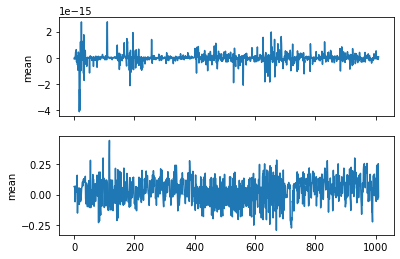

In [7]:
numerical_cols=[col for col in df_train.columns if '_2d_rdkit' in col]
numerical_cols+=[col for col in df_train.columns if '_3d_rdkit' in col]
df_train=df_train[numerical_cols]
df_test=df_test[numerical_cols]

fig,axes=plt.subplots(2,1,sharex=True)
sns.lineplot(ax=axes[0],y=df_train.loc['mean',:],x=np.arange(len(df_train.columns)))
sns.lineplot(ax=axes[1],y=df_test.loc['mean',:],x=np.arange(len(df_test.columns)))

# Plots and Analysis

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel,DotProduct, WhiteKernel,RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor


In [402]:
df_list=[]
feat_type_list=['2d+3d+fp','2d','3d','fp_deepchem']
for feat_type in feat_type_list:
    file_name=f'MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
    df=getDataFromFile(file_name)
    df_list.append(df)
df=pd.concat(df_list)
df=df.sort_values(by='test_mse')[['feat_set','model_name','test_r2','test_mse','test_mae']].reset_index(drop=True).head(10)
df.to_csv('table_3_overall_top_performing_models.csv',index=False)
df

File Found
File Found
File Found
File Found


feat_set        model_name   test_r2  test_mse  test_mae
0        2d_rdkit  gaussian_process  0.992062  0.003483  0.042814
1        2d_rdkit             ridge  0.991583  0.003693  0.045374
2        2d_rdkit    bayesian_ridge  0.991516  0.003723  0.045245
3        2d_rdkit    neural_network  0.990924  0.003982  0.044741
4        2d_rdkit      kernel_ridge  0.989590  0.004568  0.050131
5        2d_rdkit               omp  0.987576  0.005452  0.056656
6        2d_rdkit              ARDR  0.987427  0.005517  0.053955
7  2d+3d+fp_rdkit              ARDR  0.987330  0.005559  0.047256
8  2d+3d+fp_rdkit             lasso  0.986833  0.005778  0.051896
9  2d+3d+fp_rdkit               omp  0.986087  0.006105  0.062759

In [400]:
# df['model_name'].unique()
out_df=pd.DataFrame(columns=df.columns)
for model_name in df['model_name'].unique():
    _df=df[df['model_name']==model_name]
    best_row=_df.iloc[_df['test_mse'].argmin()]
#     print(best_row.shape)
    out_df=out_df.append(best_row)
out_df['feat_set']=out_df['feat_set'].apply(lambda x:x.replace('_rdkit',''))
cols=['model_name','feat_set','test_r2','test_mse','test_mae']
out_df=out_df[cols]
out_df.to_csv(f'{OUTDIR}/table_1_bests_feat_set_all_models.csv',index=False)
out_df

model_name  feat_set   test_r2  test_mse  test_mae
0              linear_reg  2d+3d+fp  0.983633  0.007182  0.054609
1                   ridge        2d  0.991583  0.003693  0.045374
2                   lasso  2d+3d+fp  0.986833  0.005778  0.051896
3             elastic_net        3d  0.936771  0.027745  0.134784
4              lasso_lars  2d+3d+fp  0.940933  0.025918  0.130172
5                     omp        2d  0.987576  0.005452  0.056656
6          bayesian_ridge        2d  0.991516  0.003723  0.045245
7                    ARDR        2d  0.987427  0.005517  0.053955
8                      PA  2d+3d+fp  0.954737  0.019861  0.097249
9                   huber        2d  0.980584  0.008520  0.059642
10           kernel_ridge        2d  0.989590  0.004568  0.050131
11                    SVR        2d  0.981463  0.008134  0.073553
12       gaussian_process        2d  0.992062  0.003483  0.042814
13          decision_tree        2d  0.958560  0.018184  0.075893
14                bagging  2d+3d+fp  0.982728  0.007579  0.065500
15          random_forest  2d+3d+fp  0.983305  0.007326  0.062949
16              ada_boost  2d+3d+fp  0.978053  0.009630  0.072991
17  gradient_boosting_reg  2d+3d+fp  0.984887  0.006632  0.054560
18         neural_network        2d  0.990924  0.003982  0.044741
19                knn_reg  2d+3d+fp  0.959407  0.017812  0.091611

In [468]:
feat_type='2d+3d+fp'
file_name=f'MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df.sort_values(by='test_mse')[['feat_set','model_name','test_r2','test_mse','test_mae']].reset_index(drop=True).head(10)

File Found


feat_set             model_name   test_r2  test_mse  test_mae
0  2d+3d+fp_rdkit                   ARDR  0.987330  0.005559  0.047256
1  2d+3d+fp_rdkit                  lasso  0.986833  0.005778  0.051896
2  2d+3d+fp_rdkit                    omp  0.986087  0.006105  0.062759
3  2d+3d+fp_rdkit       gaussian_process  0.985516  0.006355  0.047820
4  2d+3d+fp_rdkit         bayesian_ridge  0.985324  0.006440  0.048332
5  2d+3d+fp_rdkit                  ridge  0.984936  0.006610  0.049389
6  2d+3d+fp_rdkit  gradient_boosting_reg  0.984887  0.006632  0.054560
7  2d+3d+fp_rdkit             linear_reg  0.983633  0.007182  0.054609
8  2d+3d+fp_rdkit           kernel_ridge  0.983428  0.007272  0.055928
9  2d+3d+fp_rdkit          random_forest  0.983305  0.007326  0.062949

In [469]:
feat_type='2d'
file_name=f'MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df.sort_values(by='test_mse')[['feat_set','model_name','test_r2','test_mse','test_mae']].reset_index(drop=True).head(10)

File Found


feat_set             model_name   test_r2  test_mse  test_mae
0  2d_rdkit       gaussian_process  0.992062  0.003483  0.042814
1  2d_rdkit                  ridge  0.991583  0.003693  0.045374
2  2d_rdkit         bayesian_ridge  0.991516  0.003723  0.045245
3  2d_rdkit         neural_network  0.990924  0.003982  0.044741
4  2d_rdkit           kernel_ridge  0.989590  0.004568  0.050131
5  2d_rdkit                    omp  0.987576  0.005452  0.056656
6  2d_rdkit                   ARDR  0.987427  0.005517  0.053955
7  2d_rdkit                  lasso  0.985661  0.006292  0.059935
8  2d_rdkit  gradient_boosting_reg  0.983380  0.007293  0.058662
9  2d_rdkit                    SVR  0.981463  0.008134  0.073553

In [470]:
feat_type='3d'
file_name=f'MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df.sort_values(by='test_mse')[['feat_set','model_name','test_r2','test_mse','test_mae']].reset_index(drop=True).head(10)

File Found


feat_set             model_name   test_r2  test_mse  test_mae
0  3d_rdkit  gradient_boosting_reg  0.978814  0.009297  0.057325
1  3d_rdkit       gaussian_process  0.977671  0.009798  0.055750
2  3d_rdkit           kernel_ridge  0.976933  0.010122  0.057290
3  3d_rdkit                  lasso  0.976475  0.010323  0.063236
4  3d_rdkit         bayesian_ridge  0.975784  0.010626  0.058687
5  3d_rdkit          random_forest  0.975593  0.010710  0.068412
6  3d_rdkit                  ridge  0.974693  0.011105  0.058460
7  3d_rdkit                bagging  0.973650  0.011563  0.072264
8  3d_rdkit              ada_boost  0.972721  0.011970  0.072617
9  3d_rdkit                    SVR  0.970775  0.012824  0.075424

In [471]:
feat_type='fp_deepchem'
file_name=f'MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df.sort_values(by='test_mse')[['feat_set','model_name','test_r2','test_mse','test_mae']].reset_index(drop=True).head(10)

File Found


feat_set             model_name   test_r2  test_mse  test_mae
0  fp_deepchem_rdkit          random_forest  0.958300  0.018298  0.101173
1  fp_deepchem_rdkit         neural_network  0.957162  0.018797  0.102729
2  fp_deepchem_rdkit                bagging  0.956892  0.018916  0.099896
3  fp_deepchem_rdkit           kernel_ridge  0.949353  0.022224  0.119012
4  fp_deepchem_rdkit  gradient_boosting_reg  0.945047  0.024113  0.118703
5  fp_deepchem_rdkit       gaussian_process  0.942710  0.025139  0.129847
6  fp_deepchem_rdkit         bayesian_ridge  0.936306  0.027949  0.136005
7  fp_deepchem_rdkit                    SVR  0.932167  0.029765  0.141084
8  fp_deepchem_rdkit                  lasso  0.931707  0.029967  0.132333
9  fp_deepchem_rdkit                  ridge  0.927284  0.031908  0.142360

In [290]:
small=8
titlecolor='brown'

bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.rc('xtick', labelsize=small)
plt.rc('ytick', labelsize=small)
plt.rc('axes', titlesize=small, labelsize=small,titlepad=5,labelpad=10,titlecolor=titlecolor)
plt.rc('legend', fontsize=small)
plt.rc('figure', figsize=(3.25,3.25) ,dpi=300,titlesize=small)

File Found
File Found
File Found
File Found


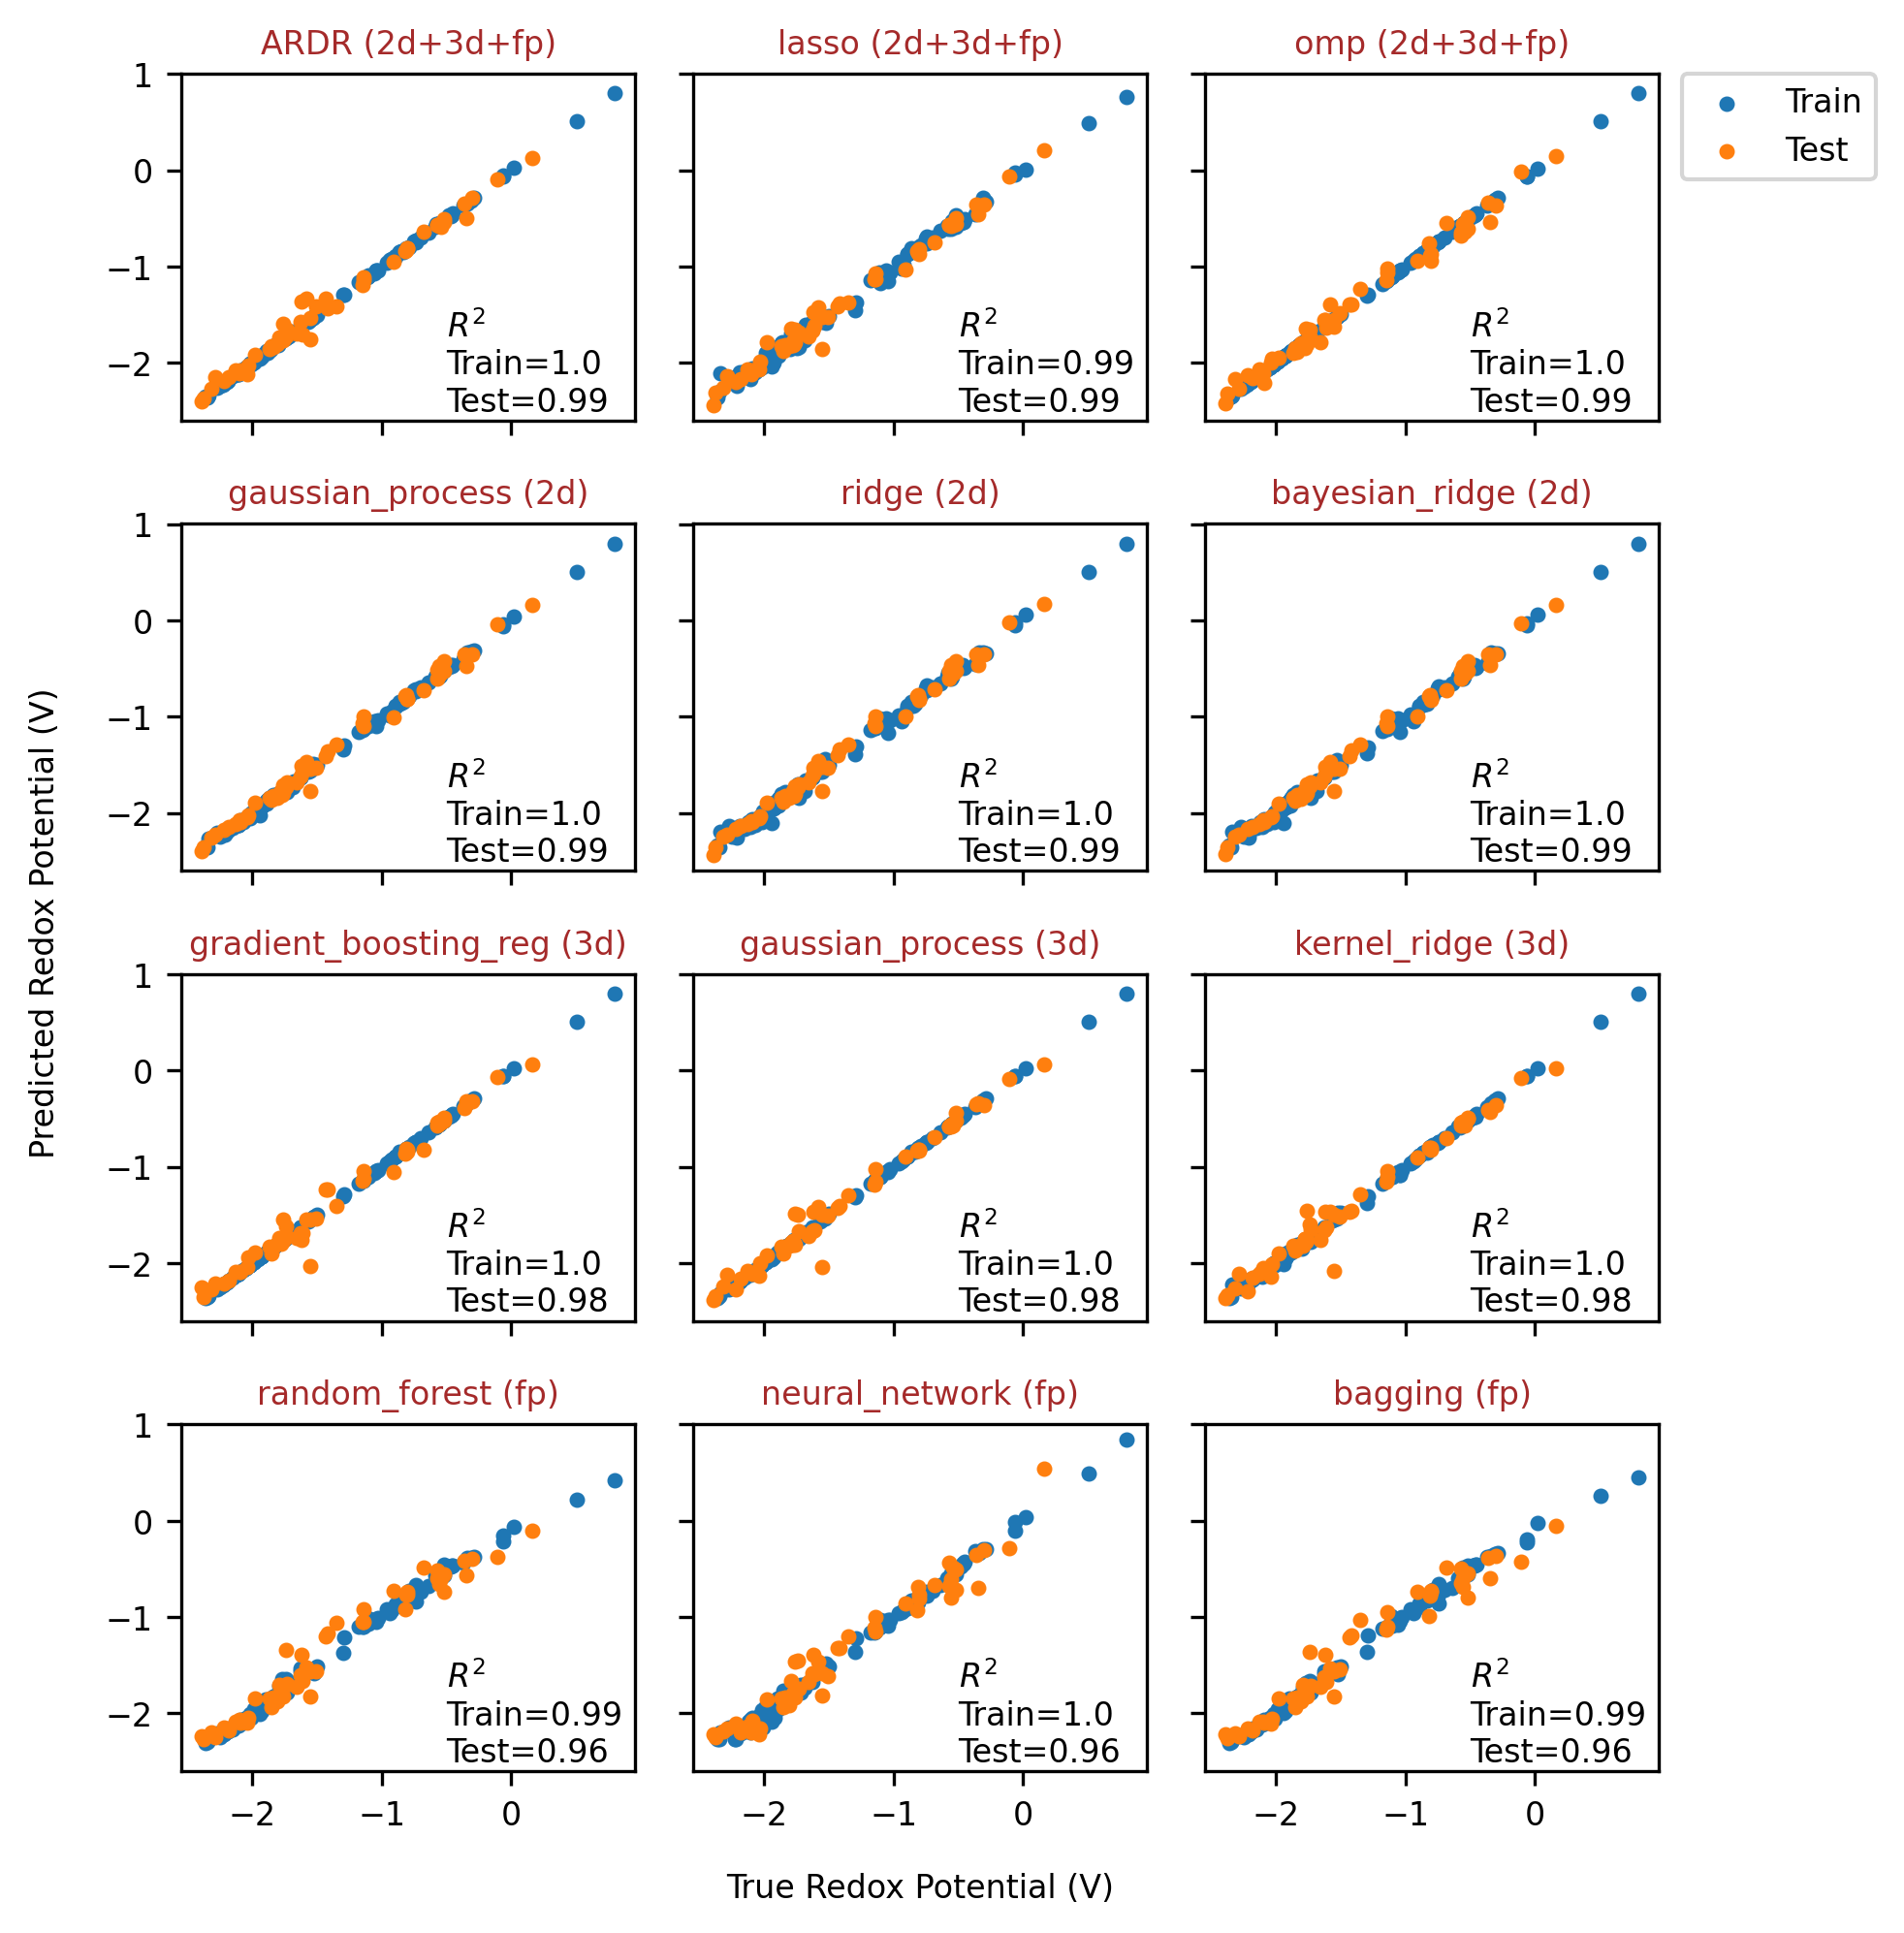

In [223]:
fig,axes=plt.subplots(4,3,figsize=(7,7),sharex=True,sharey=True)
feat_type_list=['2d+3d+fp','2d','3d','fp_deepchem']
for i,feat_type in enumerate(feat_type_list):
    file_name=f'MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
    df=getDataFromFile(file_name)
    for j in range(3):
        rank=j
        ax=axes[i][j]
        df=df.sort_values(by='test_mse')
        best_model_row=df.sort_values(by='test_mse').iloc[rank,:]
        best_model_name=best_model_row['model_name']
        ax.scatter(x=y_train,y=best_model_row['pred_train'],label='Train',s=small)
        ax.scatter(x=y_test,y=best_model_row['pred_test'],label='Test',s=small)
        if feat_type=='fp_deepchem':
            ax.set_title(best_model_name+f' (fp)')
        else:
            ax.set_title(best_model_name+f' ({feat_type})')
        train_r2=round(best_model_row['train_r2'],2)
        test_r2=round(best_model_row['test_r2'],2)
        ax.text(-0.5,-2.5,f'$R^2$\nTrain={train_r2}\nTest={test_r2}',fontsize=small)
    if i==0:
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')
# ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("True Redox Potential (V)",)
plt.ylabel("Predicted Redox Potential (V)")
# plt.text(0.84,-0.07,'$\it{*dc=fp_deepchem_rdkit}$',fontsize=5)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/1.top_3_models_train_test_predictions.jpg')

# Optimized Models Vs. Error (Stacked Histogram wrt Feature Type)

UPDATE: Threshold for mse is mse(true_test,mean_train)

In [74]:
#threshold
from sklearn.metrics import mean_squared_error

y_train=data_train['Redox Potential'].values
y_test=data_test['Redox Potential'].values
mean_pred=np.full(y_train.shape,np.mean(y_train))
train_th=mean_squared_error(y_train,mean_pred)
mean_pred=np.full(y_test.shape,np.mean(y_train))
test_th=mean_squared_error(y_test,mean_pred)
train_th,test_th

(0.4685821885703984, 0.4409890046743413)

In [125]:
hue_order=['2d+3d+fp','2d','3d','fp']

In [224]:
df_list=[]
feat_type_list=['2d+3d+fp','2d','3d','fp_deepchem']
for feat_type in feat_type_list:
    file_name=f'MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
    df=getDataFromFile(file_name)
    df_list.append(df)
df=pd.concat(df_list)
df['feat_set']=df['feat_set'].apply(lambda x:x.split('_')[0])
df

File Found
File Found
File Found
File Found


feat_set             model_name  \
0   2d+3d+fp             linear_reg   
1   2d+3d+fp                  ridge   
2   2d+3d+fp                  lasso   
3   2d+3d+fp            elastic_net   
4   2d+3d+fp             lasso_lars   
..       ...                    ...   
15        fp          random_forest   
16        fp              ada_boost   
17        fp  gradient_boosting_reg   
18        fp         neural_network   
19        fp                knn_reg   

                                               gs_obj  \
0   GridSearchCV(cv=10, estimator=LinearRegression...   
1   GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...   
2   GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...   
3   GridSearchCV(cv=10, estimator=ElasticNet(), n_...   
4   GridSearchCV(cv=10, estimator=LassoLars(), n_j...   
..                                                ...   
15  GridSearchCV(cv=10, estimator=RandomForestRegr...   
16  GridSearchCV(cv=10, estimator=AdaBoostRegresso...   
17  GridSearchCV(cv=10, estimator=GradientBoosting...   
18  GridSearchCV(cv=10,\n             estimator=ML...   
19  GridSearchCV(cv=10, estimator=KNeighborsRegres...   

                                            opt_model  \
0                                  LinearRegression()   
1       Ridge(alpha=1.5, max_iter=500, solver='saga')   
2                     Lasso(alpha=0.01, max_iter=200)   
3   ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=500)   
4                 LassoLars(alpha=0.01, max_iter=100)   
..                                                ...   
15  (DecisionTreeRegressor(max_features='auto', ra...   
16  (DecisionTreeRegressor(max_depth=3, random_sta...   
17  ([DecisionTreeRegressor(criterion='friedman_ms...   
18  MLPRegressor(activation='logistic', hidden_lay...   
19  KNeighborsRegressor(algorithm='ball_tree', lea...   

                                           opt_params  \
0   {'fit_intercept': True, 'normalize': False, 'p...   
1   {'alpha': 1.5, 'max_iter': 500, 'solver': 'sag...   
2   {'alpha': 0.01, 'max_iter': 200, 'positive': F...   
3   {'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...   
4   {'alpha': 0.01, 'jitter': None, 'max_iter': 10...   
..                                                ...   
15  {'bootstrap': True, 'n_estimators': 450, 'oob_...   
16  {'learning_rate': 1.5, 'loss': 'exponential', ...   
17  {'max_depth': 2, 'n_estimators': 200, 'tol': 0...   
18  {'activation': 'logistic', 'early_stopping': F...   
19  {'algorithm': 'ball_tree', 'leaf_size': 75, 'n...   

                                         cv_score_obj  cv_mean_test_r2  \
0   {'fit_time': [0.0657804012298584, 0.0840871334...         0.981218   
1   {'fit_time': [3.8878326416015625, 3.8630144596...         0.985804   
2   {'fit_time': [0.2049264907836914, 0.1882381439...         0.982563   
3   {'fit_time': [0.29672789573669434, 0.366970062...         0.921214   
4   {'fit_time': [0.04145097732543945, 0.057959079...         0.940946   
..                                                ...              ...   
15  {'fit_time': [7.771079778671265, 7.44852495193...         0.925796   
16  {'fit_time': [1.5222210884094238, 1.6711575984...         0.931094   
17  {'fit_time': [1.0271389484405518, 0.7410731315...         0.944465   
18  {'fit_time': [17.389322757720947, 16.052030801...         0.962197   
19  {'fit_time': [0.027489900588989258, 0.02436447...         0.895333   

    cv_mean_test_mse  cv_mean_test_mae  train_r2     train_mse     train_mae  \
0           0.006885          0.057603  1.000000  2.323014e-30  1.087551e-15   
1           0.005289          0.049901  0.998860  5.340961e-04  1.438468e-02   
2           0.006429          0.059300  0.993749  2.929064e-03  4.288517e-02   
3           0.032845          0.144060  0.951663  2.265008e-02  1.261070e-01   
4           0.022788          0.125774  0.952021  2.248207e-02  1.251941e-01   
..               ...               ...       ...           ...           ...   
15          0.042762          0

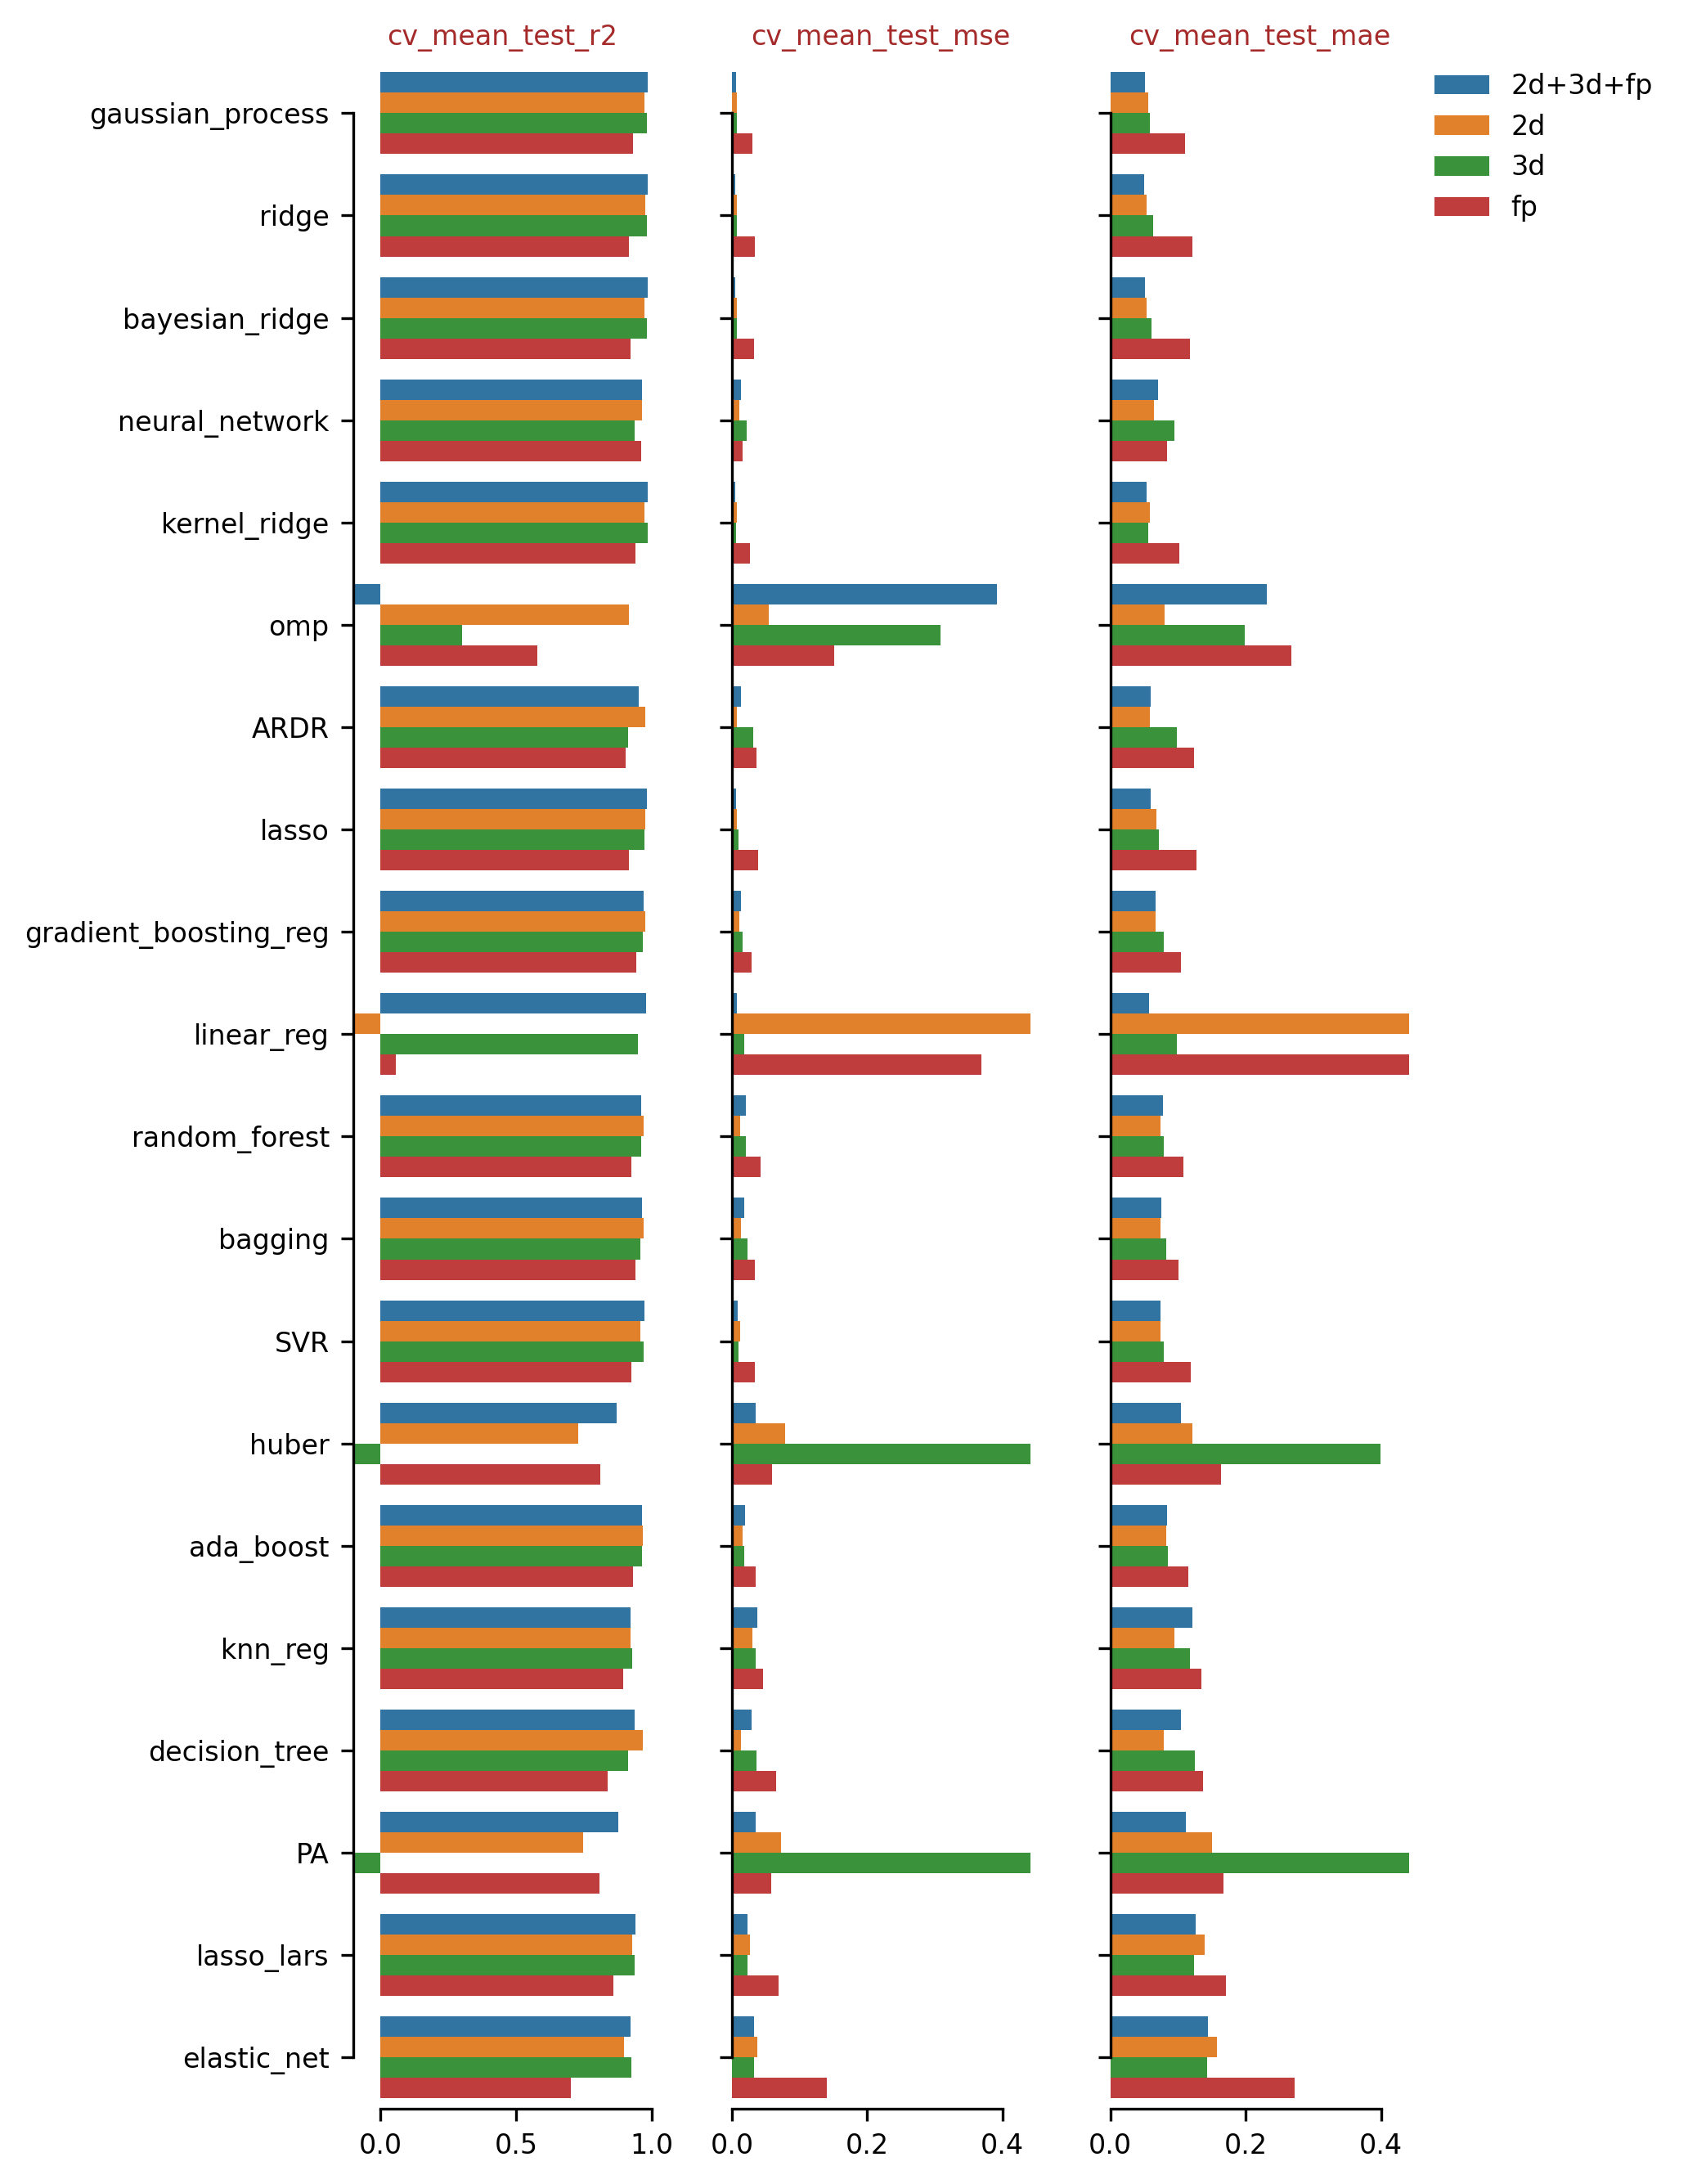

In [225]:
df=df.sort_values(by='test_mse')
fig,axes=plt.subplots(1,3,sharey=True,figsize=(7,9))

error_list=['cv_mean_test_r2','cv_mean_test_mse','cv_mean_test_mae']
        
for i in range(3):
    error=error_list[i]
    ax=axes[i]
    sns.barplot(ax=ax,x=error, y='model_name',  data=df, hue='feat_set',hue_order=hue_order)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(error)
    if 'r2' in error:
        ax.set_xlim(-0.1,1)
    else:
        ax.set_xlim(0,test_th)
#     handles, labels = _plot.get_legend_handles_labels()
    ax.get_legend().remove()
#     ax.spines['right'].set_visible('False')
#     ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# fig.legend(handles, labels, loc='upper center',bbox_to_anchor = (0,-0.08,1,1))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/opt_models_cv_performance.jpg')

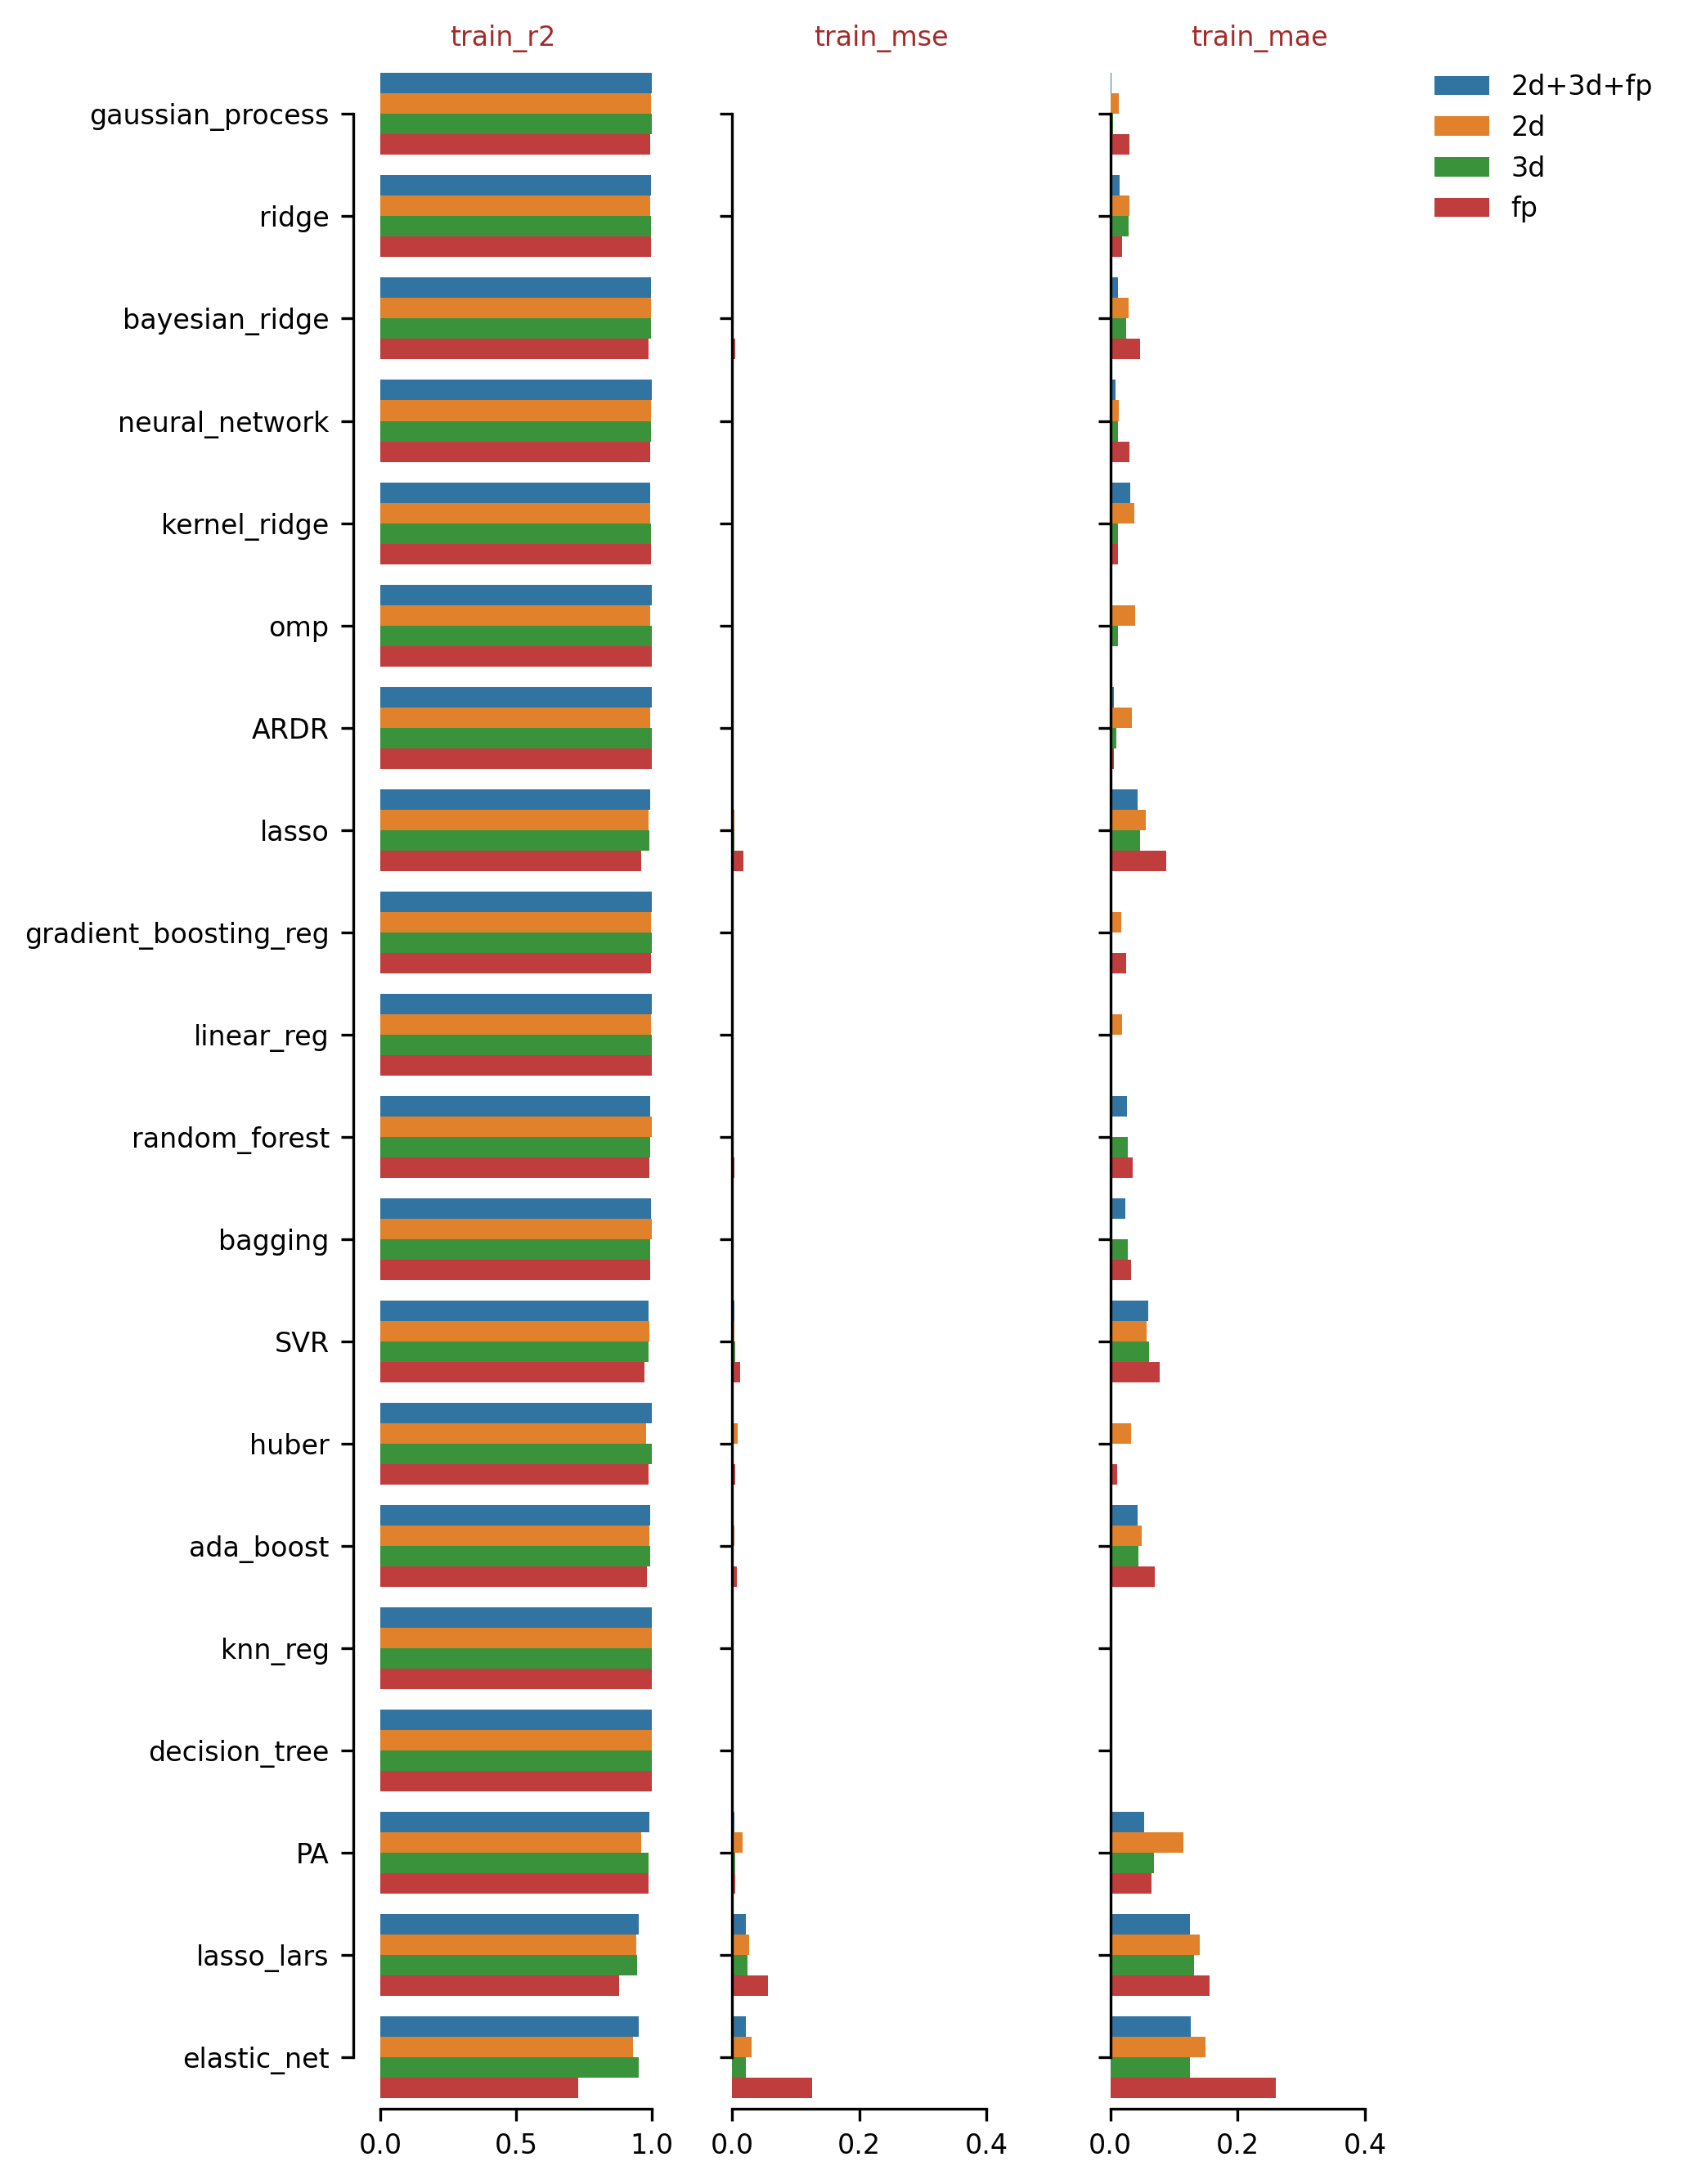

In [226]:
df=df.sort_values(by='test_mse')
fig,axes=plt.subplots(1,3,sharey=True,figsize=(7,9))


error_list=['train_r2','train_mse','train_mae']
        
for i in range(3):
    error=error_list[i]
    ax=axes[i]
    sns.barplot(ax=ax,x=error, y='model_name',  data=df, hue='feat_set',hue_order=hue_order)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(error)
    if 'r2' in error:
        ax.set_xlim(-0.1,1)
    else:
        ax.set_xlim(0,train_th)
#     handles, labels = _plot.get_legend_handles_labels()
    ax.get_legend().remove()
# fig.legend(handles, labels, loc='upper center',bbox_to_anchor = (0,-0.08,1,1))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/opt_models_train_performance.jpg')

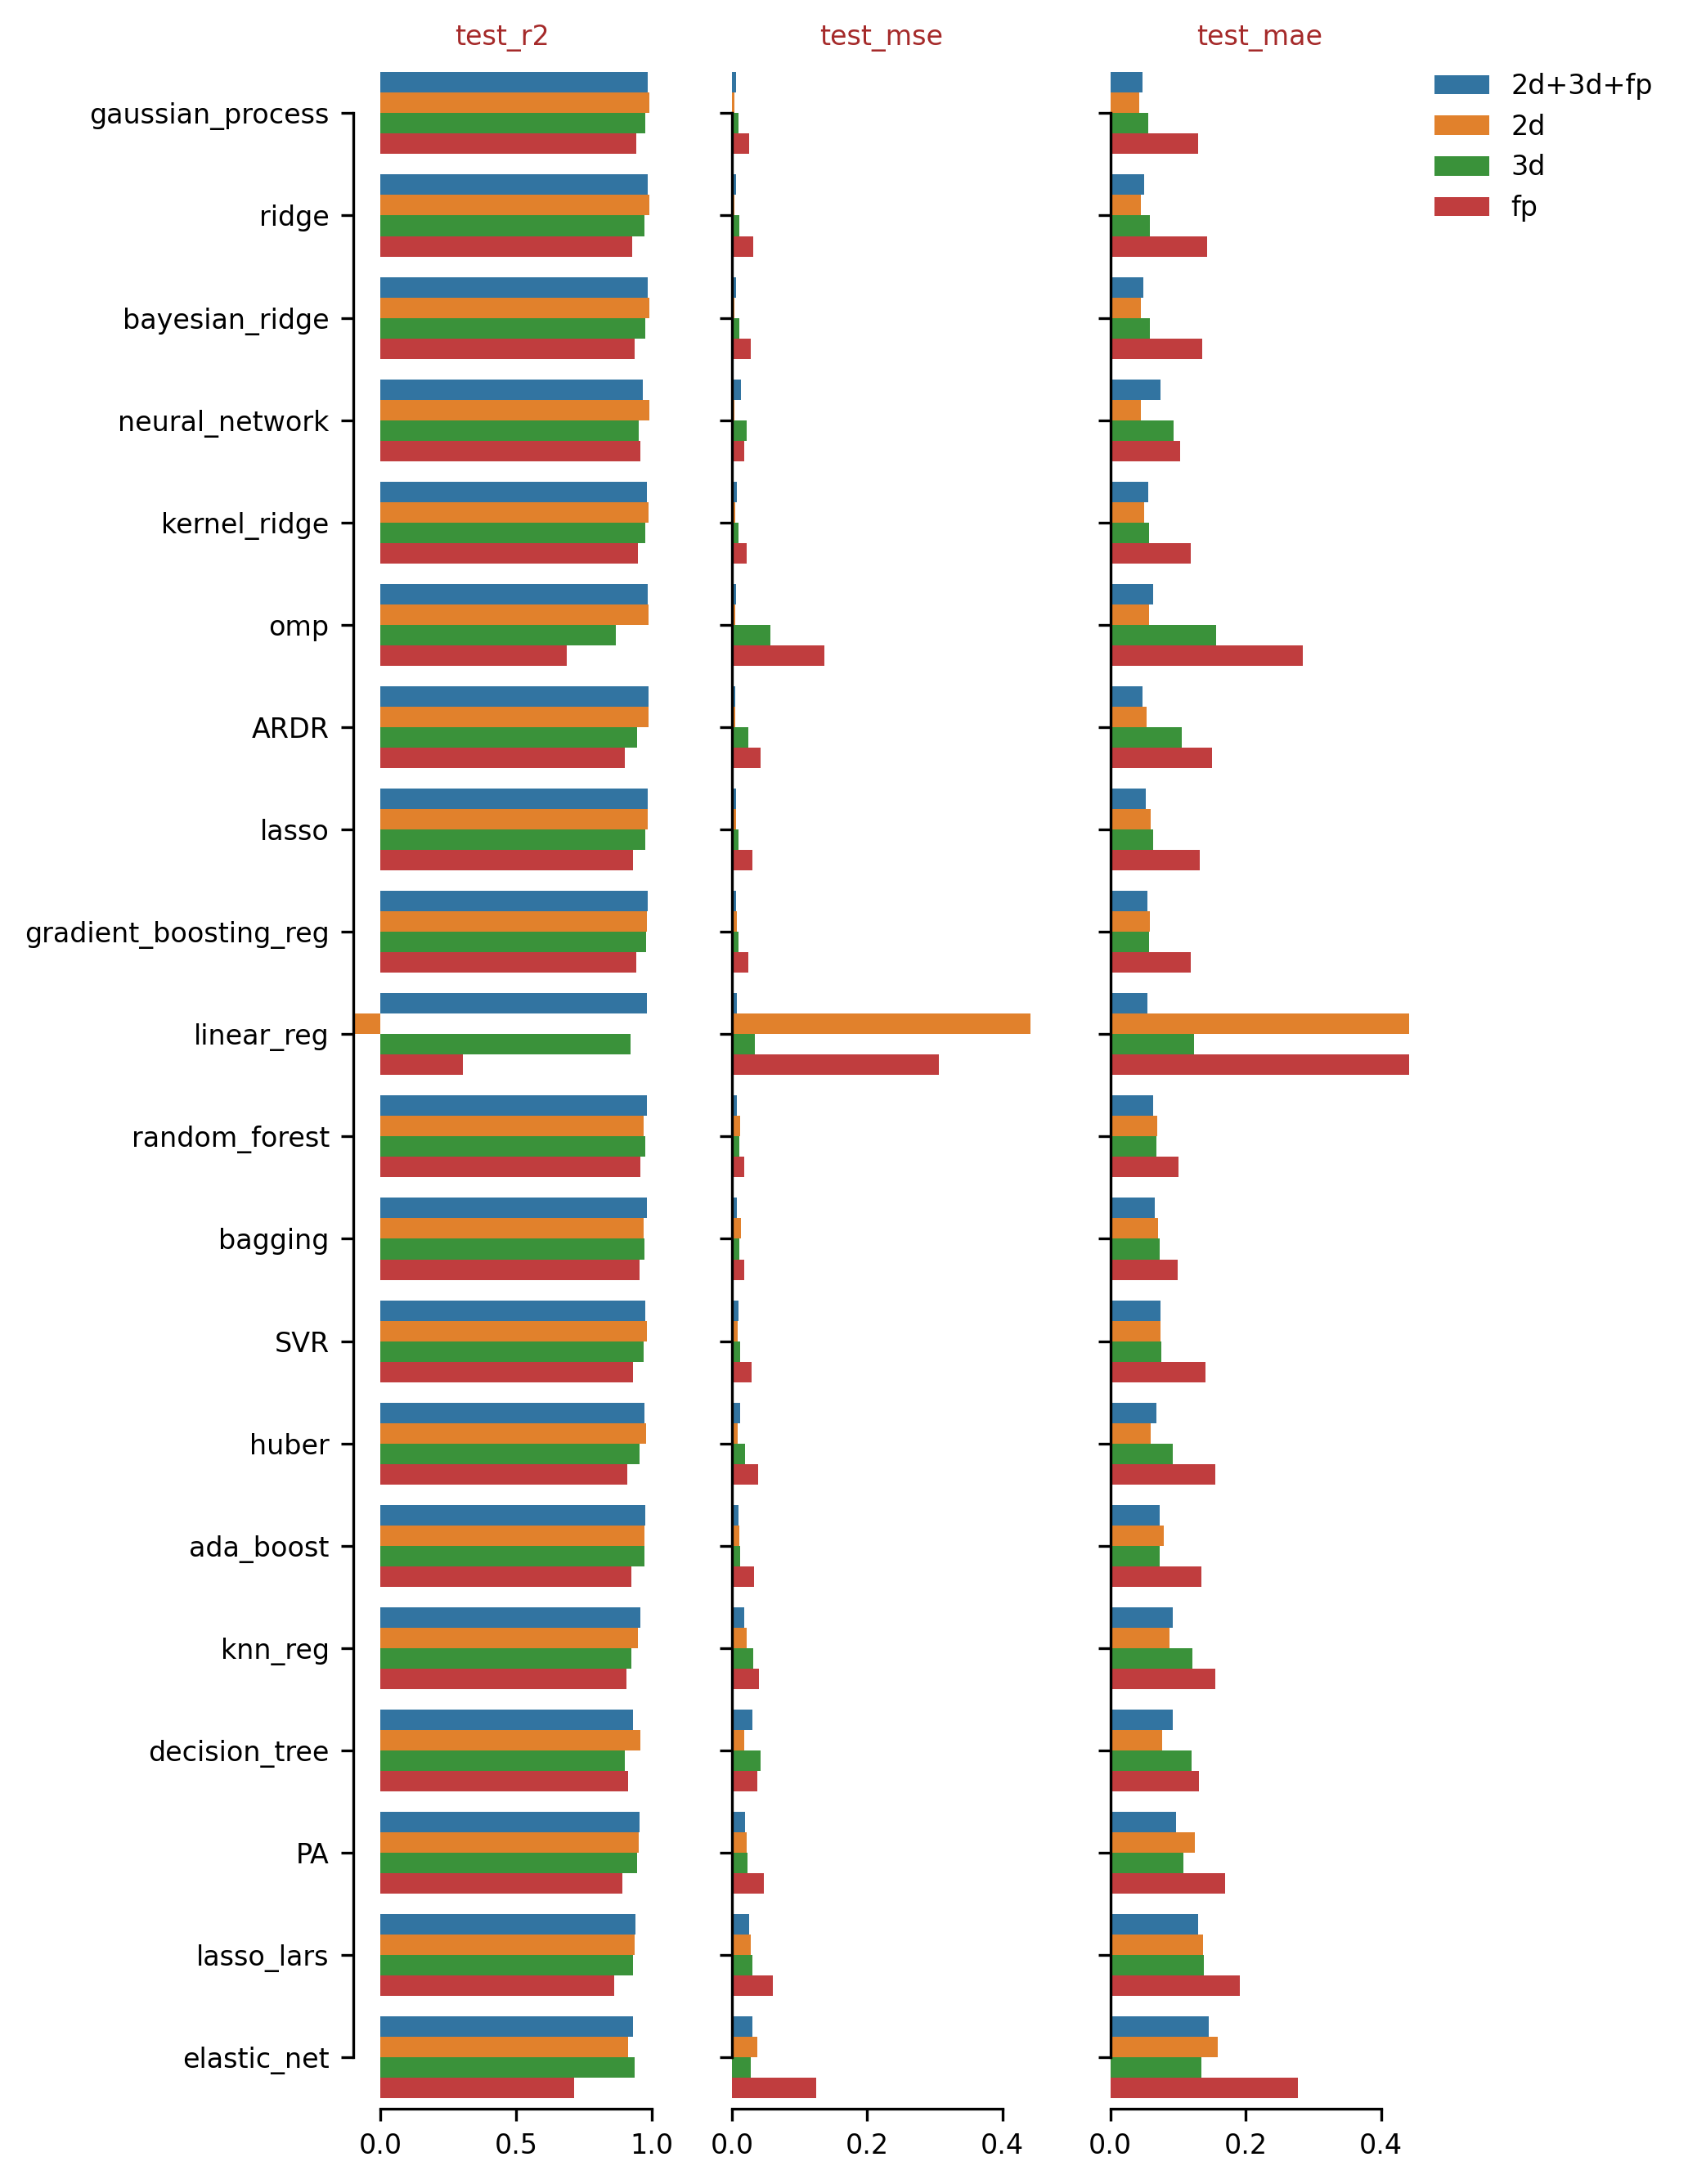

In [227]:
df=df.sort_values(by='test_mse')
fig,axes=plt.subplots(1,3,sharey=True,figsize=(7,9))


error_list=['test_r2','test_mse','test_mae']
        
for i in range(3):
    error=error_list[i]
    ax=axes[i]
    sns.barplot(ax=ax,x=error, y='model_name',  data=df, hue='feat_set',hue_order=hue_order)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(error)
    if 'r2' in error:
        ax.set_xlim(-0.1,1)
    else:
        ax.set_xlim(0,test_th)
#     handles, labels = _plot.get_legend_handles_labels()
    ax.get_legend().remove()
# fig.legend(handles, labels, loc='upper center',bbox_to_anchor = (0,-0.08,1,1))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/opt_models_test_performance.jpg')

# Feature Importance Plots

In [228]:
# FETURE_IMPORTANCE_DF_2d+3d+fp_{LIBRARY}.pkl
feat_type='2d+3d+fp'
file_name=f'FETURE_IMPORTANCE_DF_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df['feat_name']=df['feat_name'].apply(lambda x:x.replace('_rdkit',''))
df

File Found


feat_name  random_forest_score  ada_boost_score  \
0             FG_no_2d_basic         2.635662e-06              0.0   
1     FG_position_1_2d_basic         0.000000e+00              0.0   
2     FG_position_2_2d_basic         2.151924e-07              0.0   
3     FG_position_3_2d_basic         1.371738e-07              0.0   
4     FG_position_4_2d_basic         1.023158e-04              0.0   
...                      ...                  ...              ...   
3505           rdkit_fp_2042         0.000000e+00              0.0   
3506           rdkit_fp_2043         0.000000e+00              0.0   
3507           rdkit_fp_2044         4.083084e-08              0.0   
3508           rdkit_fp_2046         5.700497e-06              0.0   
3509           rdkit_fp_2047         0.000000e+00              0.0   

      gradient_boosting_reg_score  kbest_selector_score  
0                        0.000000              0.966356  
1                        0.000000              0.000000  
2                        0.000003              0.024999  
3                        0.000001              0.160536  
4                        0.000000              0.077464  
...                           ...                   ...  
3505                     0.000000              0.175550  
3506                     0.000000              0.000000  
3507                     0.000000              0.254778  
3508                     0.000000              0.370223  
3509                     0.000000              0.005107  

[3510 rows x 5 columns]

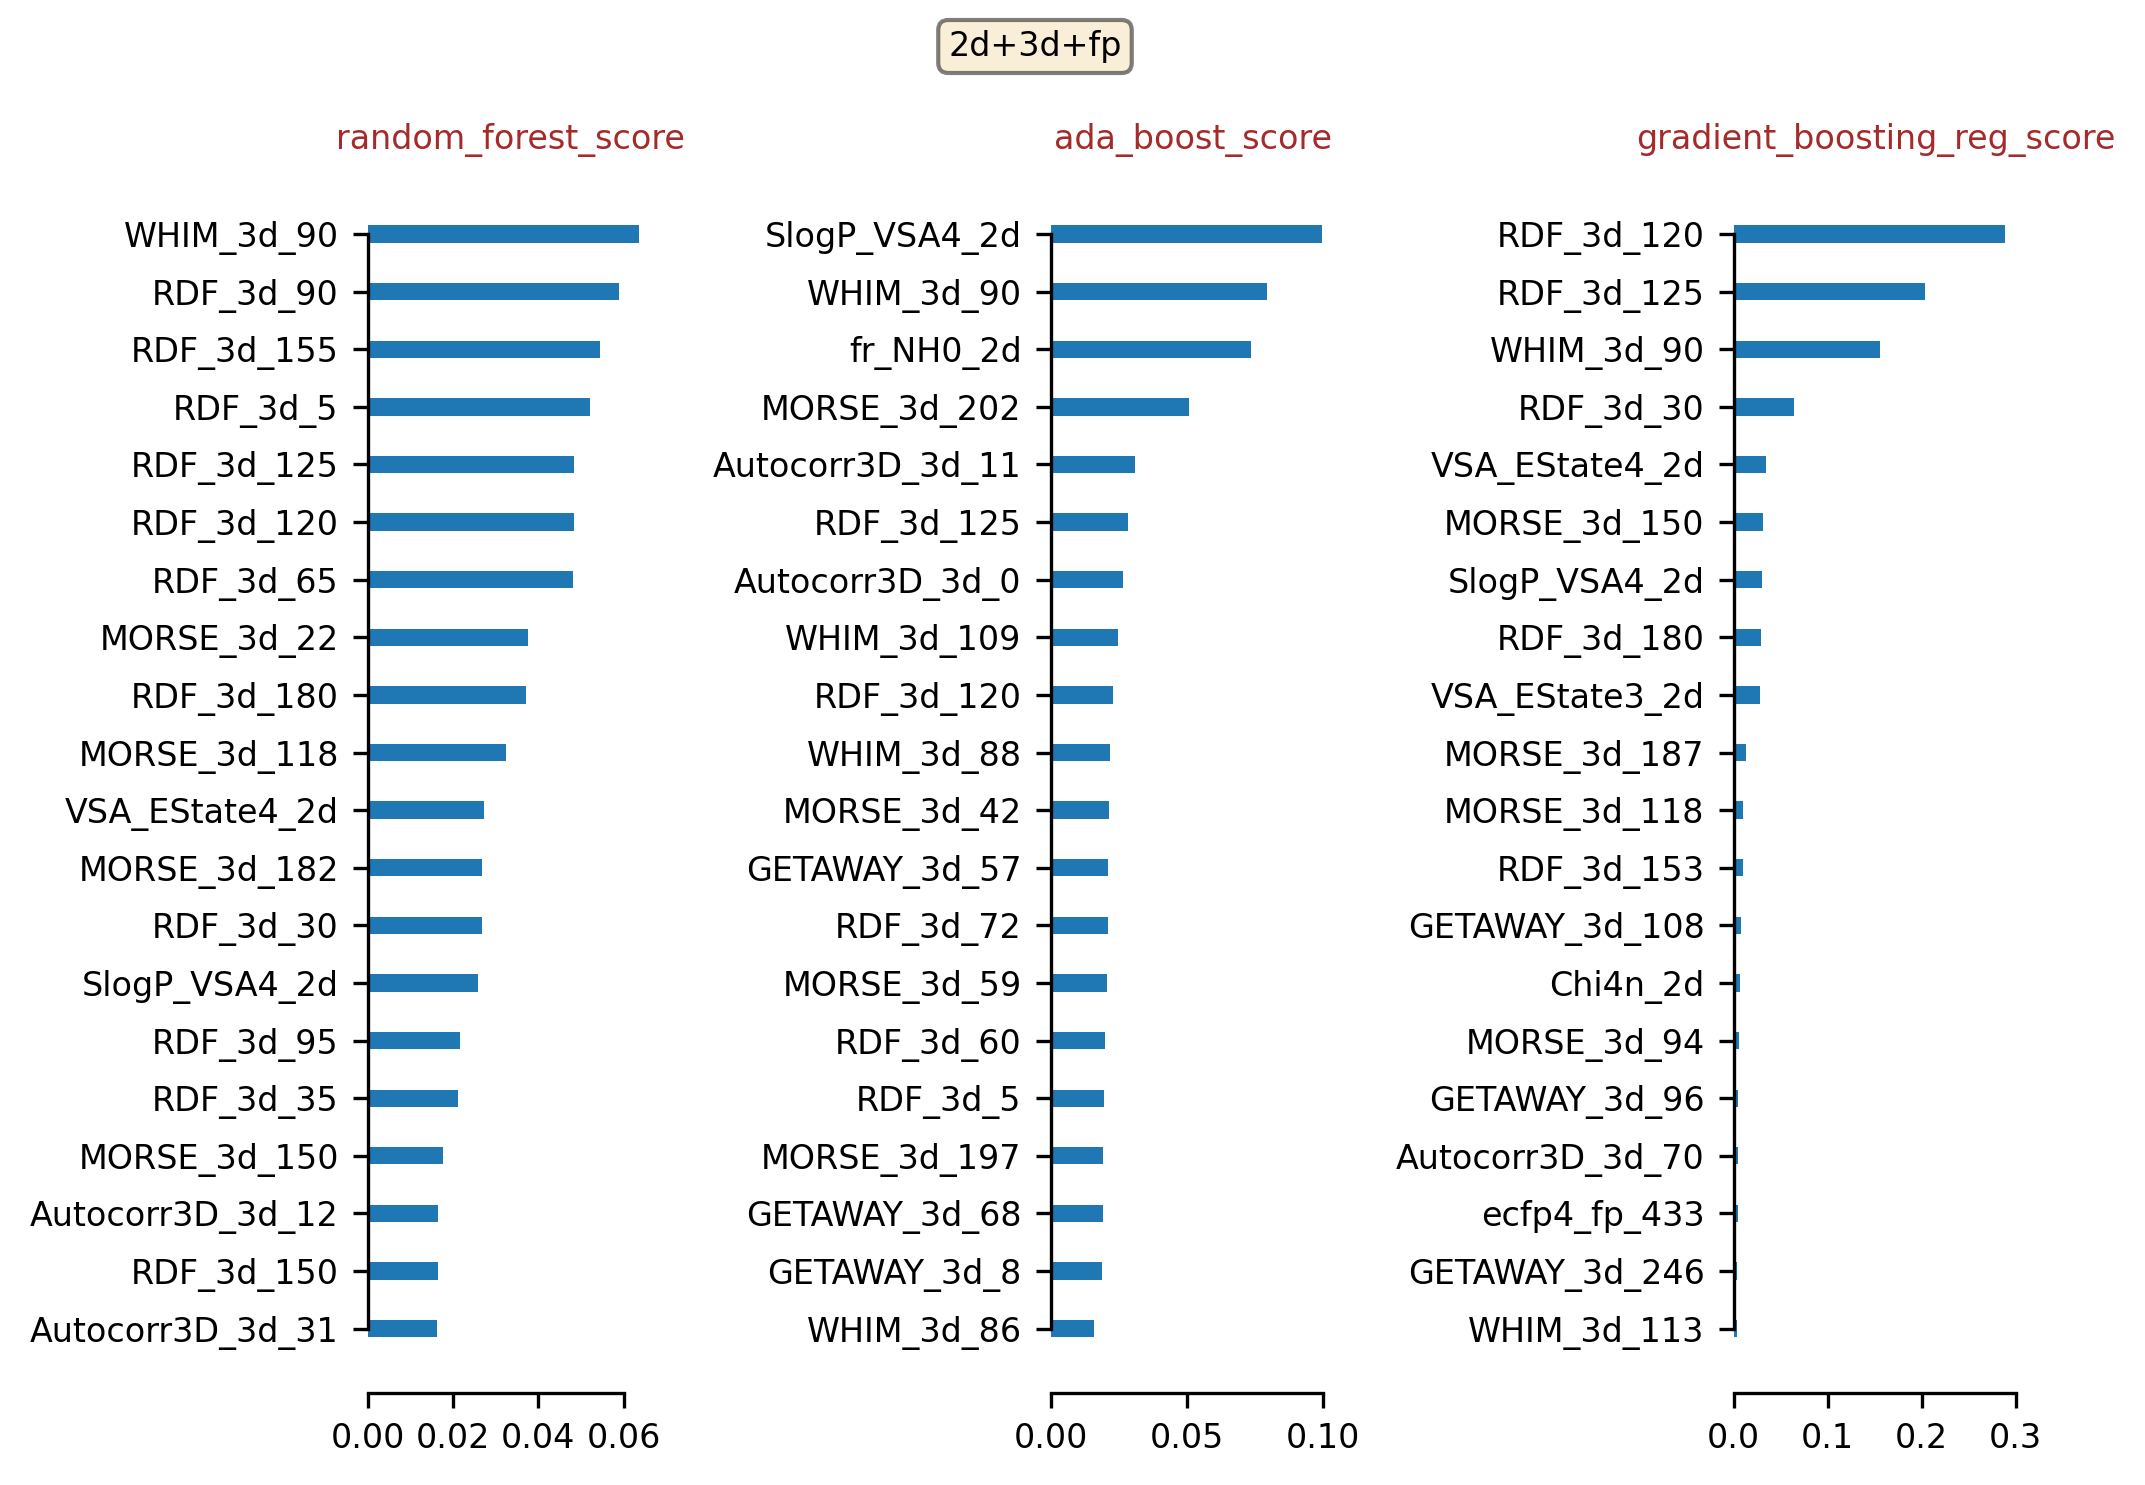

In [229]:
ntop=20
fig,axes=plt.subplots(1,3,figsize=(7,5))
method_list=['random_forest_score','ada_boost_score','gradient_boosting_reg_score']
for i,method in enumerate(method_list):
    _df=df.sort_values(by=method)[-ntop:]
    axes[i].barh(_df['feat_name'],_df[method],height=0.3)
    axes[i].set_title(method)
fig.suptitle(feat_type,y=0.98,bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/feature_importance_{feat_type}.jpg')

In [232]:
# FETURE_IMPORTANCE_DF_2d+3d+fp_{LIBRARY}.pkl
feat_type='2d'
file_name=f'FETURE_IMPORTANCE_DF_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df['feat_name']=df['feat_name'].apply(lambda x:x.replace('_rdkit',''))
df

File Found


feat_name  random_forest_score  ada_boost_score  \
0               FG_no_2d_basic         2.344640e-05              0.0   
1       FG_position_1_2d_basic         6.884808e-06              0.0   
2       FG_position_2_2d_basic         1.979692e-06              0.0   
3       FG_position_3_2d_basic         4.090822e-05              0.0   
4       FG_position_4_2d_basic         4.916833e-06              0.0   
..                         ...                  ...              ...   
146   fr_para_hydroxylation_2d         1.125679e-05              0.0   
147               fr_phenol_2d         3.007864e-06              0.0   
148  fr_phenol_noOrthoHbond_2d         3.461980e-06              0.0   
149             fr_priamide_2d         2.757232e-08              0.0   
150              fr_sulfide_2d         6.617356e-08              0.0   

     gradient_boosting_reg_score  kbest_selector_score  
0                       0.000000              0.969998  
1                       0.000166              0.000000  
2                       0.000000              0.042166  
3                       0.000607              0.146308  
4                       0.000178              0.092498  
..                           ...                   ...  
146                     0.000055              0.352926  
147                     0.000000              0.242369  
148                     0.000000              0.245539  
149                     0.000000              0.000963  
150                     0.000000              0.000000  

[151 rows x 5 columns]

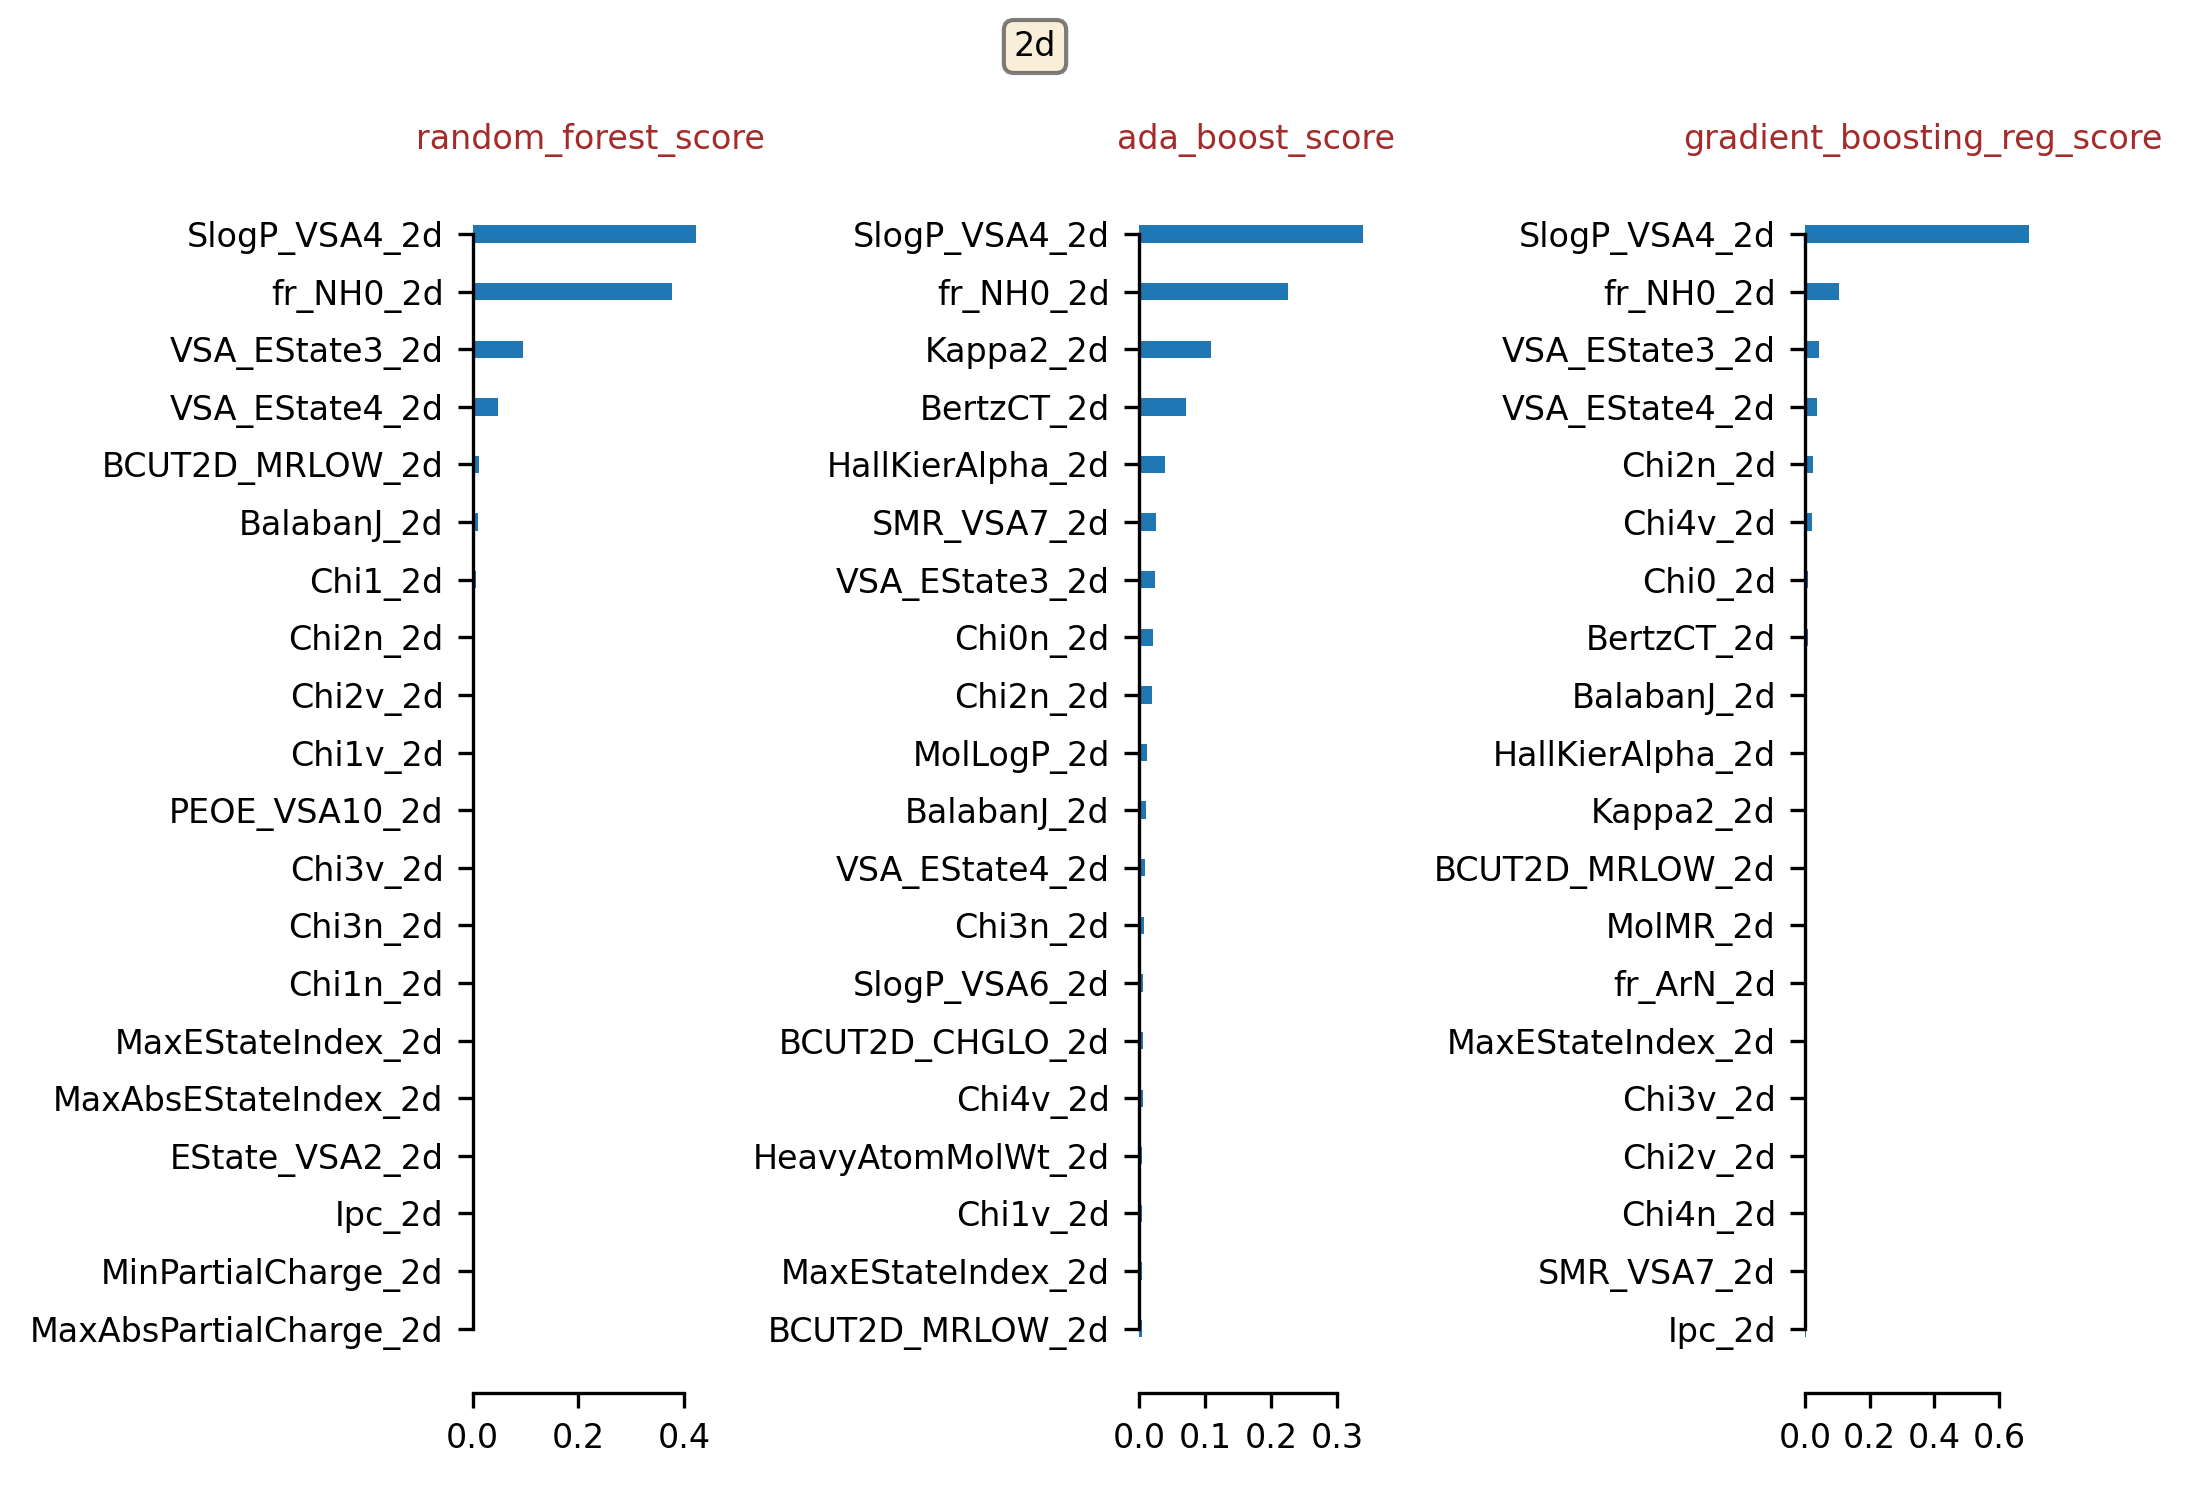

In [233]:
ntop=20
fig,axes=plt.subplots(1,3,figsize=(7,5))
method_list=['random_forest_score','ada_boost_score','gradient_boosting_reg_score']
for i,method in enumerate(method_list):
    _df=df.sort_values(by=method)[-ntop:]
    axes[i].barh(_df['feat_name'],_df[method],height=0.3)
    axes[i].set_title(method)
fig.suptitle(feat_type,y=0.98,bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/feature_importance_{feat_type}.jpg')

In [234]:
# FETURE_IMPORTANCE_DF_2d+3d+fp_{LIBRARY}.pkl
feat_type='3d'
file_name=f'FETURE_IMPORTANCE_DF_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df['feat_name']=df['feat_name'].apply(lambda x:x.replace('_rdkit',''))
df

File Found


feat_name  random_forest_score  ada_boost_score  \
0            Asphericity_3d         3.394686e-07         0.000000   
1           Eccentricity_3d         3.329041e-06         0.000000   
2    InertialShapeFactor_3d         1.352199e-05         0.001503   
3                   NPR1_3d         1.521998e-06         0.000000   
4                   NPR2_3d         3.010900e-06         0.000002   
..                      ...                  ...              ...   
864          GETAWAY_3d_268         2.815139e-04         0.000062   
865          GETAWAY_3d_269         4.371535e-04         0.000645   
866          GETAWAY_3d_270         5.512221e-04         0.005134   
867          GETAWAY_3d_271         3.938700e-05         0.002337   
868          GETAWAY_3d_272         1.256916e-05         0.000010   

     gradient_boosting_reg_score  kbest_selector_score  
0                   0.000000e+00              0.143435  
1                   2.631126e-07              0.152596  
2                   0.000000e+00              0.403198  
3                   0.000000e+00              0.144039  
4                   0.000000e+00              0.218978  
..                           ...                   ...  
864                 2.075790e-06              0.514084  
865                 3.761235e-08              0.540285  
866                 0.000000e+00              0.701819  
867                 2.329053e-04              0.638184  
868                 2.826488e-04              0.244466  

[869 rows x 5 columns]

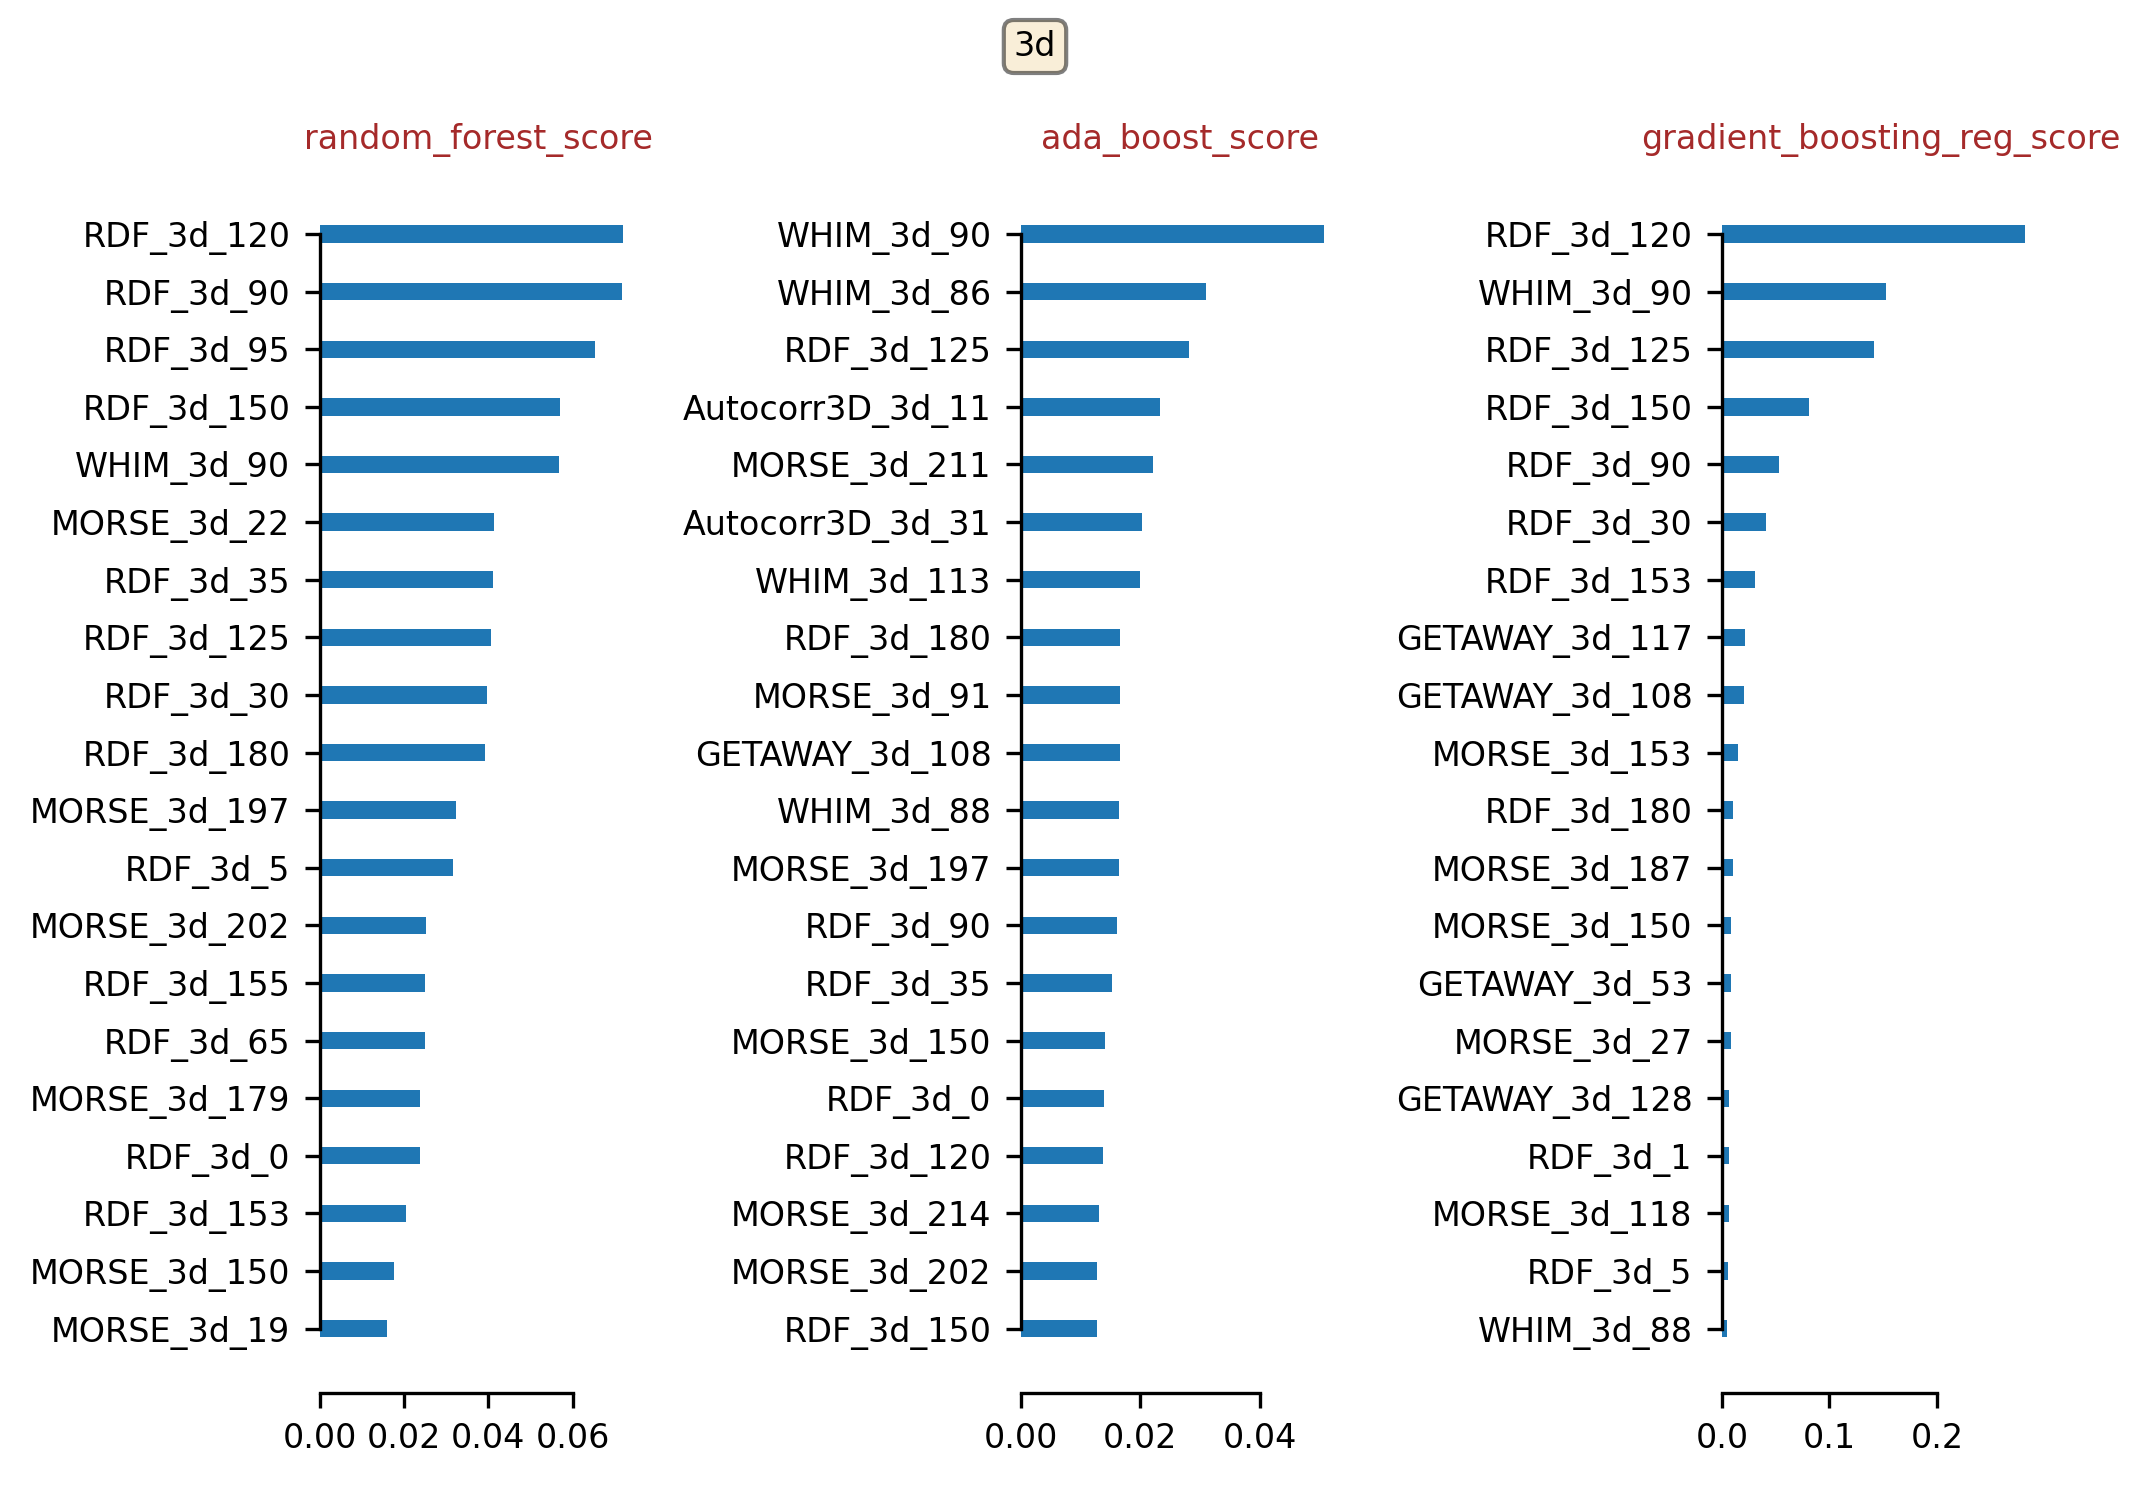

In [235]:
ntop=20
fig,axes=plt.subplots(1,3,figsize=(7,5))
method_list=['random_forest_score','ada_boost_score','gradient_boosting_reg_score']
for i,method in enumerate(method_list):
    _df=df.sort_values(by=method)[-ntop:]
    axes[i].barh(_df['feat_name'],_df[method],height=0.3)
    axes[i].set_title(method)
fig.suptitle(feat_type,y=0.98,bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/feature_importance_{feat_type}.jpg')

In [236]:
# FETURE_IMPORTANCE_DF_2d+3d+fp_{LIBRARY}.pkl
feat_type='fp_deepchem'
file_name=f'FETURE_IMPORTANCE_DF_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df

File Found


feat_name  random_forest_score  ada_boost_score  \
0        ecfp4_fp_1         0.000000e+00              0.0   
1        ecfp4_fp_2         0.000000e+00              0.0   
2        ecfp4_fp_3         2.312005e-05              0.0   
3        ecfp4_fp_5         2.225293e-06              0.0   
4        ecfp4_fp_6         1.539747e-05              0.0   
...             ...                  ...              ...   
2485  rdkit_fp_2042         3.038985e-06              0.0   
2486  rdkit_fp_2043         2.177103e-07              0.0   
2487  rdkit_fp_2044         5.355867e-07              0.0   
2488  rdkit_fp_2046         2.336592e-05              0.0   
2489  rdkit_fp_2047         2.414252e-09              0.0   

      gradient_boosting_reg_score  kbest_selector_score  
0                        0.000000              0.000000  
1                        0.000000              0.000000  
2                        0.000000              0.010216  
3                        0.000000              0.001490  
4                        0.000006              0.000061  
...                           ...                   ...  
2485                     0.000000              0.187178  
2486                     0.000000              0.000000  
2487                     0.000000              0.266782  
2488                     0.000000              0.383251  
2489                     0.000000              0.000000  

[2490 rows x 5 columns]

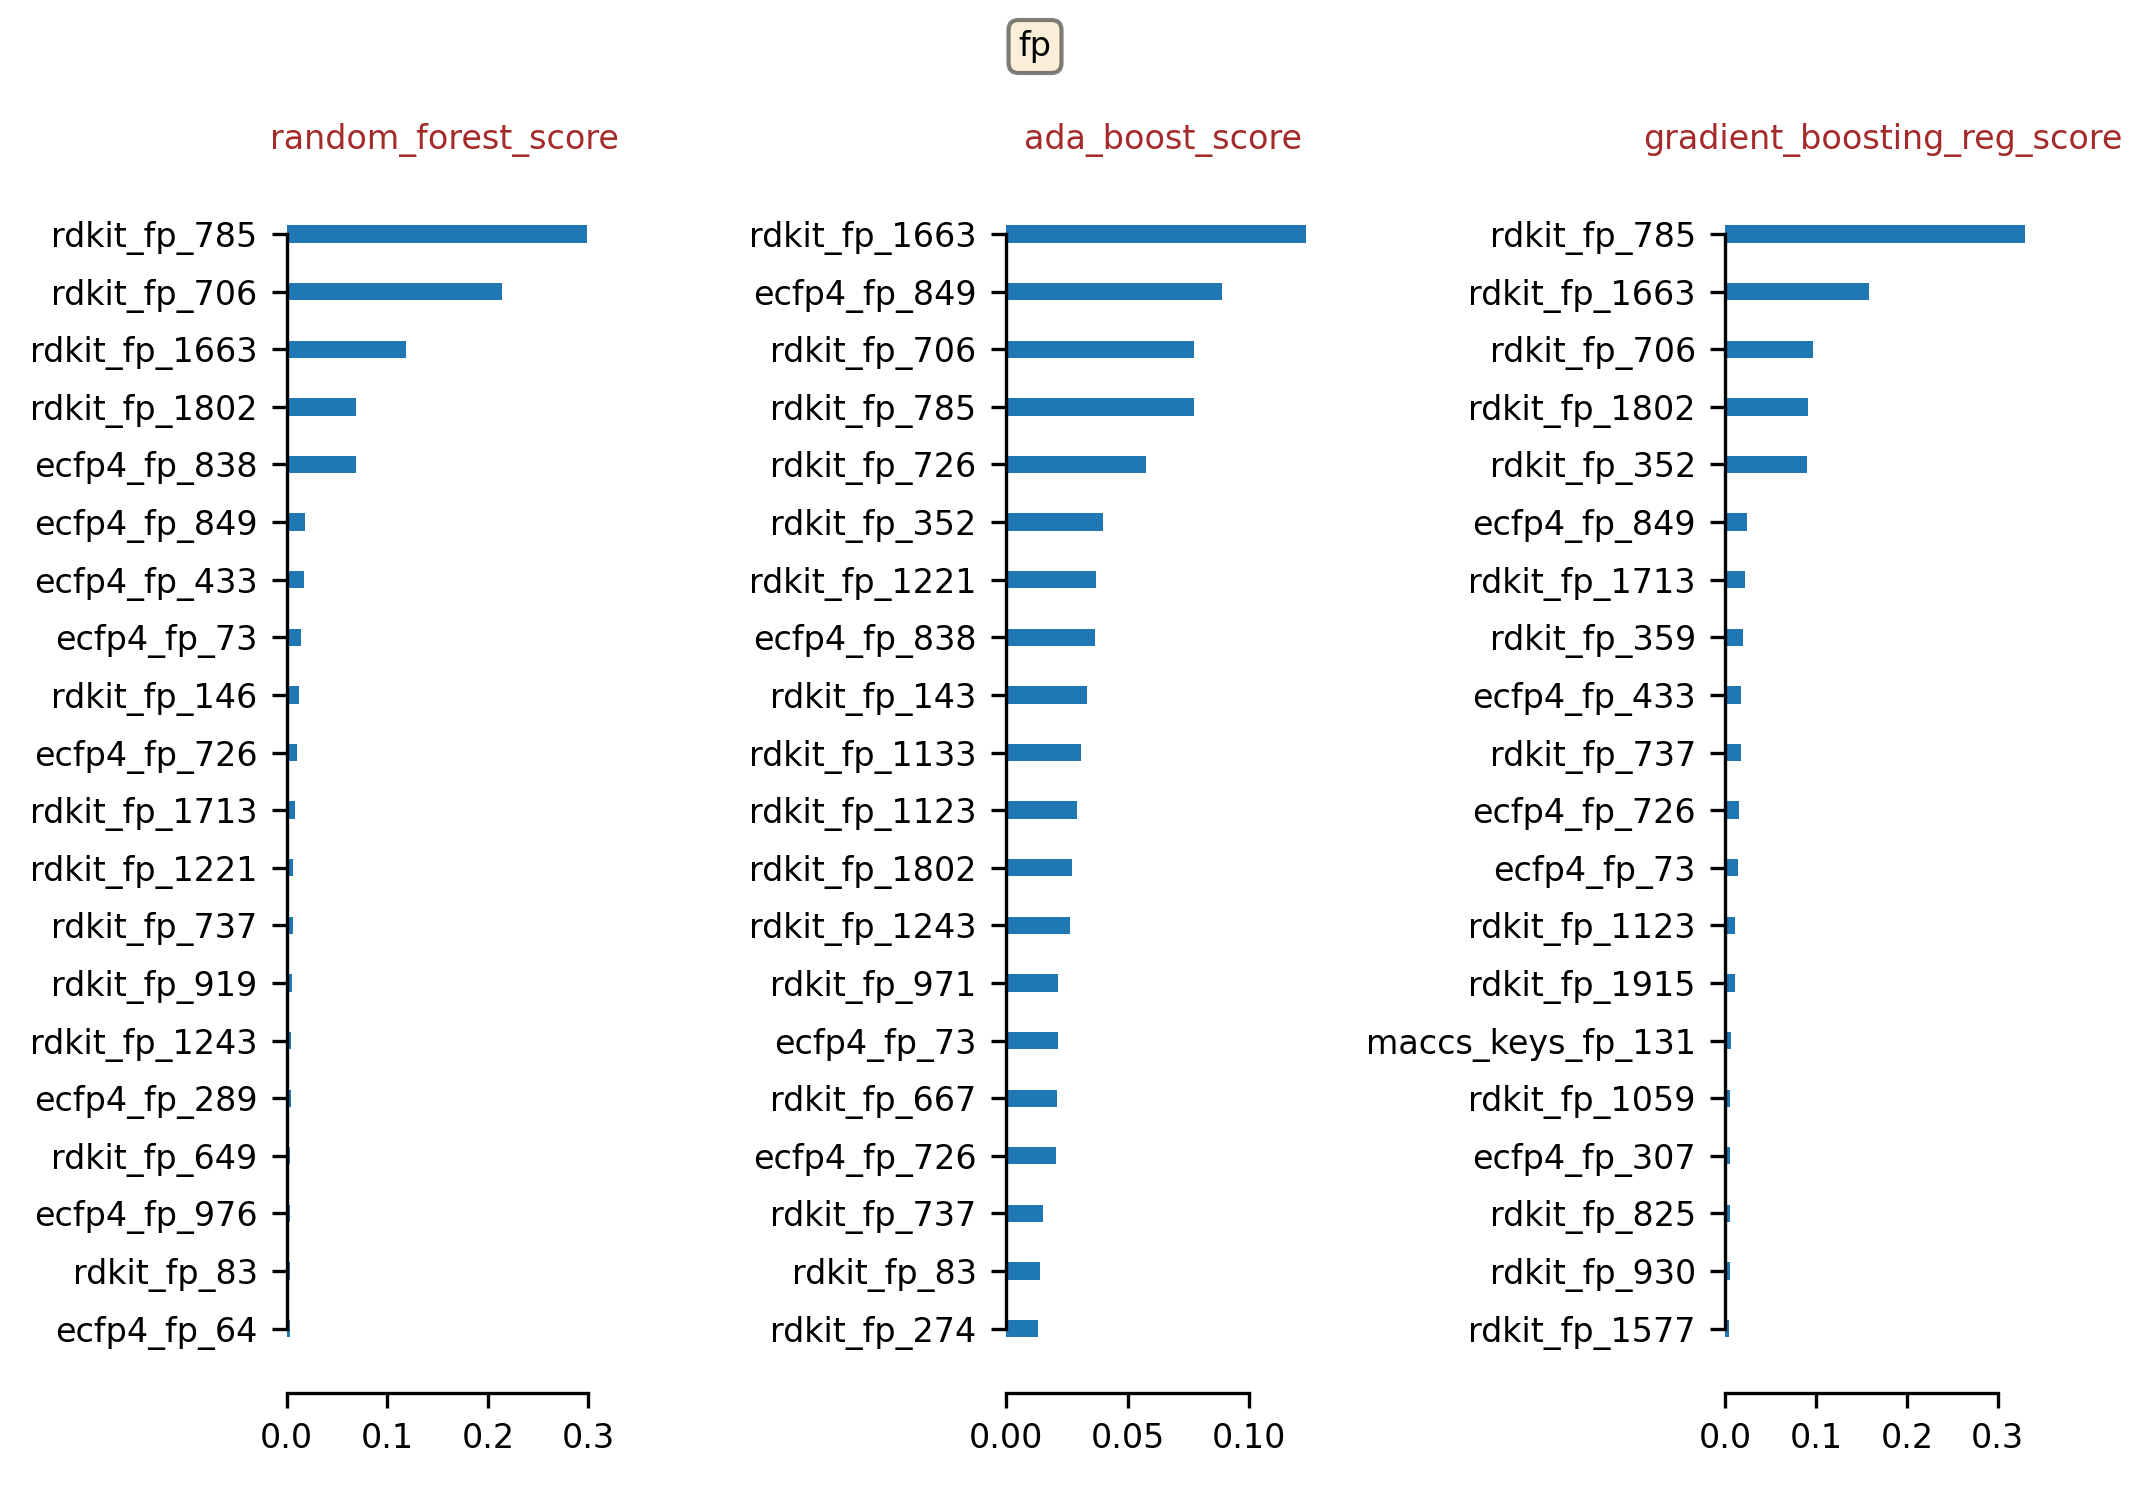

In [239]:
ntop=20
fig,axes=plt.subplots(1,3,figsize=(7,5))
method_list=['random_forest_score','ada_boost_score','gradient_boosting_reg_score']
for i,method in enumerate(method_list):
    _df=df.sort_values(by=method)[-ntop:]
    axes[i].barh(_df['feat_name'],_df[method],height=0.3)
    axes[i].set_title(method)
fig.suptitle('fp',y=0.98,bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/feature_importance_fp.jpg')

# Best Model Error Vs. Num Features

In [311]:
# BEST_MODEL_VS_NUM_FETUREs_2d+3d+fp_rdkit.pkl
feat_type='2d+3d+fp'

rank_list=[1,2]
rank_df_dict={}
for rank in rank_list:
    file_name=f'RANK_{rank}_MODEL_VS_NUM_FETURES_{feat_type}_{LIBRARY}.pkl'
    df=getDataFromFile(file_name)
    df=df.set_index('num_feat')
    rank_df_dict[rank]=df
    print(rank)
    print(df.head())

File Found
1
          feat_set model_name  train_r2  train_mse  train_mae   test_r2  \
num_feat                                                                  
1         3d_rdkit       ARDR  0.892085   0.050567   0.184592  0.840856   
2         3d_rdkit       ARDR  0.896919   0.048302   0.180958  0.853499   
3         3d_rdkit       ARDR  0.896918   0.048302   0.180976  0.853663   
4         3d_rdkit       ARDR  0.896950   0.048288   0.180593  0.856427   
5         3d_rdkit       ARDR  0.896940   0.048292   0.180590  0.856456   

          test_mse  test_mae  
num_feat                      
1         0.069832  0.224070  
2         0.064284  0.212032  
3         0.064213  0.211997  
4         0.063000  0.211382  
5         0.062987  0.211389  
File Found
2
          feat_set model_name  train_r2  train_mse  train_mae   test_r2  \
num_feat                                                                  
1         3d_rdkit      lasso  0.891872   0.050667   0.184612  0.841322   
2     

/home/vanka/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


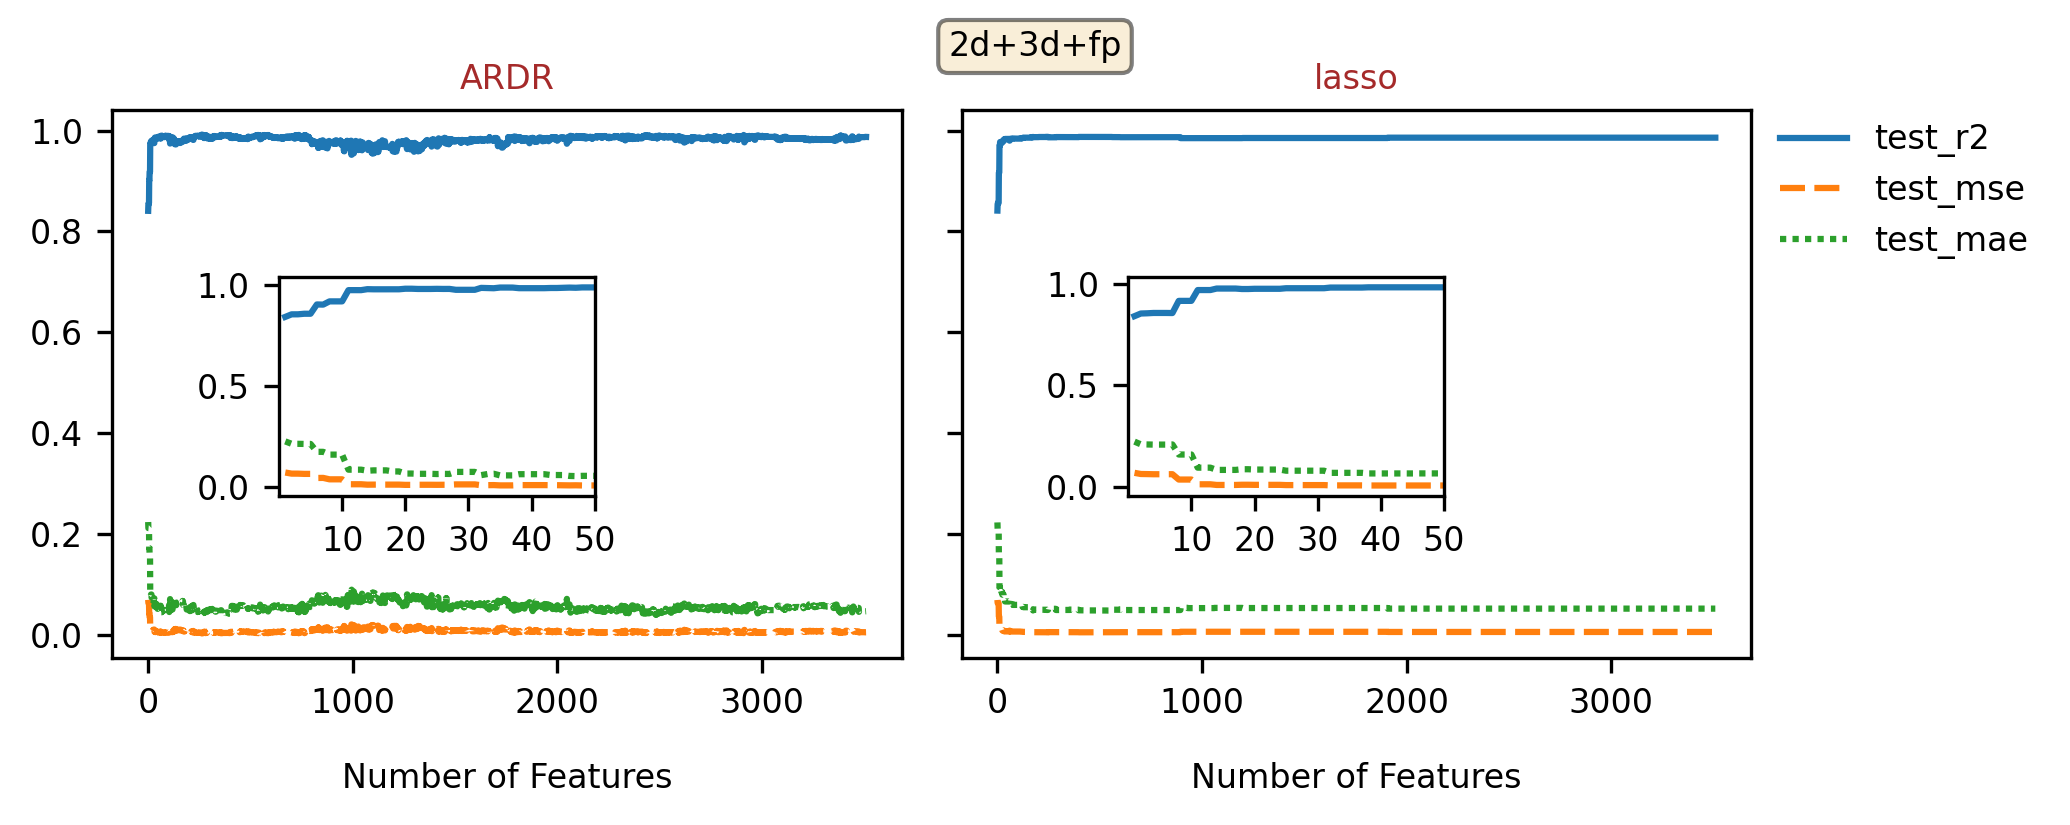

In [312]:
fig,axes=plt.subplots(1,len(rank_list),figsize=(7,3),sharey=True)

for i,rank in enumerate(rank_list):
    df=rank_df_dict[rank]
    ax=axes[i]
    _plot=sns.lineplot(ax=ax,data=df[['test_r2','test_mse','test_mae']])
    inset_ax = inset_axes(ax,width='40%',height='40%',loc=2,borderpad=5)
    sns.lineplot(ax=inset_ax,data=df[['test_r2','test_mse','test_mae']])
    inset_ax.set_xlabel('')
    inset_ax.get_legend().remove()
    inset_ax.set_xlim(0,50)
    inset_ax.set_xticks([10,20,30,40,50])
    ax.set_title(df['model_name'].values[0])
    ax.set_xlabel('Number of Features')
    handles, labels = _plot.get_legend_handles_labels()
    _plot.get_legend().remove()
# fig.legend(handles, labels, loc='upper right',bbox_to_anchor = (0,-0.08,0.95,1))
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.,frameon=False)
fig.suptitle(feat_type,y=0.9,bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
# sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/best_models_error_vs_num_features_{feat_type}.jpg')

In [313]:
# BEST_MODEL_VS_NUM_FETUREs_2d+3d+fp_rdkit.pkl
feat_type='2d'

rank_list=[2,3]
rank_df_dict={}
for rank in rank_list:
    file_name=f'RANK_{rank}_MODEL_VS_NUM_FETURES_{feat_type}_{LIBRARY}.pkl'
    df=getDataFromFile(file_name)
    df=df.set_index('num_feat')
    rank_df_dict[rank]=df
    print(rank)
    print(df.head())

File Found
2
          feat_set model_name  train_r2  train_mse  train_mae   test_r2  \
num_feat                                                                  
1         2d_rdkit      ridge  0.906697   0.043720   0.166669  0.886313   
2         2d_rdkit      ridge  0.913925   0.040333   0.159861  0.891827   
3         2d_rdkit      ridge  0.917312   0.038746   0.155037  0.898601   
4         2d_rdkit      ridge  0.976351   0.011081   0.081789  0.972264   
5         2d_rdkit      ridge  0.981232   0.008794   0.073648  0.977787   

          test_mse  test_mae  
num_feat                      
1         0.049886  0.183423  
2         0.047466  0.176209  
3         0.044494  0.166857  
4         0.012171  0.076166  
5         0.009747  0.073245  
File Found
3
          feat_set      model_name  train_r2  train_mse  train_mae   test_r2  \
num_feat                                                                       
1         2d_rdkit  bayesian_ridge  0.906746   0.043697   0.166746  0.8

/home/vanka/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


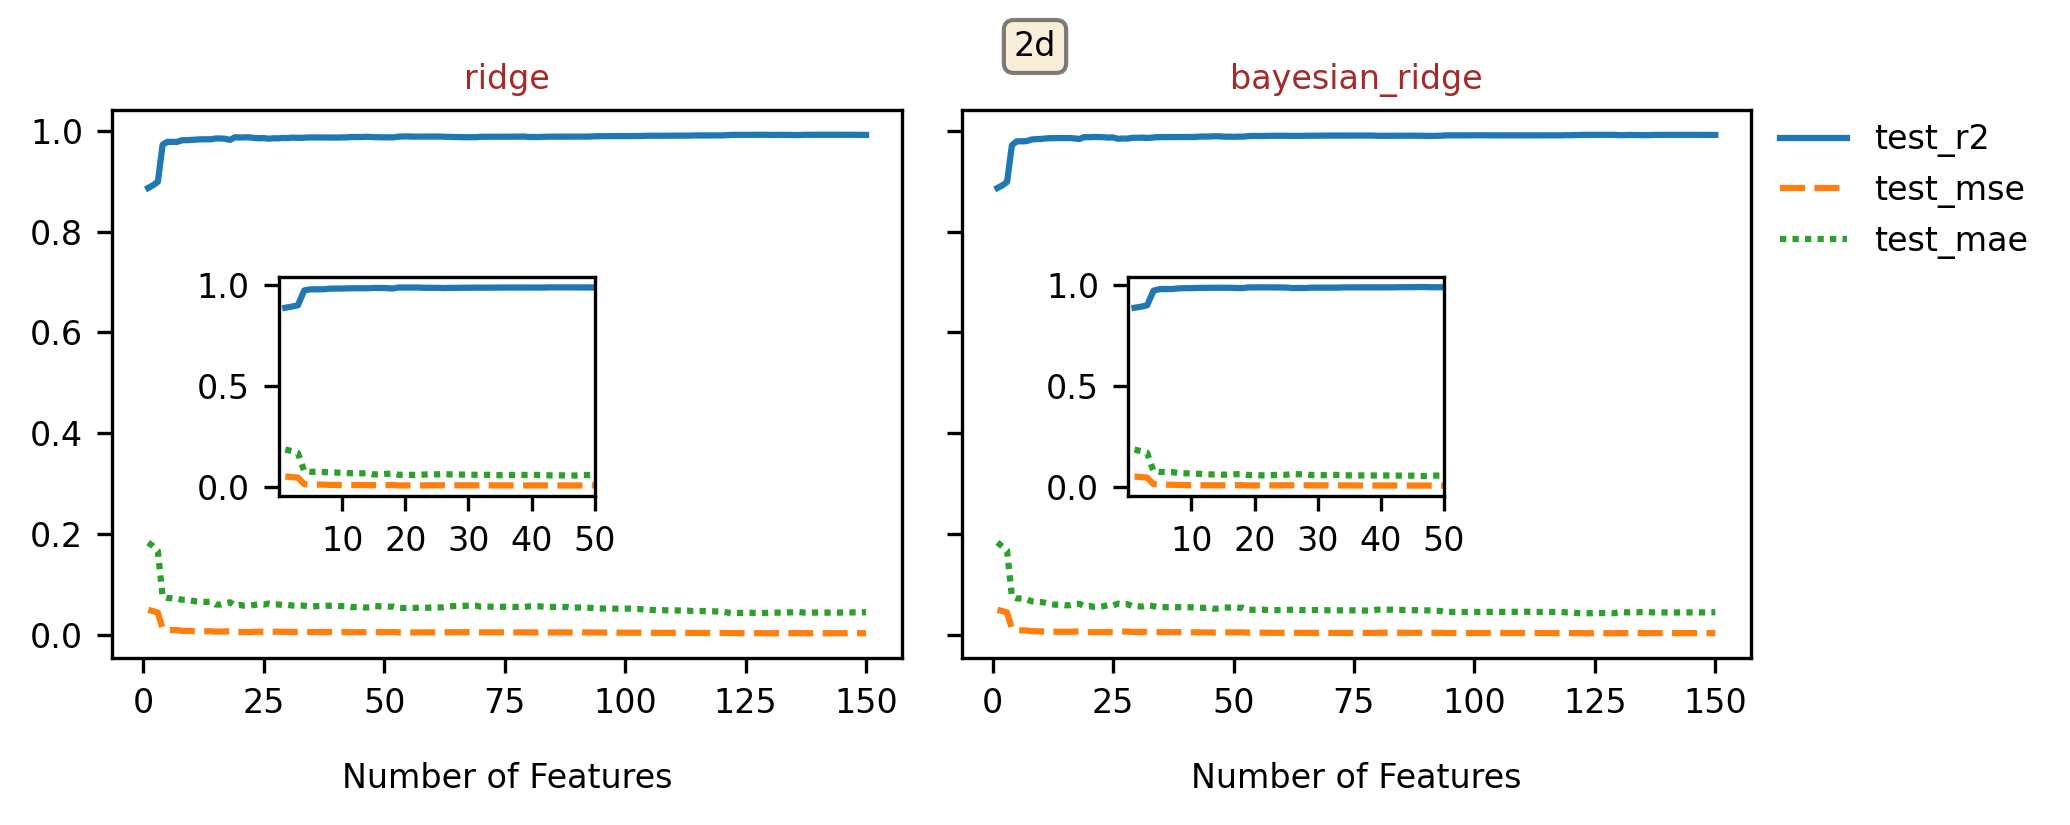

In [314]:
fig,axes=plt.subplots(1,len(rank_list),figsize=(7,3),sharey=True)

for i,rank in enumerate(rank_list):
    df=rank_df_dict[rank]
    ax=axes[i]
    _plot=sns.lineplot(ax=ax,data=df[['test_r2','test_mse','test_mae']])
    inset_ax = inset_axes(ax,width='40%',height='40%',loc=2,borderpad=5)
    sns.lineplot(ax=inset_ax,data=df[['test_r2','test_mse','test_mae']])
    inset_ax.set_xlabel('')
    inset_ax.get_legend().remove()
    inset_ax.set_xlim(0,50)
    inset_ax.set_xticks([10,20,30,40,50])
    ax.set_title(df['model_name'].values[0])
    ax.set_xlabel('Number of Features')
    handles, labels = _plot.get_legend_handles_labels()
    _plot.get_legend().remove()
# fig.legend(handles, labels, loc='upper right',bbox_to_anchor = (0,-0.08,0.95,1))
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.,frameon=False)
fig.suptitle(feat_type,y=0.9,bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
# sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/best_models_error_vs_num_features_{feat_type}.jpg')

In [315]:
# BEST_MODEL_VS_NUM_FETUREs_2d+3d+fp_rdkit.pkl
feat_type='3d'

rank_list=[1,2]
rank_df_dict={}
for rank in rank_list:
    file_name=f'RANK_{rank}_MODEL_VS_NUM_FETURES_{feat_type}_{LIBRARY}.pkl'
    df=getDataFromFile(file_name)
    df=df.set_index('num_feat')
    rank_df_dict[rank]=df
    print(rank)
    print(df.head())

File Found
1
          feat_set             model_name  train_r2  train_mse  train_mae  \
num_feat                                                                    
1         3d_rdkit  gradient_boosting_reg  0.949110   0.023846   0.115105   
2         3d_rdkit  gradient_boosting_reg  0.950579   0.023158   0.107226   
3         3d_rdkit  gradient_boosting_reg  0.994741   0.002464   0.035300   
4         3d_rdkit  gradient_boosting_reg  0.994565   0.002547   0.035696   
5         3d_rdkit  gradient_boosting_reg  0.997797   0.001032   0.025098   

           test_r2  test_mse  test_mae  
num_feat                                
1         0.518167  0.211428  0.219488  
2         0.758744  0.105863  0.184430  
3         0.876004  0.054409  0.149952  
4         0.884798  0.050551  0.145169  
5         0.914838  0.037369  0.135468  
File Found
2
          feat_set    model_name  train_r2  train_mse  train_mae   test_r2  \
num_feat                                                             

/home/vanka/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


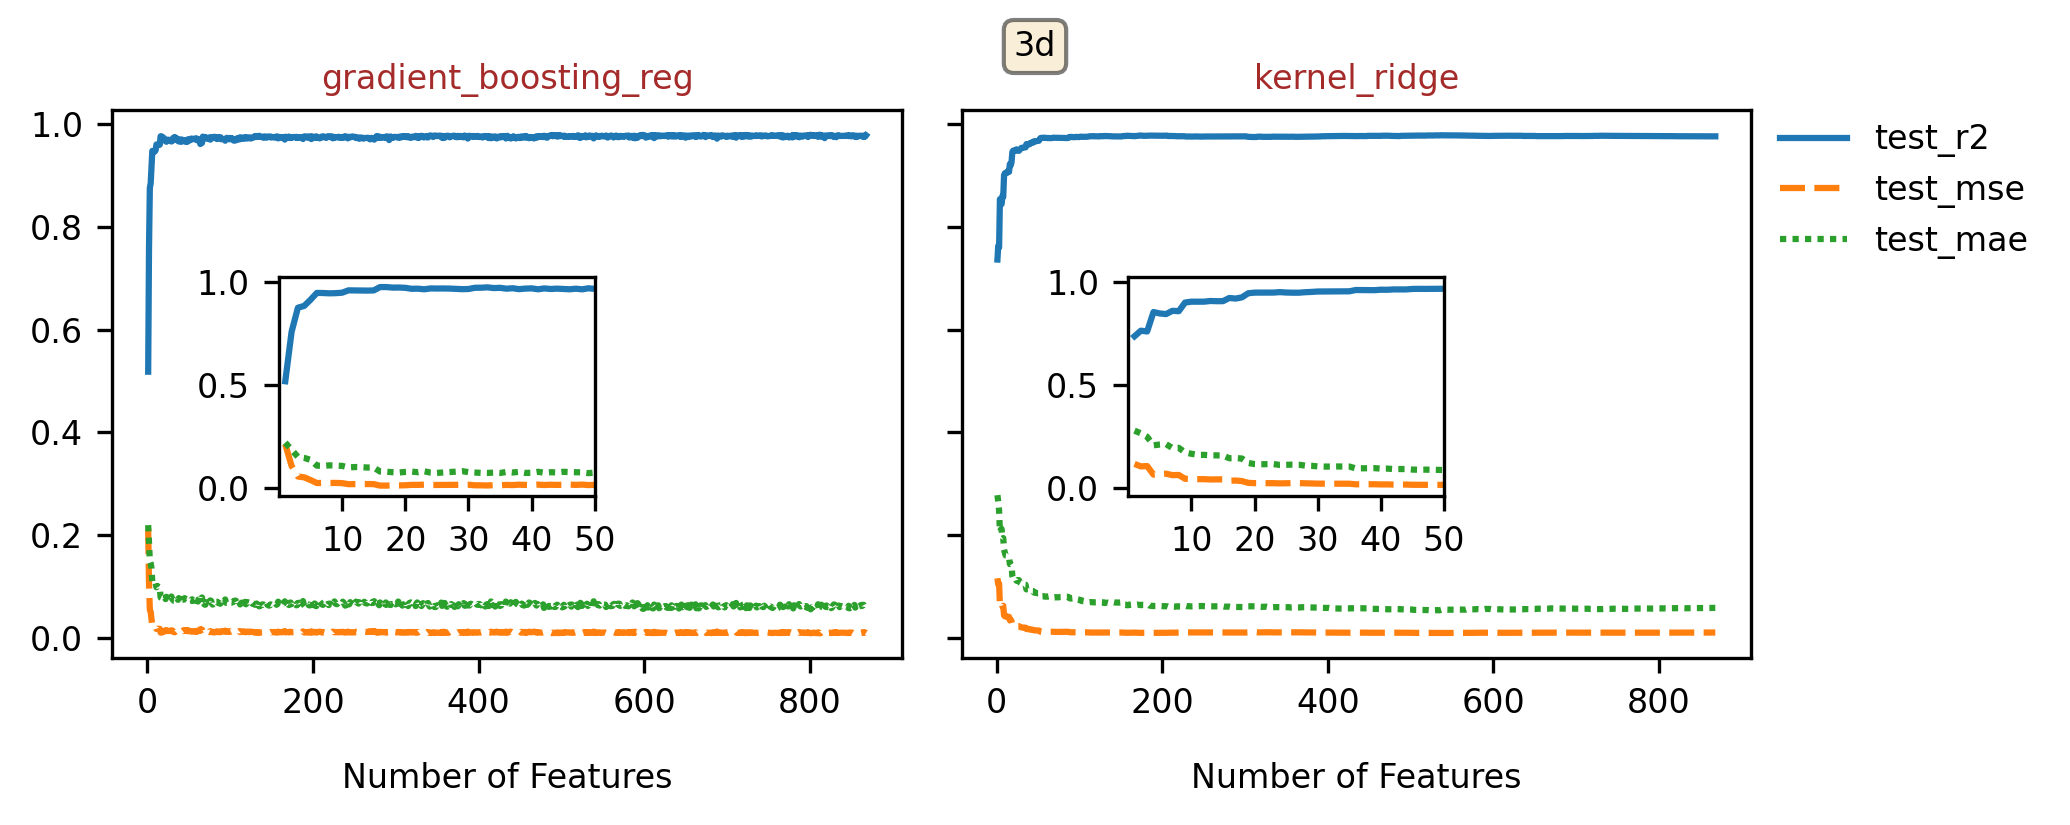

In [316]:
fig,axes=plt.subplots(1,len(rank_list),figsize=(7,3),sharey=True)

for i,rank in enumerate(rank_list):
    df=rank_df_dict[rank]
    ax=axes[i]
    _plot=sns.lineplot(ax=ax,data=df[['test_r2','test_mse','test_mae']])
    inset_ax = inset_axes(ax,width='40%',height='40%',loc=2,borderpad=5)
    sns.lineplot(ax=inset_ax,data=df[['test_r2','test_mse','test_mae']])
    inset_ax.set_xlabel('')
    inset_ax.get_legend().remove()
    inset_ax.set_xlim(0,50)
    inset_ax.set_xticks([10,20,30,40,50])
    ax.set_title(df['model_name'].values[0])
    ax.set_xlabel('Number of Features')
    handles, labels = _plot.get_legend_handles_labels()
    _plot.get_legend().remove()
# fig.legend(handles, labels, loc='upper right',bbox_to_anchor = (0,-0.08,0.95,1))
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.,frameon=False)
fig.suptitle(feat_type,y=0.9,bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
# sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/best_models_error_vs_num_features_{feat_type}.jpg')

In [319]:
# BEST_MODEL_VS_NUM_FETUREs_2d+3d+fp_rdkit.pkl
feat_type='fp_deepchem'

rank_list=[1,2]
rank_df_dict={}
for rank in rank_list:
    file_name=f'RANK_{rank}_MODEL_VS_NUM_FETURES_{feat_type}_{LIBRARY}.pkl'
    df=getDataFromFile(file_name)
    df=df.set_index('num_feat')
    rank_df_dict[rank]=df
    print(rank)
    print(df.head())

File Found
1
          feat_set     model_name  train_r2  train_mse  train_mae   test_r2  \
num_feat                                                                      
1         fp_rdkit  random_forest  0.770889   0.107357   0.240408  0.715220   
2         fp_rdkit  random_forest  0.800373   0.093542   0.228488  0.709332   
3         fp_rdkit  random_forest  0.813270   0.087498   0.218518  0.750567   
4         fp_rdkit  random_forest  0.826587   0.081258   0.209995  0.770721   
5         fp_rdkit  random_forest  0.840906   0.074549   0.207245  0.757510   

          test_mse  test_mae  
num_feat                      
1         0.124962  0.284157  
2         0.127545  0.284474  
3         0.109451  0.271356  
4         0.100608  0.261693  
5         0.106404  0.267872  
File Found
2
          feat_set      model_name  train_r2  train_mse  train_mae   test_r2  \
num_feat                                                                       
1         fp_rdkit  neural_network  0.77089

/home/vanka/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


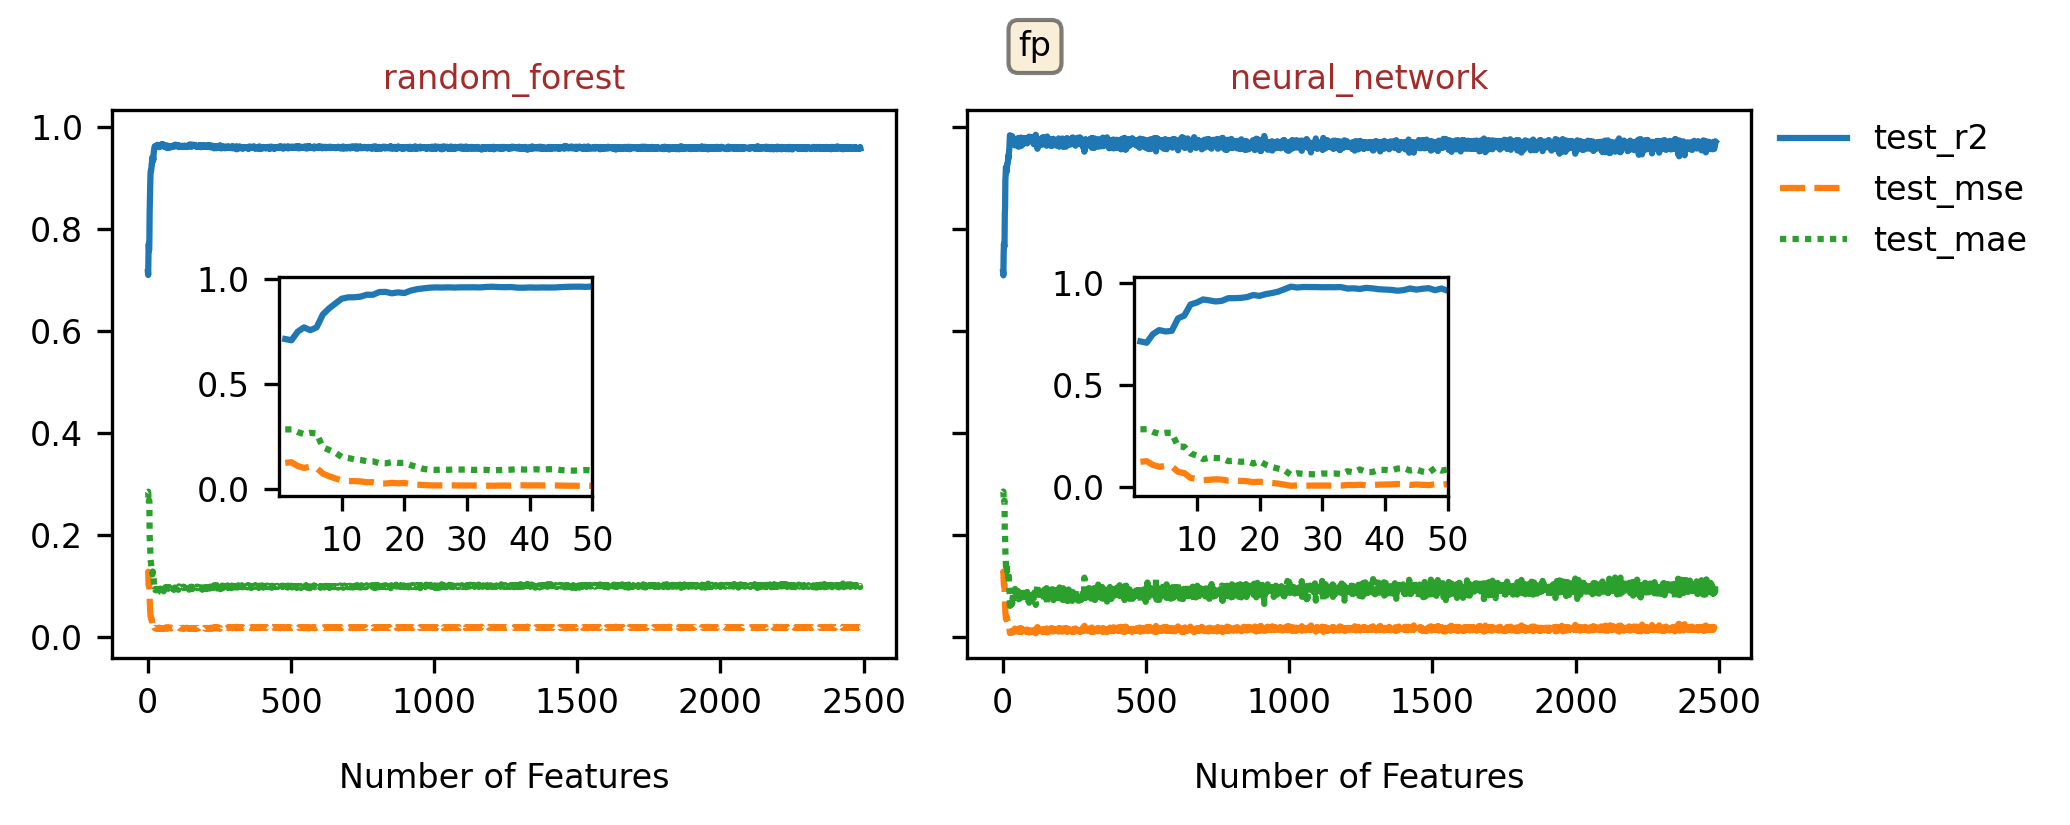

In [322]:
fig,axes=plt.subplots(1,len(rank_list),figsize=(7,3),sharey=True)

for i,rank in enumerate(rank_list):
    df=rank_df_dict[rank]
    ax=axes[i]
    _plot=sns.lineplot(ax=ax,data=df[['test_r2','test_mse','test_mae']])
    inset_ax = inset_axes(ax,width='40%',height='40%',loc=2,borderpad=5)
    sns.lineplot(ax=inset_ax,data=df[['test_r2','test_mse','test_mae']])
    inset_ax.set_xlabel('')
    inset_ax.get_legend().remove()
    inset_ax.set_xlim(0,50)
    inset_ax.set_xticks([10,20,30,40,50])
    ax.set_title(df['model_name'].values[0])
    ax.set_xlabel('Number of Features')
    handles, labels = _plot.get_legend_handles_labels()
    _plot.get_legend().remove()
# fig.legend(handles, labels, loc='upper right',bbox_to_anchor = (0,-0.08,0.95,1))
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.,frameon=False)
fig.suptitle('fp',y=0.9,bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
# sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/best_models_error_vs_num_features_fp.jpg')

# Model Performance on Top n=5,10,15,20 Features

In [336]:
hue_order=[f'top_5',f'top_10',f'top_15',f'top_20']

In [337]:
# TOP_FEAT_MODEL_PERFORMANCE_DATA_DF_rdkit.pkl
feat_type='2d+3d+fp'
file_name=f'TOP_5_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df1=getDataFromFile(file_name)
file_name=f'TOP_10_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df2=getDataFromFile(file_name)
file_name=f'TOP_15_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df3=getDataFromFile(file_name)
file_name=f'TOP_20_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df4=getDataFromFile(file_name)
df=pd.concat([df1,df2,df3,df4])
df['feat_set']=df['feat_set'].apply(lambda x:x.replace(f'_{feat_type}_rdkit',''))
df

File Found
File Found
File Found
File Found


feat_set             model_name  \
0     top_5             linear_reg   
1     top_5                  ridge   
2     top_5                  lasso   
3     top_5            elastic_net   
4     top_5             lasso_lars   
..      ...                    ...   
15   top_20          random_forest   
16   top_20              ada_boost   
17   top_20  gradient_boosting_reg   
18   top_20         neural_network   
19   top_20                knn_reg   

                                               gs_obj  \
0   GridSearchCV(cv=10, estimator=LinearRegression...   
1   GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...   
2   GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...   
3   GridSearchCV(cv=10, estimator=ElasticNet(), n_...   
4   GridSearchCV(cv=10, estimator=LassoLars(), n_j...   
..                                                ...   
15  GridSearchCV(cv=10, estimator=RandomForestRegr...   
16  GridSearchCV(cv=10, estimator=AdaBoostRegresso...   
17  GridSearchCV(cv=10, estimator=GradientBoosting...   
18  GridSearchCV(cv=10,\n             estimator=ML...   
19  GridSearchCV(cv=10, estimator=KNeighborsRegres...   

                                            opt_model  \
0                                  LinearRegression()   
1       Ridge(alpha=1.5, max_iter=500, solver='saga')   
2   Lasso(alpha=0.01, max_iter=100, positive=True,...   
3   ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...   
4   LassoLars(alpha=0.01, max_iter=100, positive=T...   
..                                                ...   
15  (DecisionTreeRegressor(max_features='auto', ra...   
16  (DecisionTreeRegressor(max_depth=3, random_sta...   
17  ([DecisionTreeRegressor(criterion='friedman_ms...   
18  MLPRegressor(activation='logistic', early_stop...   
19   KNeighborsRegressor(leaf_size=40, n_neighbors=1)   

                                           opt_params  \
0   {'fit_intercept': True, 'normalize': False, 'p...   
1   {'alpha': 1.5, 'max_iter': 500, 'solver': 'sag...   
2   {'alpha': 0.01, 'max_iter': 100, 'positive': T...   
3   {'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...   
4   {'alpha': 0.01, 'jitter': None, 'max_iter': 10...   
..                                                ...   
15  {'bootstrap': True, 'n_estimators': 50, 'oob_s...   
16  {'learning_rate': 1, 'loss': 'square', 'n_esti...   
17  {'max_depth': 3, 'n_estimators': 200, 'tol': 0...   
18  {'activation': 'logistic', 'early_stopping': T...   
19  {'algorithm': 'auto', 'leaf_size': 40, 'n_neig...   

                                         cv_score_obj  cv_mean_test_r2  \
0   {'fit_time': [0.006017208099365234, 0.00429606...         0.868526   
1   {'fit_time': [0.0072209835052490234, 0.0081646...         0.841275   
2   {'fit_time': [0.006262063980102539, 0.00309872...         0.848108   
3   {'fit_time': [0.006130695343017578, 0.00455546...         0.745694   
4   {'fit_time': [0.00518488883972168, 0.006794452...         0.819051   
..                                                ...              ...   
15  {'fit_time': [0.16899347305297852, 0.168492078...         0.970978   
16  {'fit_time': [0.2324521541595459, 0.1525628566...         0.969531   
17  {'fit_time': [0.19294285774230957, 0.193919420...         0.972149   
18  {'fit_time': [1.132509469985962, 0.78051757812...         0.982965   
19  {'fit_time': [0.0052678585052490234, 0.0059516...         0.960354   

    cv_mean_test_mse  cv_mean_test_mae  train_r2  train_mse  train_mae  \
0           0.056363          0.173878  0.919340   0.037796   0.156828   
1           0.066330          0.195752  0.896807   0.048355   0.179494   
2           0.059650          0.191850  0.897014   0.048257   0.180195   
3           0.095085          0.255619  0.808396   0.089782   0.249853   
4           0.064690          0.208752  0.867870   0.061914   0.204116   
..               ...               ...       ...        ...        ...   
15          0.013566          0.073052  0.995837   0.001951   0.025606   
16        

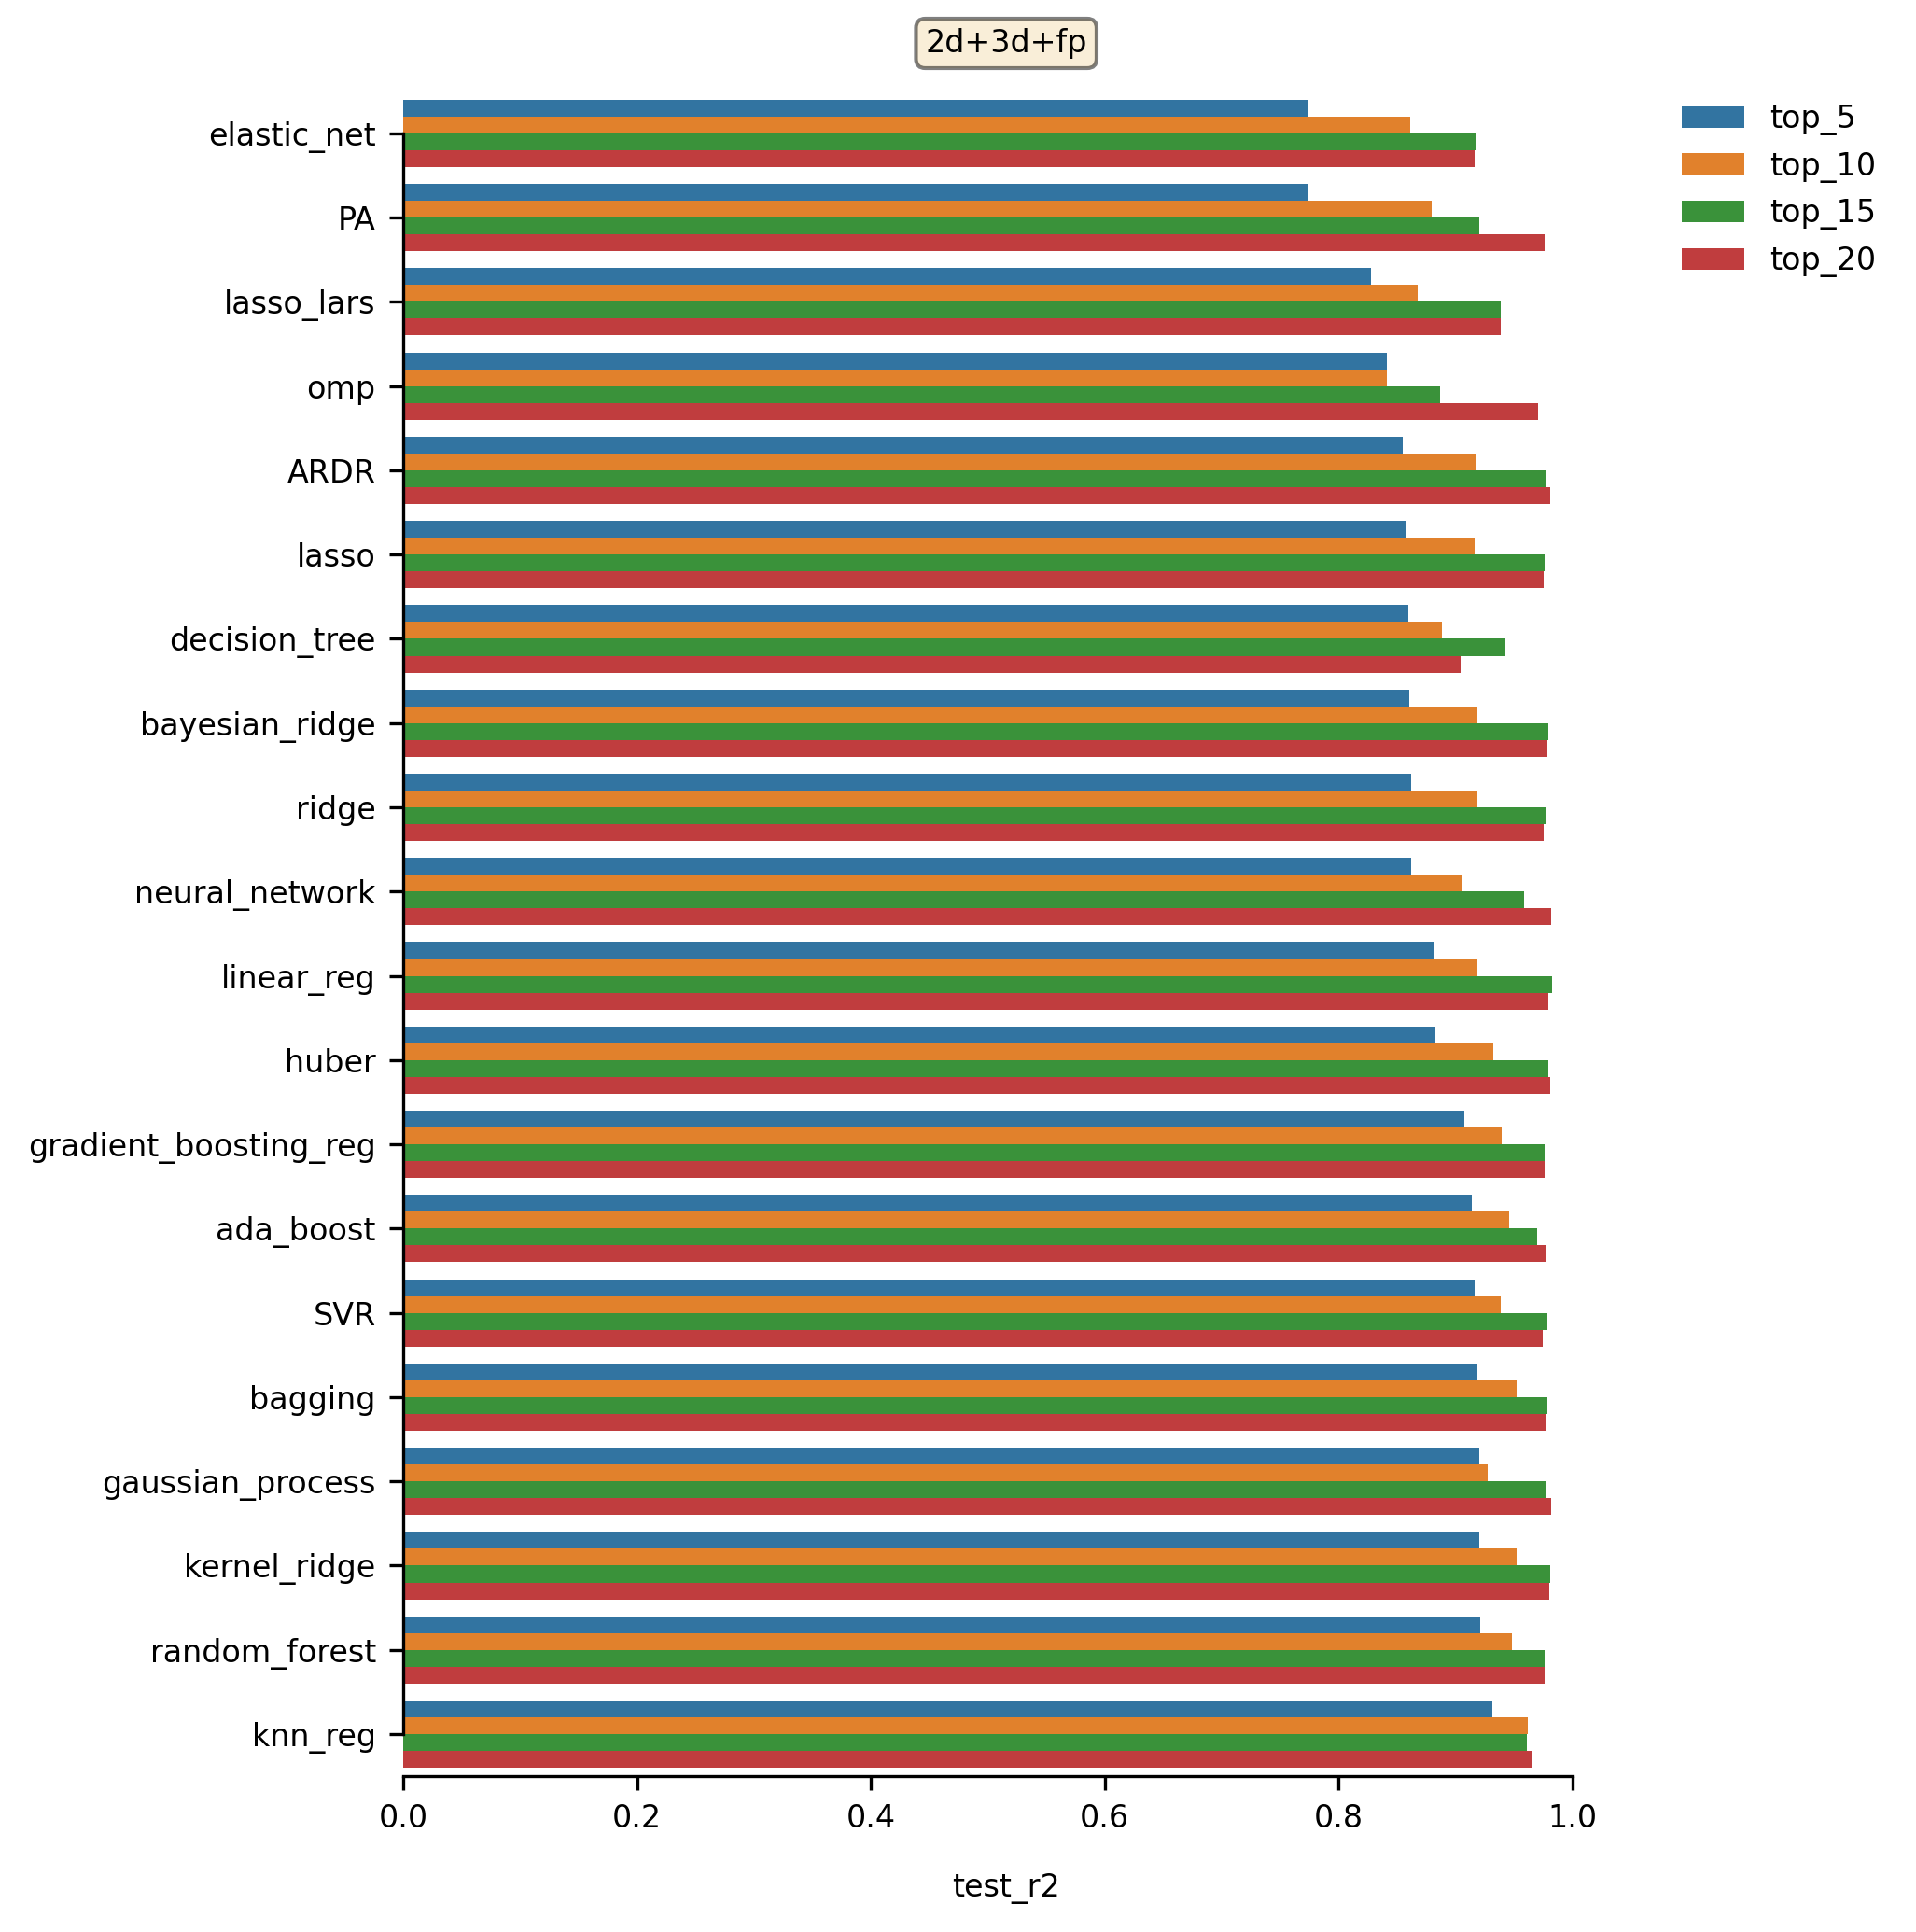

In [340]:
plt.figure(figsize=(7,7))
df=df.sort_values(by='test_r2')
sns.barplot(x='test_r2',y='model_name',data=df,hue='feat_set',hue_order=hue_order)
plt.title(feat_type,pad=10,bbox=bbox,color='black')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/top_5-20_features_vs_test_r2_{feat_type}.jpg')

In [341]:
# TOP_FEAT_MODEL_PERFORMANCE_DATA_DF_rdkit.pkl
feat_type='2d'
file_name=f'TOP_5_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df1=getDataFromFile(file_name)
file_name=f'TOP_10_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df2=getDataFromFile(file_name)
file_name=f'TOP_15_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df3=getDataFromFile(file_name)
file_name=f'TOP_20_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df4=getDataFromFile(file_name)
df=pd.concat([df1,df2,df3,df4])
df['feat_set']=df['feat_set'].apply(lambda x:x.replace(f'_{feat_type}_rdkit',''))
df

File Found
File Found
File Found
File Found


feat_set             model_name  \
0     top_5             linear_reg   
1     top_5                  ridge   
2     top_5                  lasso   
3     top_5            elastic_net   
4     top_5             lasso_lars   
..      ...                    ...   
15   top_20          random_forest   
16   top_20              ada_boost   
17   top_20  gradient_boosting_reg   
18   top_20         neural_network   
19   top_20                knn_reg   

                                               gs_obj  \
0   GridSearchCV(cv=10, estimator=LinearRegression...   
1   GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...   
2   GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...   
3   GridSearchCV(cv=10, estimator=ElasticNet(), n_...   
4   GridSearchCV(cv=10, estimator=LassoLars(), n_j...   
..                                                ...   
15  GridSearchCV(cv=10, estimator=RandomForestRegr...   
16  GridSearchCV(cv=10, estimator=AdaBoostRegresso...   
17  GridSearchCV(cv=10, estimator=GradientBoosting...   
18  GridSearchCV(cv=10,\n             estimator=ML...   
19  GridSearchCV(cv=10, estimator=KNeighborsRegres...   

                                            opt_model  \
0                                  LinearRegression()   
1    Ridge(alpha=1, max_iter=500, solver='sparse_cg')   
2                     Lasso(alpha=0.01, max_iter=100)   
3   ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...   
4                 LassoLars(alpha=0.01, max_iter=100)   
..                                                ...   
15  (DecisionTreeRegressor(max_features='auto', ra...   
16  (DecisionTreeRegressor(max_depth=3, random_sta...   
17  ([DecisionTreeRegressor(criterion='friedman_ms...   
18  MLPRegressor(activation='logistic', early_stop...   
19  KNeighborsRegressor(algorithm='ball_tree', lea...   

                                           opt_params  \
0   {'fit_intercept': True, 'normalize': False, 'p...   
1   {'alpha': 1, 'max_iter': 500, 'solver': 'spars...   
2   {'alpha': 0.01, 'max_iter': 100, 'positive': F...   
3   {'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...   
4   {'alpha': 0.01, 'jitter': None, 'max_iter': 10...   
..                                                ...   
15  {'bootstrap': False, 'n_estimators': 250, 'oob...   
16  {'learning_rate': 0.5, 'loss': 'square', 'n_es...   
17  {'max_depth': 20, 'n_estimators': 500, 'tol': ...   
18  {'activation': 'logistic', 'early_stopping': T...   
19  {'algorithm': 'ball_tree', 'leaf_size': 40, 'n...   

                                         cv_score_obj  cv_mean_test_r2  \
0   {'fit_time': [0.005939483642578125, 0.00547742...         0.970908   
1   {'fit_time': [0.00455784797668457, 0.005288124...         0.973857   
2   {'fit_time': [0.0045490264892578125, 0.0031719...         0.970618   
3   {'fit_time': [0.005830526351928711, 0.00572681...         0.860318   
4   {'fit_time': [0.0037775039672851562, 0.0068953...         0.919829   
..                                                ...              ...   
15  {'fit_time': [0.43282103538513184, 0.480767011...         0.973428   
16  {'fit_time': [0.1209249496459961, 0.0857586860...         0.970343   
17  {'fit_time': [0.7712900638580322, 0.7661314010...         0.974960   
18  {'fit_time': [0.6156139373779297, 0.7350287437...         0.965405   
19  {'fit_time': [0.0026979446411132812, 0.0044002...         0.971817   

    cv_mean_test_mse  cv_mean_test_mae  train_r2  train_mse  train_mae  \
0           0.010407          0.078567  0.981481   0.008678   0.073513   
1           0.009687          0.077204  0.981199   0.008810   0.073583   
2           0.011428          0.084688  0.978086   0.010268   0.080821   
3           0.054158          0.208544  0.890853   0.051145   0.203699   
4           0.029793          0.148629  0.935145   0.030390   0.152081   
..               ...               ...       ...        ...        ...   
15          0.011551          0.066957  0.999963   0.000017   0.000698   
16        

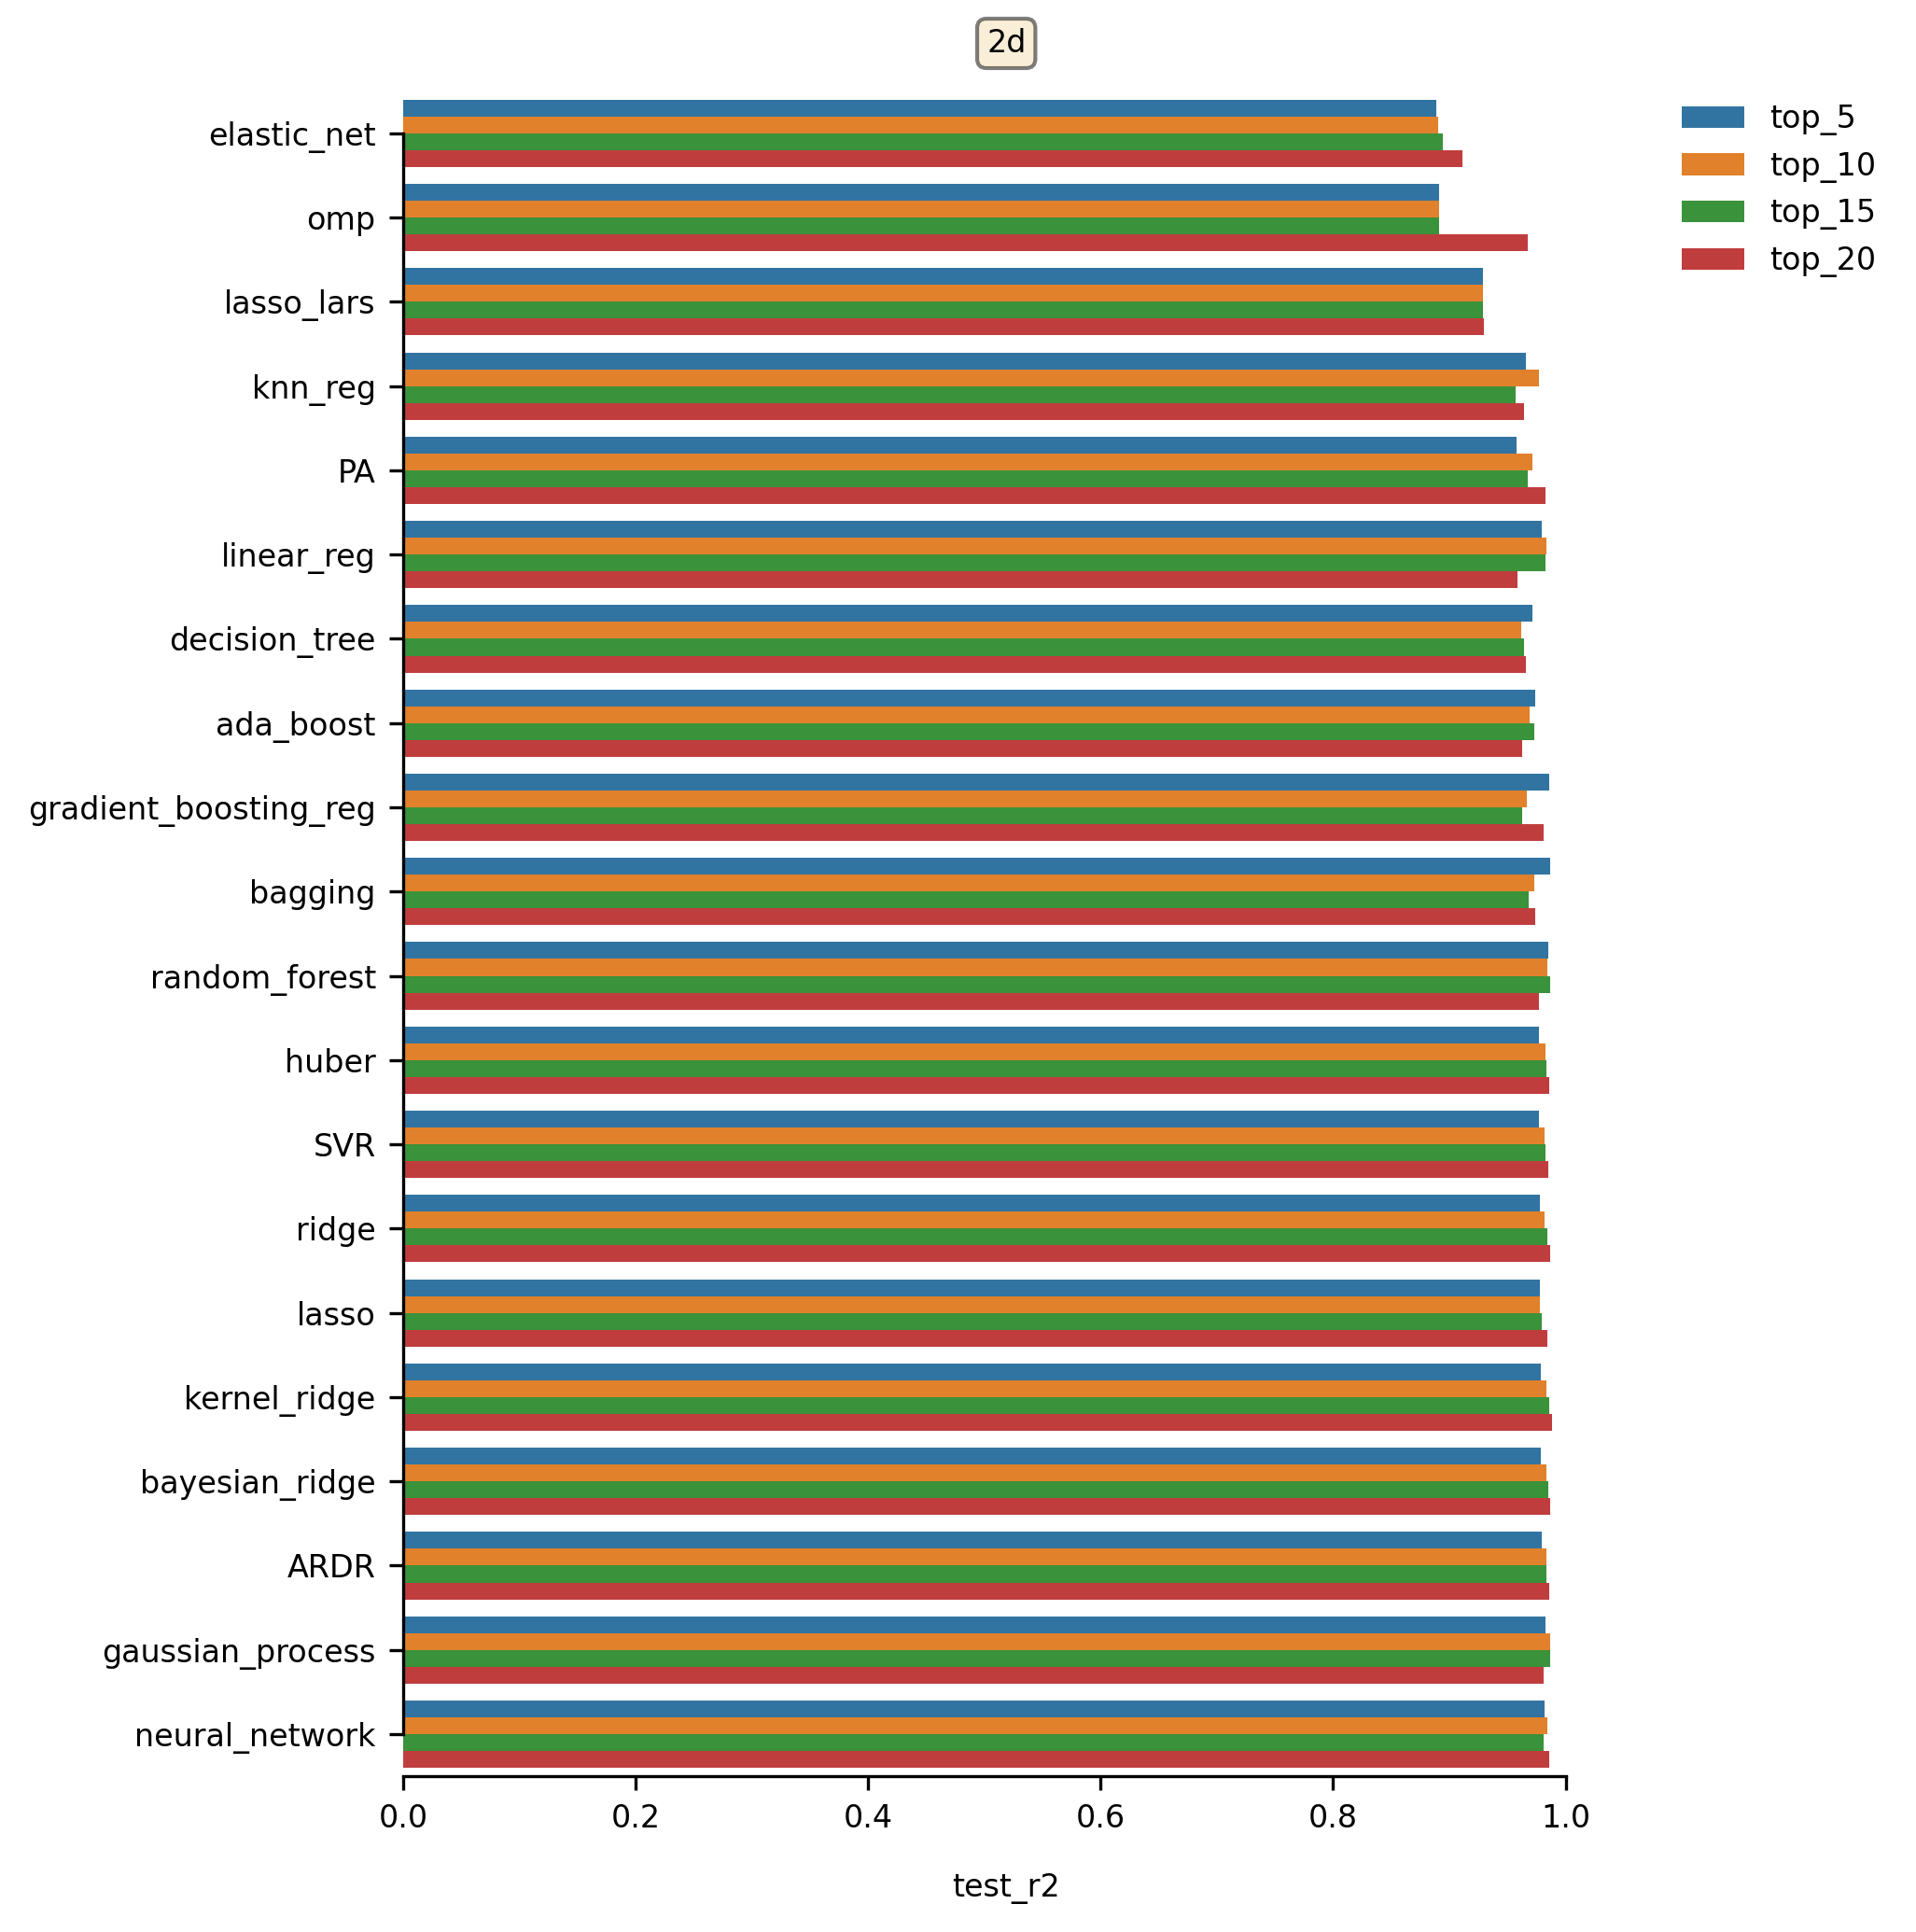

In [342]:
#SI
plt.figure(figsize=(7,7))
df=df.sort_values(by='test_r2')
sns.barplot(x='test_r2',y='model_name',data=df,hue='feat_set',hue_order=hue_order)
plt.title(feat_type,pad=10,bbox=bbox,color='black')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/top_5-20_features_vs_test_r2_{feat_type}.jpg')

In [343]:
# TOP_FEAT_MODEL_PERFORMANCE_DATA_DF_rdkit.pkl
feat_type='3d'
file_name=f'TOP_5_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df1=getDataFromFile(file_name)
file_name=f'TOP_10_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df2=getDataFromFile(file_name)
file_name=f'TOP_15_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df3=getDataFromFile(file_name)
file_name=f'TOP_20_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df4=getDataFromFile(file_name)
df=pd.concat([df1,df2,df3,df4])
df['feat_set']=df['feat_set'].apply(lambda x:x.replace(f'_{feat_type}_rdkit',''))
df

File Found
File Found
File Found
File Found


feat_set             model_name  \
0     top_5             linear_reg   
1     top_5                  ridge   
2     top_5                  lasso   
3     top_5            elastic_net   
4     top_5             lasso_lars   
..      ...                    ...   
15   top_20          random_forest   
16   top_20              ada_boost   
17   top_20  gradient_boosting_reg   
18   top_20         neural_network   
19   top_20                knn_reg   

                                               gs_obj  \
0   GridSearchCV(cv=10, estimator=LinearRegression...   
1   GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...   
2   GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...   
3   GridSearchCV(cv=10, estimator=ElasticNet(), n_...   
4   GridSearchCV(cv=10, estimator=LassoLars(), n_j...   
..                                                ...   
15  GridSearchCV(cv=10, estimator=RandomForestRegr...   
16  GridSearchCV(cv=10, estimator=AdaBoostRegresso...   
17  GridSearchCV(cv=10, estimator=GradientBoosting...   
18  GridSearchCV(cv=10,\n             estimator=ML...   
19  GridSearchCV(cv=10, estimator=KNeighborsRegres...   

                                            opt_model  \
0                                  LinearRegression()   
1   Ridge(alpha=0.5, max_iter=500, solver='lsqr', ...   
2   Lasso(alpha=0.01, max_iter=500, positive=True,...   
3   ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...   
4   LassoLars(alpha=0.01, max_iter=100, positive=T...   
..                                                ...   
15  (DecisionTreeRegressor(max_features='auto', ra...   
16  (DecisionTreeRegressor(max_depth=3, random_sta...   
17  ([DecisionTreeRegressor(criterion='friedman_ms...   
18  MLPRegressor(activation='logistic', hidden_lay...   
19   KNeighborsRegressor(leaf_size=40, n_neighbors=1)   

                                           opt_params  \
0   {'fit_intercept': True, 'normalize': False, 'p...   
1   {'alpha': 0.5, 'max_iter': 500, 'solver': 'lsq...   
2   {'alpha': 0.01, 'max_iter': 500, 'positive': T...   
3   {'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...   
4   {'alpha': 0.01, 'jitter': None, 'max_iter': 10...   
..                                                ...   
15  {'bootstrap': True, 'n_estimators': 200, 'oob_...   
16  {'learning_rate': 1, 'loss': 'exponential', 'n...   
17  {'max_depth': 3, 'n_estimators': 150, 'tol': 0...   
18  {'activation': 'logistic', 'early_stopping': F...   
19  {'algorithm': 'auto', 'leaf_size': 40, 'n_neig...   

                                         cv_score_obj  cv_mean_test_r2  \
0   {'fit_time': [0.006155729293823242, 0.00304007...         0.870611   
1   {'fit_time': [0.0031566619873046875, 0.0042719...         0.854181   
2   {'fit_time': [0.0031321048736572266, 0.0038704...         0.848960   
3   {'fit_time': [0.006028175354003906, 0.00270581...         0.745914   
4   {'fit_time': [0.006837129592895508, 0.00640082...         0.819302   
..                                                ...              ...   
15  {'fit_time': [0.5032026767730713, 0.3407599925...         0.960231   
16  {'fit_time': [0.5521328449249268, 0.5456306934...         0.959824   
17  {'fit_time': [0.09991717338562012, 0.130693435...         0.966402   
18  {'fit_time': [1.2573449611663818, 0.9902937412...         0.974852   
19  {'fit_time': [0.005518198013305664, 0.00582313...         0.953108   

    cv_mean_test_mse  cv_mean_test_mae  train_r2  train_mse  train_mae  \
0           0.053113          0.172995  0.916027   0.039348   0.158539   
1           0.058690          0.188754  0.902333   0.045765   0.175144   
2           0.059429          0.191742  0.897317   0.048115   0.179781   
3           0.094728          0.252800  0.809278   0.089369   0.247409   
4           0.064670          0.209015  0.868379   0.061675   0.204286   
..               ...               ...       ...        ...        ...   
15          0.022189          0.081489  0.994059   0.002784   0.029610   
16        

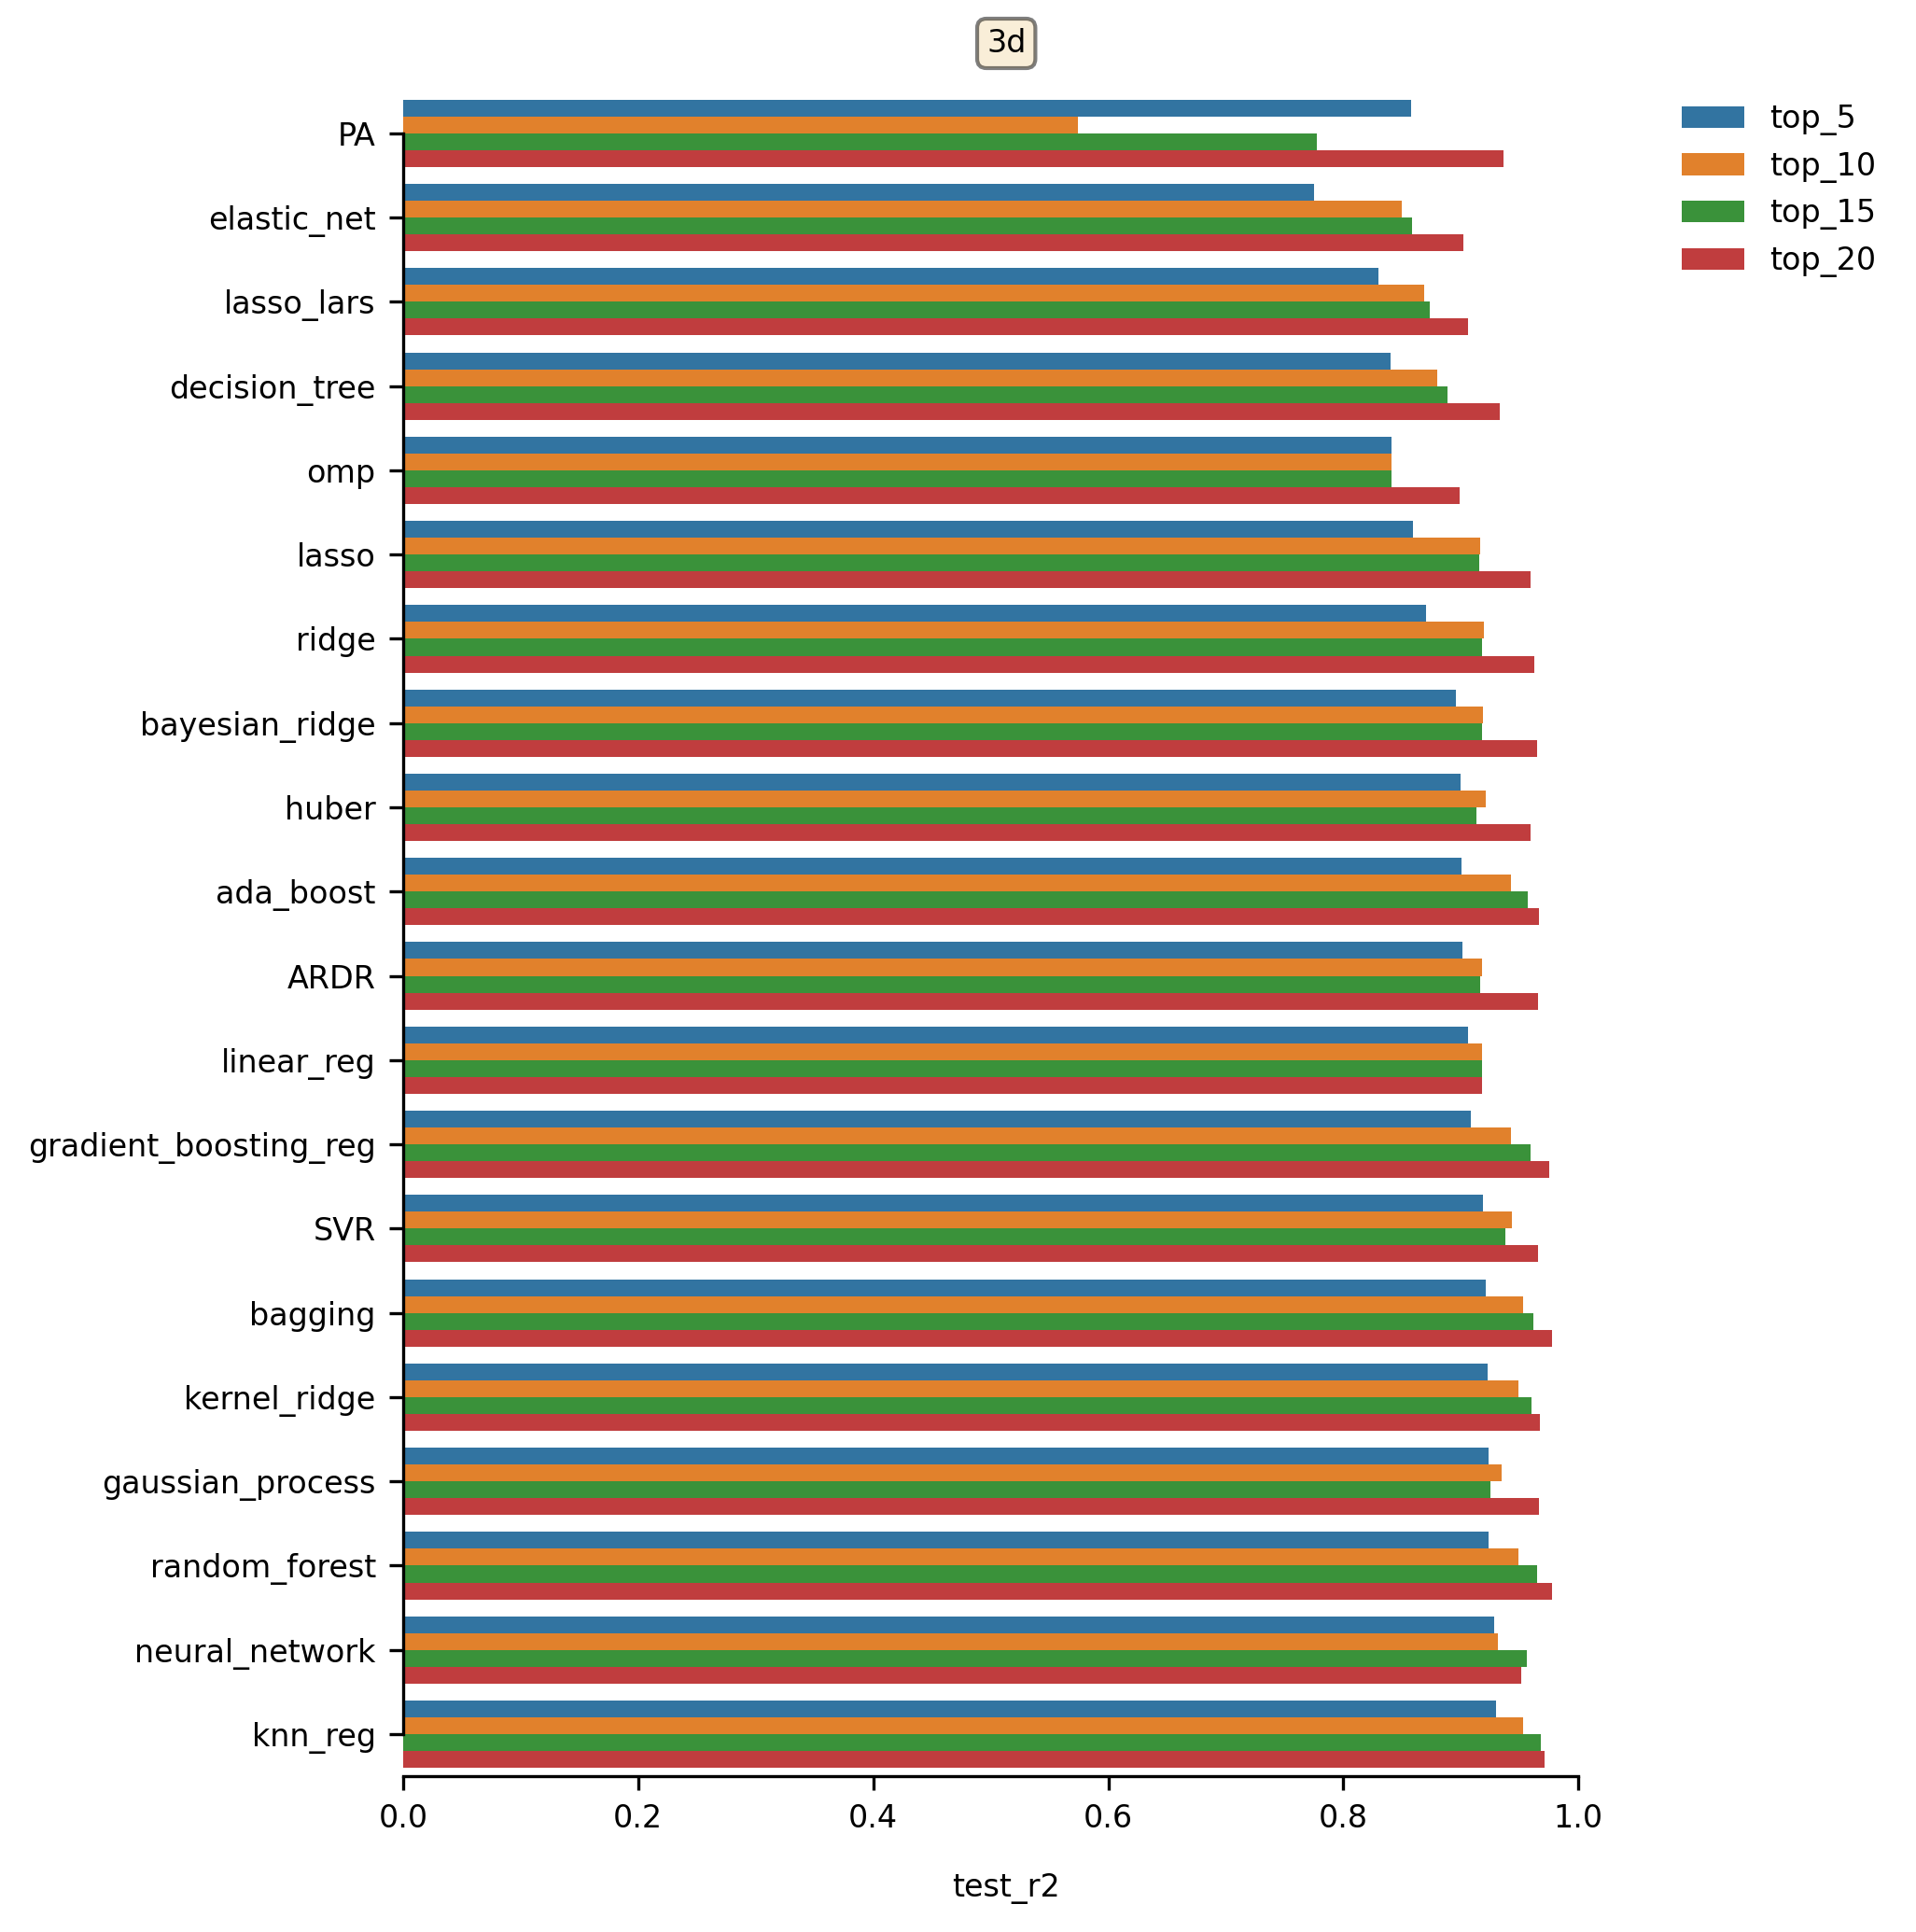

In [344]:
#SI
plt.figure(figsize=(7,7))
df=df.sort_values(by='test_r2')
sns.barplot(x='test_r2',y='model_name',data=df,hue='feat_set',hue_order=hue_order)
plt.title(feat_type,pad=10,bbox=bbox,color='black')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/top_5-20_features_vs_test_r2_{feat_type}.jpg')

In [347]:
# TOP_FEAT_MODEL_PERFORMANCE_DATA_DF_rdkit.pkl
feat_type='fp_deepchem'
file_name=f'TOP_5_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df1=getDataFromFile(file_name)
file_name=f'TOP_10_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df2=getDataFromFile(file_name)
file_name=f'TOP_15_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df3=getDataFromFile(file_name)
file_name=f'TOP_20_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df4=getDataFromFile(file_name)
df=pd.concat([df1,df2,df3,df4])
df['feat_set']=df['feat_set'].apply(lambda x:x.replace(f'_{feat_type}_rdkit',''))
df

File Found
File Found
File Found
File Found


feat_set             model_name  \
0     top_5             linear_reg   
1     top_5                  ridge   
2     top_5                  lasso   
3     top_5            elastic_net   
4     top_5             lasso_lars   
..      ...                    ...   
15   top_20          random_forest   
16   top_20              ada_boost   
17   top_20  gradient_boosting_reg   
18   top_20         neural_network   
19   top_20                knn_reg   

                                               gs_obj  \
0   GridSearchCV(cv=10, estimator=LinearRegression...   
1   GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...   
2   GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...   
3   GridSearchCV(cv=10, estimator=ElasticNet(), n_...   
4   GridSearchCV(cv=10, estimator=LassoLars(), n_j...   
..                                                ...   
15  GridSearchCV(cv=10, estimator=RandomForestRegr...   
16  GridSearchCV(cv=10, estimator=AdaBoostRegresso...   
17  GridSearchCV(cv=10, estimator=GradientBoosting...   
18  GridSearchCV(cv=10,\n             estimator=ML...   
19  GridSearchCV(cv=10, estimator=KNeighborsRegres...   

                                            opt_model  \
0                     LinearRegression(positive=True)   
1       Ridge(alpha=1.5, max_iter=1000, solver='sag')   
2   Lasso(alpha=0.01, max_iter=200, positive=True,...   
3   ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...   
4     LassoLars(alpha=0.01, jitter=0.1, max_iter=200)   
..                                                ...   
15  (DecisionTreeRegressor(max_features='auto', ra...   
16  (DecisionTreeRegressor(max_depth=3, random_sta...   
17  ([DecisionTreeRegressor(criterion='friedman_ms...   
18  MLPRegressor(activation='logistic', hidden_lay...   
19  KNeighborsRegressor(algorithm='kd_tree', leaf_...   

                                           opt_params  \
0   {'fit_intercept': True, 'normalize': False, 'p...   
1   {'alpha': 1.5, 'max_iter': 1000, 'solver': 'sa...   
2   {'alpha': 0.01, 'max_iter': 200, 'positive': T...   
3   {'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...   
4   {'alpha': 0.01, 'jitter': 0.1, 'max_iter': 200...   
..                                                ...   
15  {'bootstrap': True, 'n_estimators': 50, 'oob_s...   
16  {'learning_rate': 1, 'loss': 'linear', 'n_esti...   
17  {'max_depth': 2, 'n_estimators': 500, 'tol': 0...   
18  {'activation': 'logistic', 'early_stopping': F...   
19  {'algorithm': 'kd_tree', 'leaf_size': 40, 'n_n...   

                                         cv_score_obj  cv_mean_test_r2  \
0   {'fit_time': [0.004929780960083008, 0.00292587...         0.786209   
1   {'fit_time': [0.006262063980102539, 0.00311803...         0.786205   
2   {'fit_time': [0.004389524459838867, 0.00329780...         0.788085   
3   {'fit_time': [0.003231525421142578, 0.00319242...         0.550453   
4   {'fit_time': [0.004395484924316406, 0.00394654...         0.753976   
..                                                ...              ...   
15  {'fit_time': [0.06854462623596191, 0.106840372...         0.932993   
16  {'fit_time': [0.2433030605316162, 0.2967092990...         0.935196   
17  {'fit_time': [0.24287080764770508, 0.234565258...         0.955291   
18  {'fit_time': [0.22949600219726562, 0.215954542...         0.951677   
19  {'fit_time': [0.006735324859619141, 0.00617241...         0.941096   

    cv_mean_test_mse  cv_mean_test_mae  train_r2  train_mse  train_mae  \
0           0.092379          0.218438  0.826358   0.081366   0.208211   
1           0.094331          0.222697  0.831239   0.079078   0.209472   
2           0.093936          0.219555  0.825341   0.081842   0.209452   
3           0.204192          0.347118  0.586074   0.193958   0.338924   
4           0.111711          0.244229  0.791137   0.097869   0.232906   
..               ...               ...       ...        ...        ...   
15          0.035333          0.120800  0.983215   0.007865   0.069576   
16        

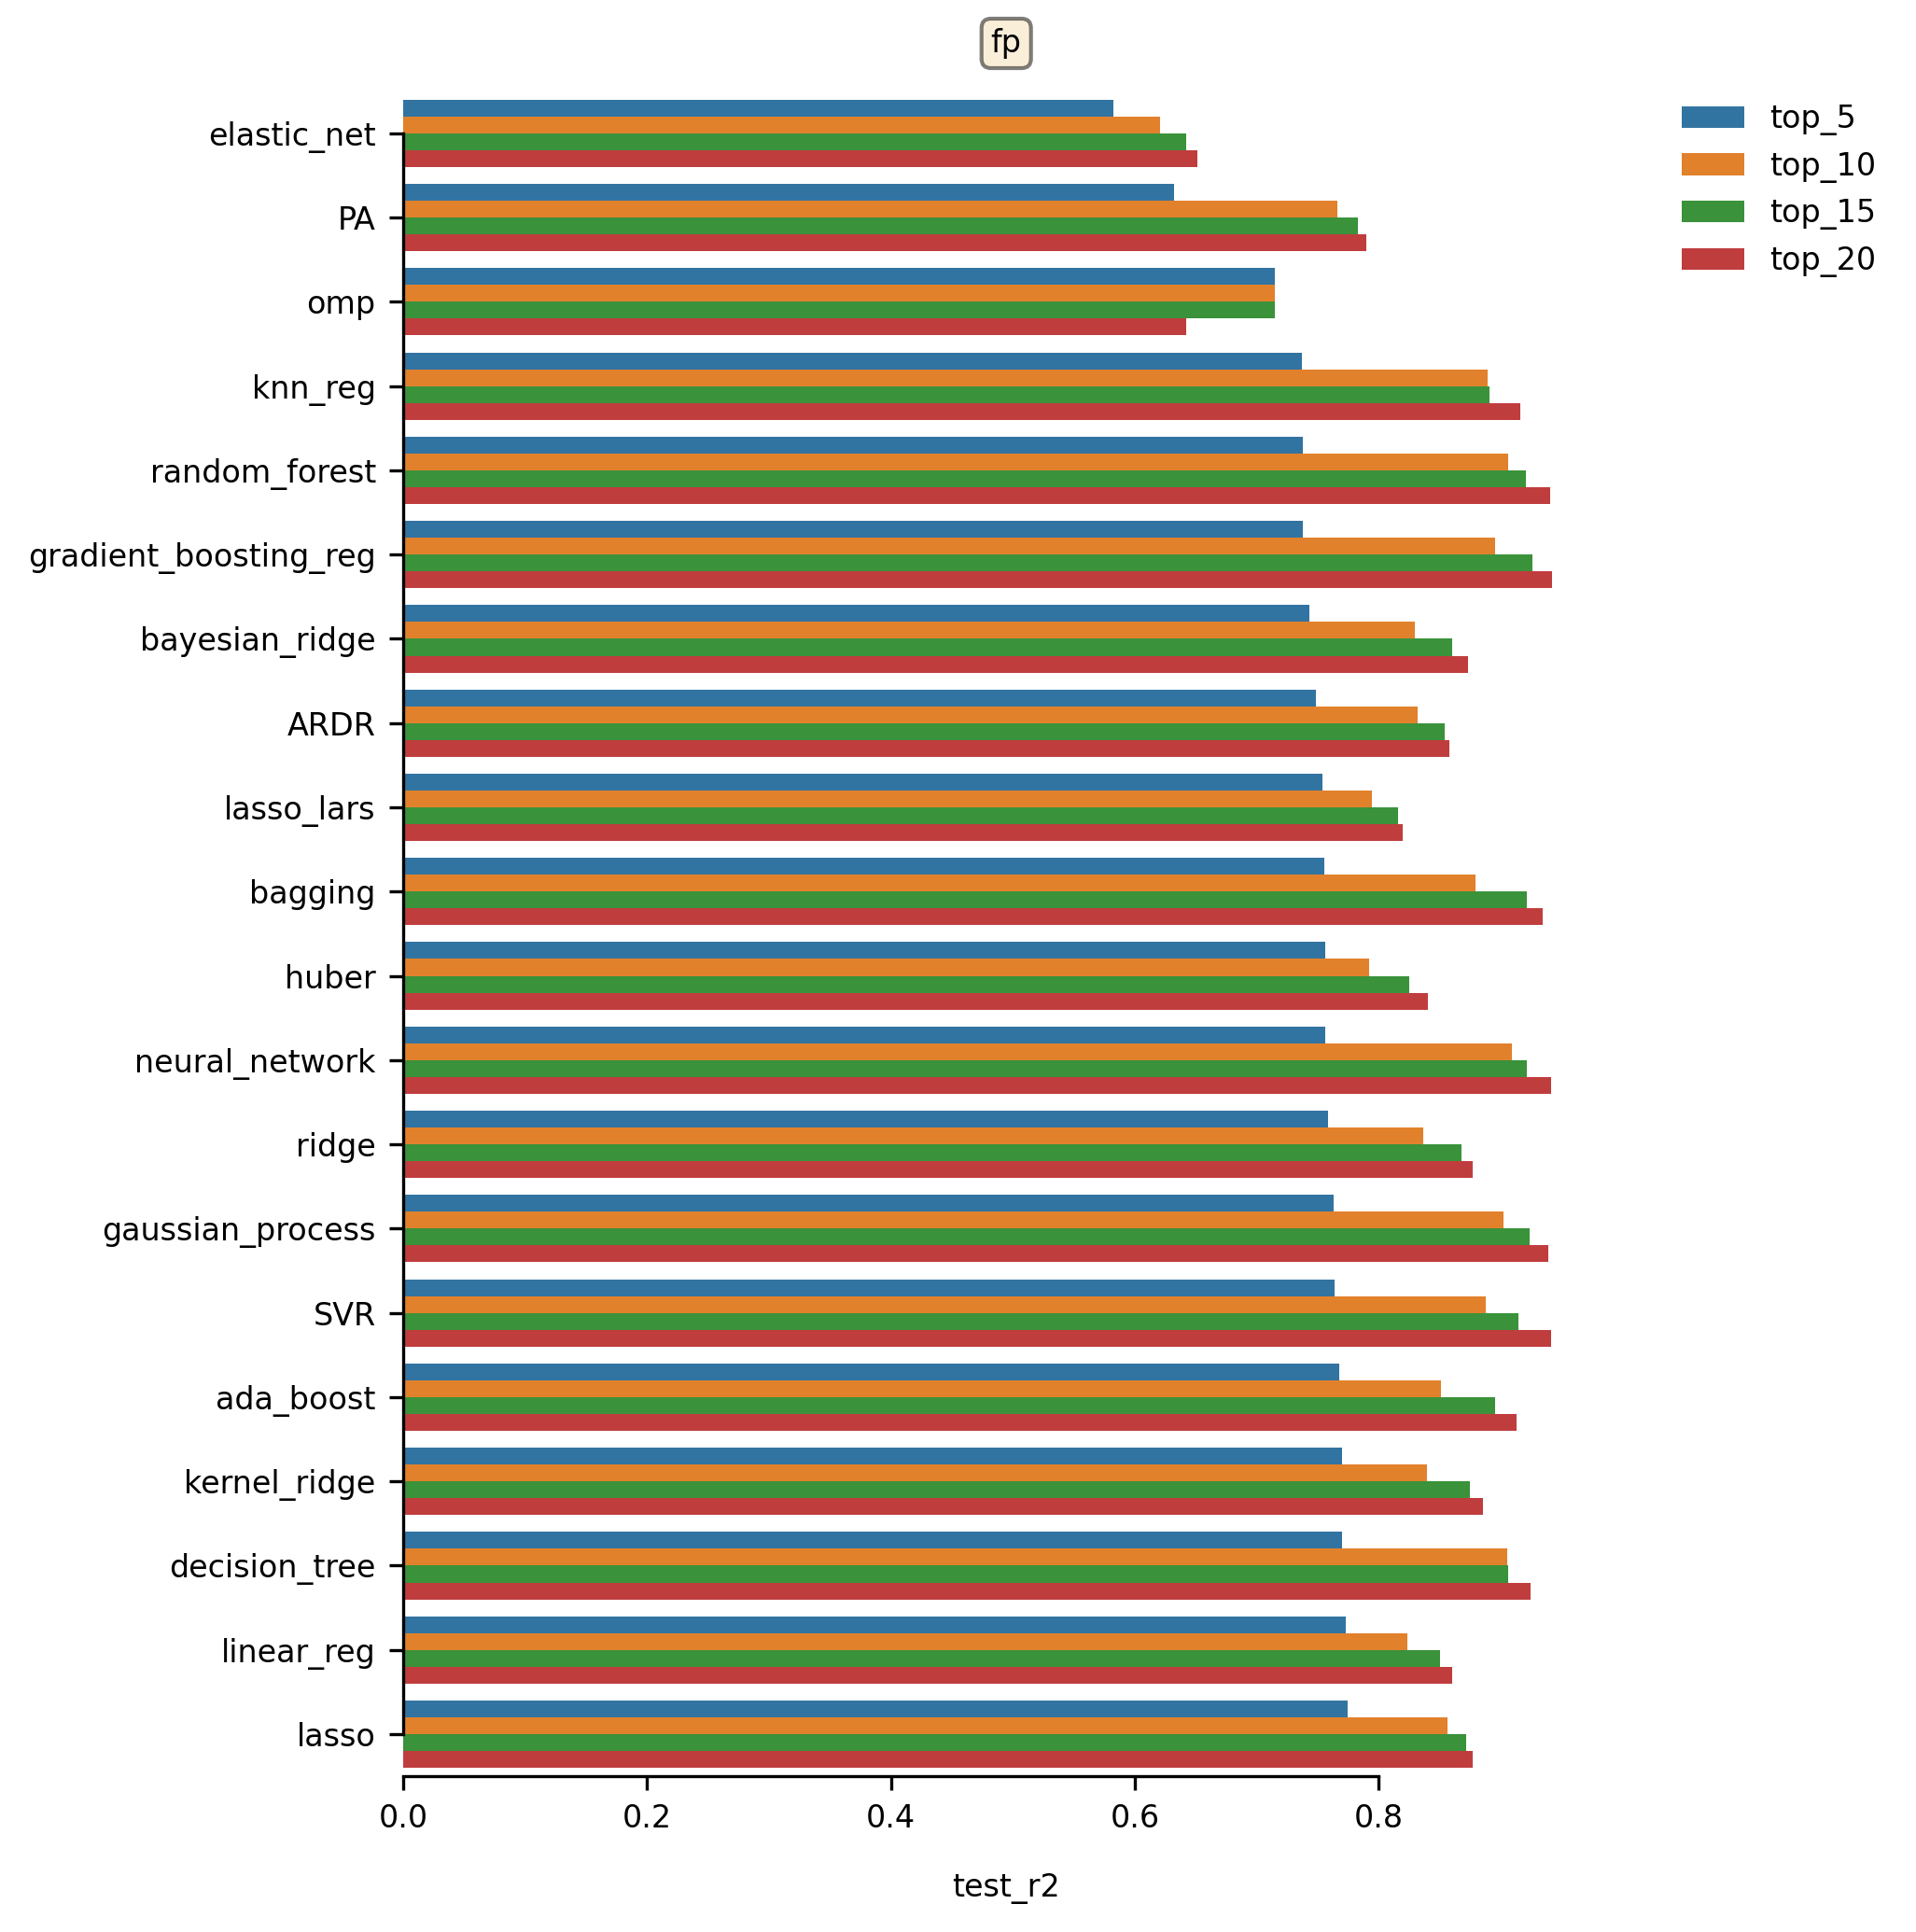

In [346]:
#SI
plt.figure(figsize=(7,7))
df=df.sort_values(by='test_r2')
sns.barplot(x='test_r2',y='model_name',data=df,hue='feat_set',hue_order=hue_order)
plt.title('fp',pad=10,bbox=bbox,color='black')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/top_5-20_features_vs_test_r2_fp.jpg')

### constant number of features

In [359]:
hue_order=['2d+3d+fp','2d','3d','fp']

In [358]:
# TOP_FEAT_MODEL_PERFORMANCE_DATA_DF_rdkit.pkl
num_feat=5
feat_type='2d+3d+fp'
file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df1=getDataFromFile(file_name)
feat_type='2d'
file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df2=getDataFromFile(file_name)
feat_type='3d'
file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df3=getDataFromFile(file_name)
feat_type='fp_deepchem'
file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df4=getDataFromFile(file_name)
df=pd.concat([df1,df2,df3,df4])
df['feat_set']=df['feat_set'].apply(lambda x:x.replace('_rdkit',''))
df['feat_set']=df['feat_set'].apply(lambda x:x.replace('top_5_',''))
df['feat_set']=df['feat_set'].apply(lambda x:x.replace('_deepchem',''))
df

File Found
File Found
File Found
File Found


feat_set             model_name  \
0   2d+3d+fp             linear_reg   
1   2d+3d+fp                  ridge   
2   2d+3d+fp                  lasso   
3   2d+3d+fp            elastic_net   
4   2d+3d+fp             lasso_lars   
..       ...                    ...   
15        fp          random_forest   
16        fp              ada_boost   
17        fp  gradient_boosting_reg   
18        fp         neural_network   
19        fp                knn_reg   

                                               gs_obj  \
0   GridSearchCV(cv=10, estimator=LinearRegression...   
1   GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...   
2   GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...   
3   GridSearchCV(cv=10, estimator=ElasticNet(), n_...   
4   GridSearchCV(cv=10, estimator=LassoLars(), n_j...   
..                                                ...   
15  GridSearchCV(cv=10, estimator=RandomForestRegr...   
16  GridSearchCV(cv=10, estimator=AdaBoostRegresso...   
17  GridSearchCV(cv=10, estimator=GradientBoosting...   
18  GridSearchCV(cv=10,\n             estimator=ML...   
19  GridSearchCV(cv=10, estimator=KNeighborsRegres...   

                                            opt_model  \
0                                  LinearRegression()   
1       Ridge(alpha=1.5, max_iter=500, solver='saga')   
2   Lasso(alpha=0.01, max_iter=100, positive=True,...   
3   ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...   
4   LassoLars(alpha=0.01, max_iter=100, positive=T...   
..                                                ...   
15  (DecisionTreeRegressor(max_features='auto', ra...   
16  (DecisionTreeRegressor(max_depth=3, random_sta...   
17  ([DecisionTreeRegressor(criterion='friedman_ms...   
18  MLPRegressor(activation='tanh', hidden_layer_s...   
19  KNeighborsRegressor(algorithm='brute', leaf_si...   

                                           opt_params  \
0   {'fit_intercept': True, 'normalize': False, 'p...   
1   {'alpha': 1.5, 'max_iter': 500, 'solver': 'sag...   
2   {'alpha': 0.01, 'max_iter': 100, 'positive': T...   
3   {'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...   
4   {'alpha': 0.01, 'jitter': None, 'max_iter': 10...   
..                                                ...   
15  {'bootstrap': True, 'n_estimators': 50, 'oob_s...   
16  {'learning_rate': 0.5, 'loss': 'linear', 'n_es...   
17  {'max_depth': 2, 'n_estimators': 500, 'tol': 0...   
18  {'activation': 'tanh', 'early_stopping': False...   
19  {'algorithm': 'brute', 'leaf_size': 40, 'n_nei...   

                                         cv_score_obj  cv_mean_test_r2  \
0   {'fit_time': [0.006017208099365234, 0.00429606...         0.868526   
1   {'fit_time': [0.0072209835052490234, 0.0081646...         0.841275   
2   {'fit_time': [0.006262063980102539, 0.00309872...         0.848108   
3   {'fit_time': [0.006130695343017578, 0.00455546...         0.745694   
4   {'fit_time': [0.00518488883972168, 0.006794452...         0.819051   
..                                                ...              ...   
15  {'fit_time': [0.12474870681762695, 0.082703113...         0.760189   
16  {'fit_time': [0.022870779037475586, 0.02253365...         0.769274   
17  {'fit_time': [0.14111995697021484, 0.139902114...         0.783220   
18  {'fit_time': [0.09633088111877441, 0.131463527...         0.770281   
19  {'fit_time': [0.006038188934326172, 0.00292491...         0.786369   

    cv_mean_test_mse  cv_mean_test_mae  train_r2  train_mse  train_mae  \
0           0.056363          0.173878  0.919340   0.037796   0.156828   
1           0.066330          0.195752  0.896807   0.048355   0.179494   
2           0.059650          0.191850  0.897014   0.048257   0.180195   
3           0.095085          0.255619  0.808396   0.089782   0.249853   
4           0.064690          0.208752  0.867870   0.061914   0.204116   
..               ...               ...       ...        ...        ...   
15          0.111438          0.237719  0.840077   0.074937   0.209340   

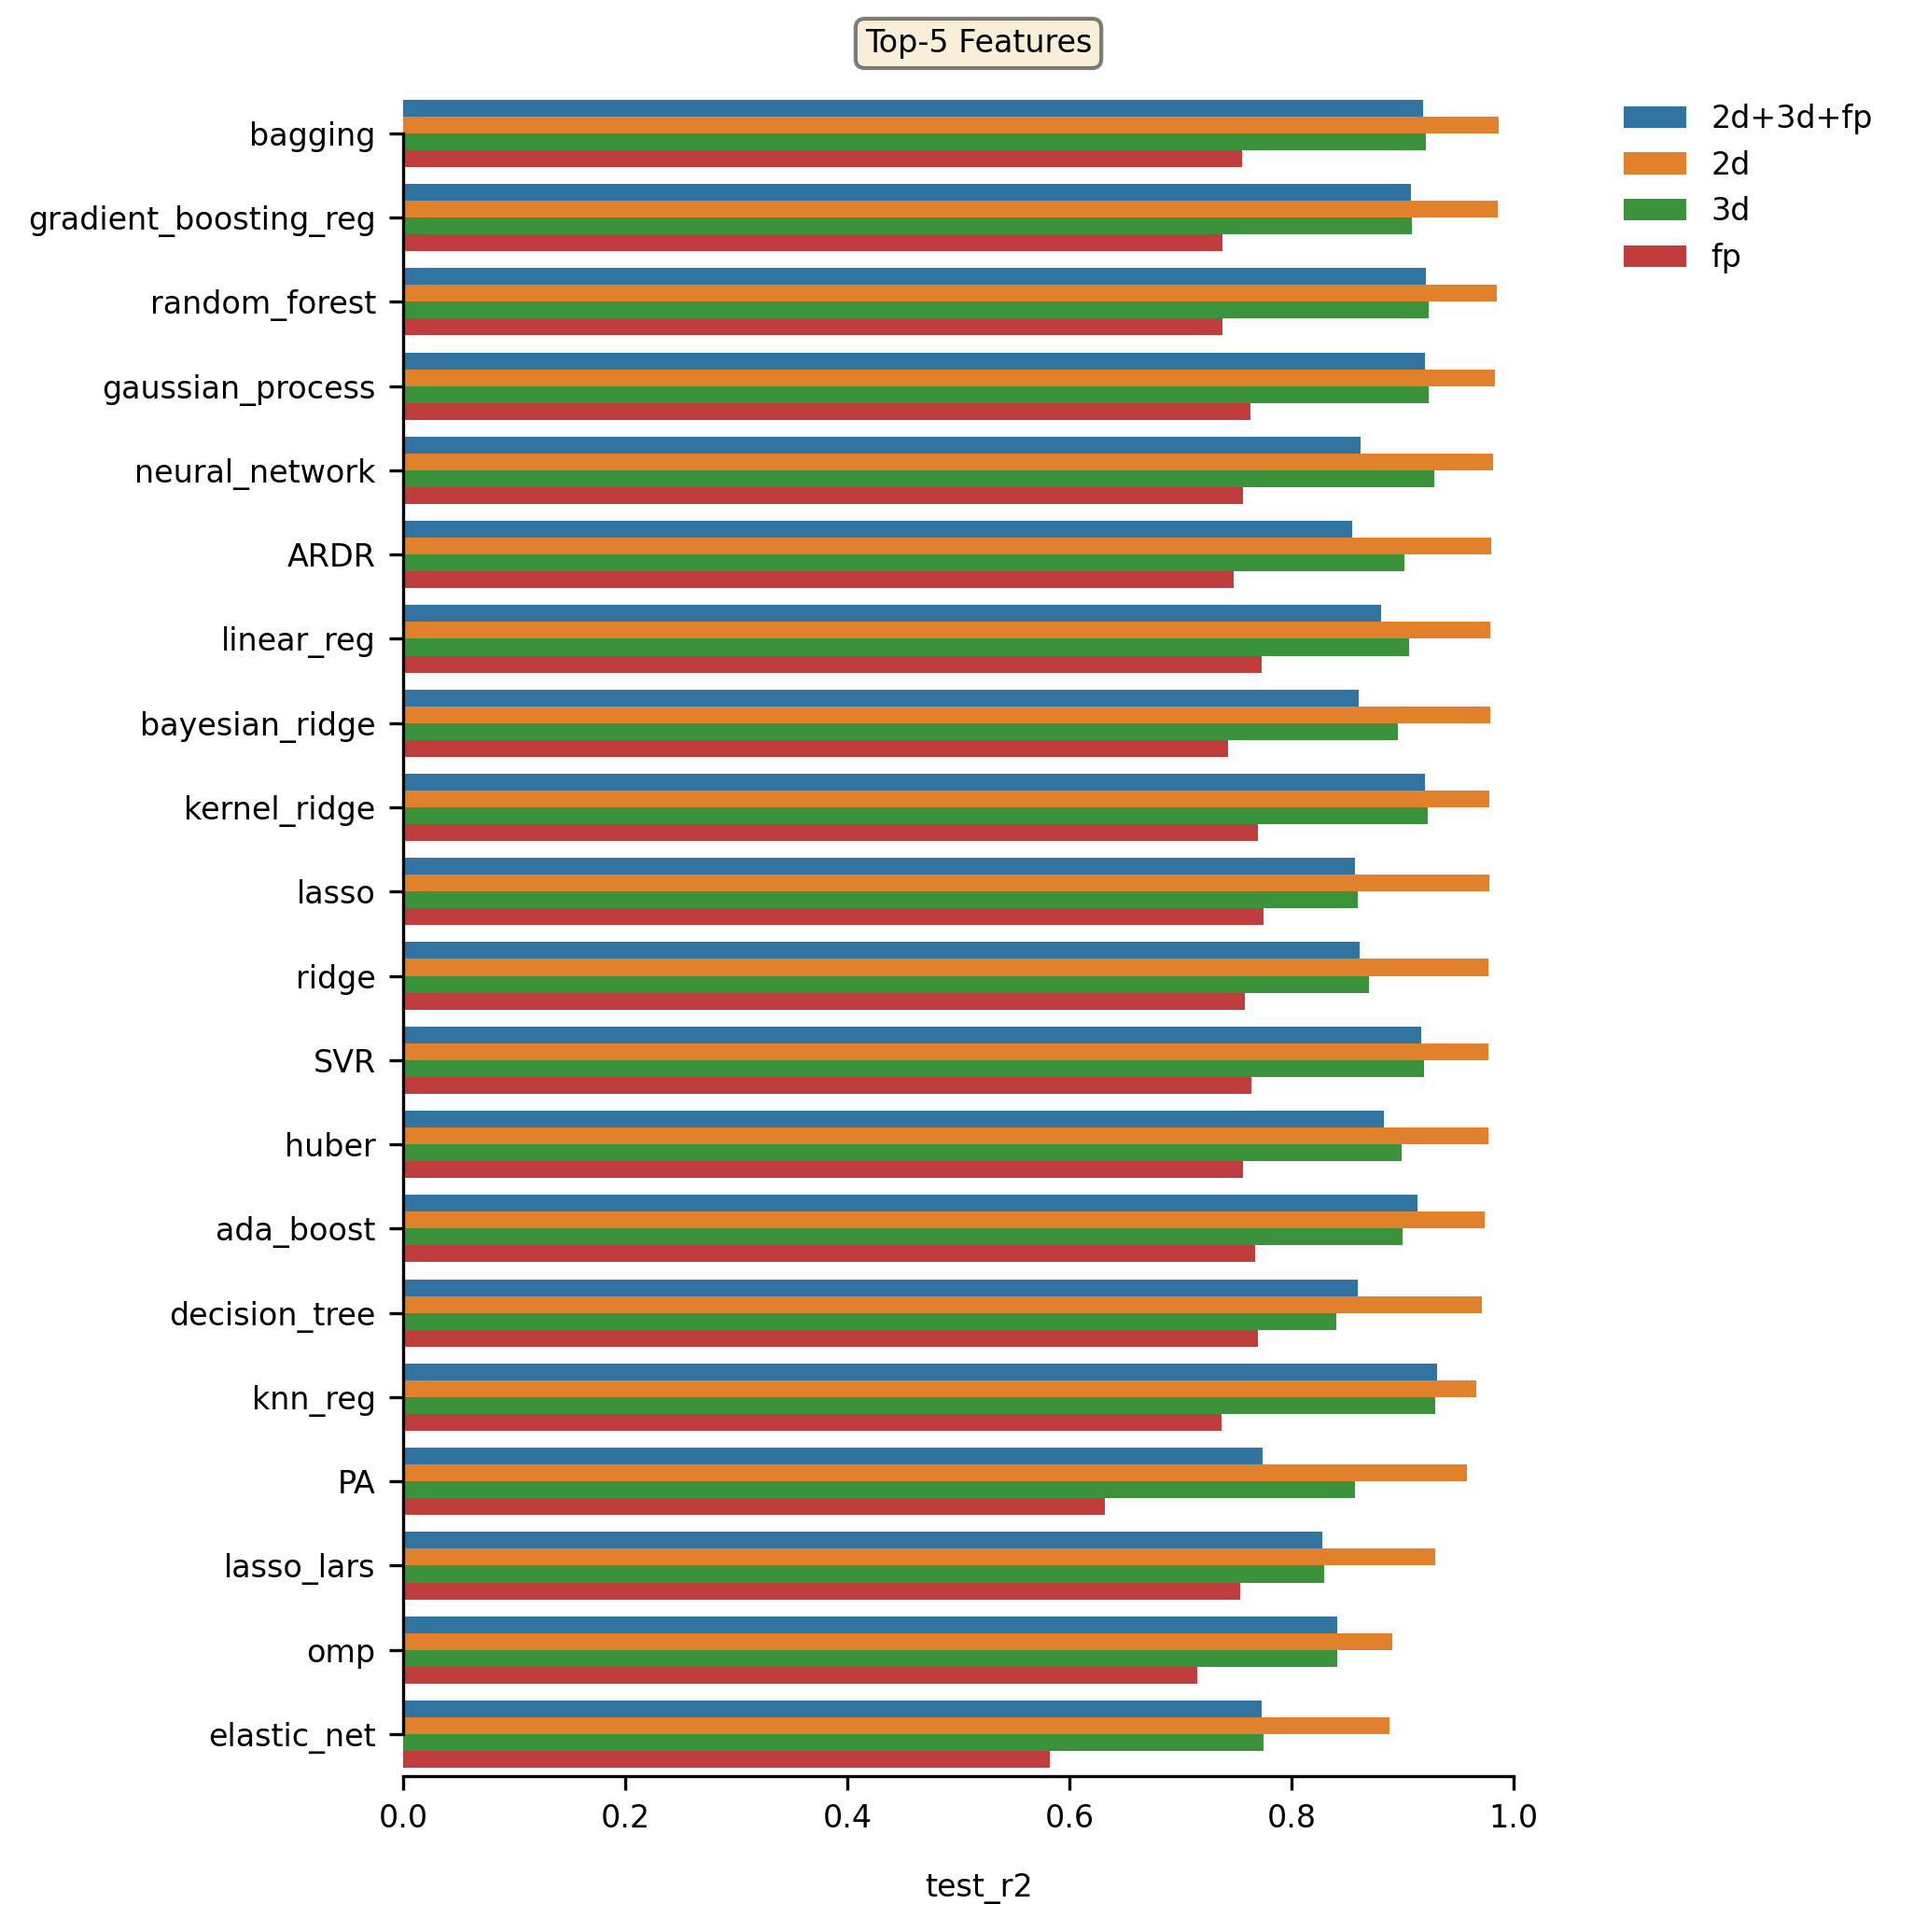

In [361]:
plt.figure(figsize=(7,7))
df=df.sort_values(by='test_r2',ascending=False)
sns.barplot(x='test_r2',y='model_name',data=df,hue='feat_set',hue_order=hue_order)
plt.title(f'Top-{num_feat} Features',pad=10,bbox=bbox,color='black')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/top_{num_feat}_features_vs_test_r2_{feat_type}.jpg')

In [365]:
# TOP_FEAT_MODEL_PERFORMANCE_DATA_DF_rdkit.pkl
num_feat=10
feat_type='2d+3d+fp'
file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df1=getDataFromFile(file_name)
feat_type='2d'
file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df2=getDataFromFile(file_name)
feat_type='3d'
file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df3=getDataFromFile(file_name)
feat_type='fp_deepchem'
file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df4=getDataFromFile(file_name)
df=pd.concat([df1,df2,df3,df4])
df['feat_set']=df['feat_set'].apply(lambda x:x.replace('_rdkit',''))
df['feat_set']=df['feat_set'].apply(lambda x:x.replace(f'top_{num_feat}_',''))
df['feat_set']=df['feat_set'].apply(lambda x:x.replace('_deepchem',''))
df

File Found
File Found
File Found
File Found


feat_set             model_name  \
0   2d+3d+fp             linear_reg   
1   2d+3d+fp                  ridge   
2   2d+3d+fp                  lasso   
3   2d+3d+fp            elastic_net   
4   2d+3d+fp             lasso_lars   
..       ...                    ...   
15        fp          random_forest   
16        fp              ada_boost   
17        fp  gradient_boosting_reg   
18        fp         neural_network   
19        fp                knn_reg   

                                               gs_obj  \
0   GridSearchCV(cv=10, estimator=LinearRegression...   
1   GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...   
2   GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...   
3   GridSearchCV(cv=10, estimator=ElasticNet(), n_...   
4   GridSearchCV(cv=10, estimator=LassoLars(), n_j...   
..                                                ...   
15  GridSearchCV(cv=10, estimator=RandomForestRegr...   
16  GridSearchCV(cv=10, estimator=AdaBoostRegresso...   
17  GridSearchCV(cv=10, estimator=GradientBoosting...   
18  GridSearchCV(cv=10,\n             estimator=ML...   
19  GridSearchCV(cv=10, estimator=KNeighborsRegres...   

                                            opt_model  \
0     LinearRegression(normalize=True, positive=True)   
1   Ridge(alpha=1.5, max_iter=500, solver='sparse_...   
2                     Lasso(alpha=0.01, max_iter=200)   
3   ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...   
4   LassoLars(alpha=0.01, max_iter=100, positive=T...   
..                                                ...   
15  (DecisionTreeRegressor(max_features='auto', ra...   
16  (DecisionTreeRegressor(max_depth=3, random_sta...   
17  ([DecisionTreeRegressor(criterion='friedman_ms...   
18  MLPRegressor(activation='logistic', early_stop...   
19  KNeighborsRegressor(algorithm='brute', leaf_si...   

                                           opt_params  \
0   {'fit_intercept': True, 'normalize': True, 'po...   
1   {'alpha': 1.5, 'max_iter': 500, 'solver': 'spa...   
2   {'alpha': 0.01, 'max_iter': 200, 'positive': F...   
3   {'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...   
4   {'alpha': 0.01, 'jitter': None, 'max_iter': 10...   
..                                                ...   
15  {'bootstrap': True, 'n_estimators': 500, 'oob_...   
16  {'learning_rate': 0.5, 'loss': 'square', 'n_es...   
17  {'max_depth': 2, 'n_estimators': 200, 'tol': 0...   
18  {'activation': 'logistic', 'early_stopping': T...   
19  {'algorithm': 'brute', 'leaf_size': 40, 'n_nei...   

                                         cv_score_obj  cv_mean_test_r2  \
0   {'fit_time': [0.002717256546020508, 0.00398421...         0.881162   
1   {'fit_time': [0.004535675048828125, 0.00345683...         0.882600   
2   {'fit_time': [0.002709627151489258, 0.00304365...         0.883216   
3   {'fit_time': [0.004845857620239258, 0.00474548...         0.825746   
4   {'fit_time': [0.006570577621459961, 0.00383710...         0.849378   
..                                                ...              ...   
15  {'fit_time': [0.9892973899841309, 1.0281896591...         0.873200   
16  {'fit_time': [0.07497191429138184, 0.067507505...         0.872531   
17  {'fit_time': [0.0845191478729248, 0.0759720802...         0.890200   
18  {'fit_time': [0.19716405868530273, 0.169819355...         0.885358   
19  {'fit_time': [0.005481243133544922, 0.00973367...         0.879694   

    cv_mean_test_mse  cv_mean_test_mae  train_r2  train_mse  train_mae  \
0           0.049120          0.169258  0.924129   0.035552   0.154079   
1           0.047119          0.167675  0.923667   0.035768   0.154110   
2           0.046806          0.168296  0.923859   0.035678   0.154858   
3           0.063271          0.214359  0.871741   0.060100   0.209154   
4           0.054209          0.194517  0.888698   0.052154   0.189859   
..               ...               ...       ...        ...        ...   
15          0.057385          0.170732  0.943614   0.026421   0.127826   

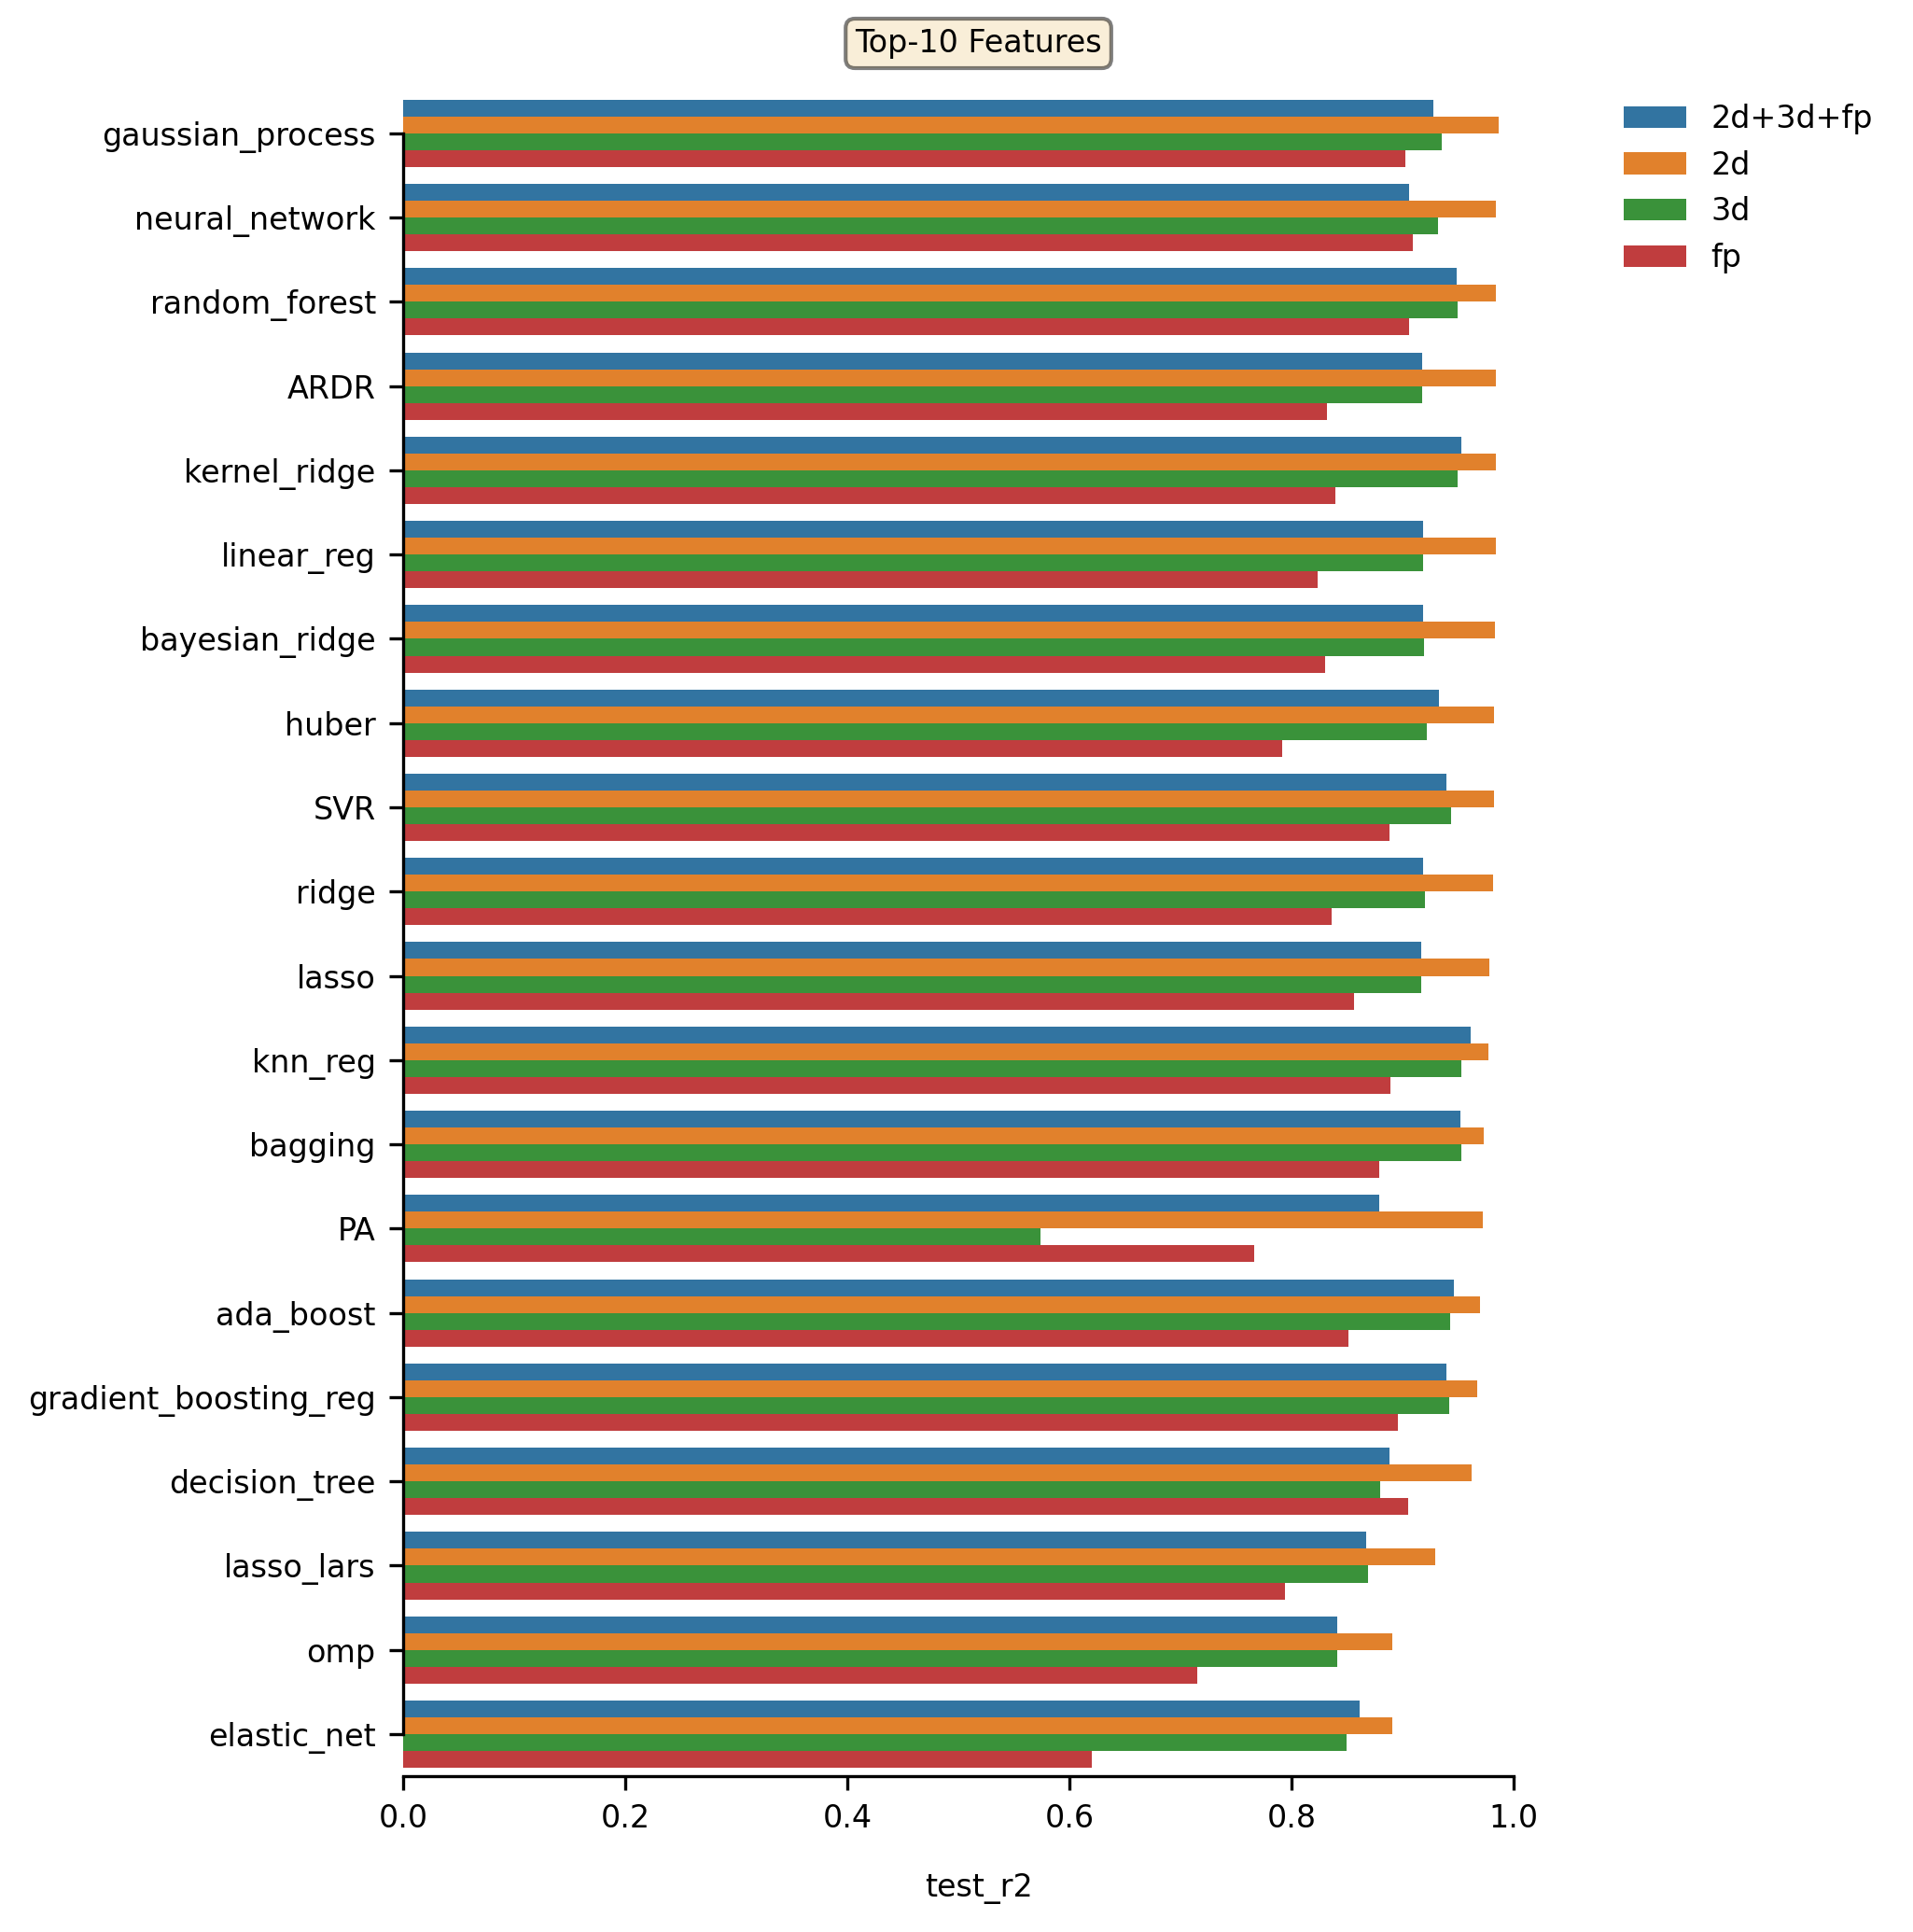

In [366]:
#SI
plt.figure(figsize=(7,7))
df=df.sort_values(by='test_r2',ascending=False)
sns.barplot(x='test_r2',y='model_name',data=df,hue='feat_set',hue_order=hue_order)
plt.title(f'Top-{num_feat} Features',pad=10,bbox=bbox,color='black')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/top_{num_feat}_features_vs_test_r2_{feat_type}.jpg')

In [367]:
# TOP_FEAT_MODEL_PERFORMANCE_DATA_DF_rdkit.pkl
num_feat=15
feat_type='2d+3d+fp'
file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df1=getDataFromFile(file_name)
feat_type='2d'
file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df2=getDataFromFile(file_name)
feat_type='3d'
file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df3=getDataFromFile(file_name)
feat_type='fp_deepchem'
file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df4=getDataFromFile(file_name)
df=pd.concat([df1,df2,df3,df4])
df['feat_set']=df['feat_set'].apply(lambda x:x.replace('_rdkit',''))
df['feat_set']=df['feat_set'].apply(lambda x:x.replace(f'top_{num_feat}_',''))
df['feat_set']=df['feat_set'].apply(lambda x:x.replace('_deepchem',''))
df

File Found
File Found
File Found
File Found


feat_set             model_name  \
0   2d+3d+fp             linear_reg   
1   2d+3d+fp                  ridge   
2   2d+3d+fp                  lasso   
3   2d+3d+fp            elastic_net   
4   2d+3d+fp             lasso_lars   
..       ...                    ...   
15        fp          random_forest   
16        fp              ada_boost   
17        fp  gradient_boosting_reg   
18        fp         neural_network   
19        fp                knn_reg   

                                               gs_obj  \
0   GridSearchCV(cv=10, estimator=LinearRegression...   
1   GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...   
2   GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...   
3   GridSearchCV(cv=10, estimator=ElasticNet(), n_...   
4   GridSearchCV(cv=10, estimator=LassoLars(), n_j...   
..                                                ...   
15  GridSearchCV(cv=10, estimator=RandomForestRegr...   
16  GridSearchCV(cv=10, estimator=AdaBoostRegresso...   
17  GridSearchCV(cv=10, estimator=GradientBoosting...   
18  GridSearchCV(cv=10,\n             estimator=ML...   
19  GridSearchCV(cv=10, estimator=KNeighborsRegres...   

                                            opt_model  \
0                    LinearRegression(normalize=True)   
1       Ridge(alpha=0.5, max_iter=500, solver='saga')   
2                     Lasso(alpha=0.01, max_iter=100)   
3   ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...   
4                 LassoLars(alpha=0.01, max_iter=100)   
..                                                ...   
15  (DecisionTreeRegressor(max_features='auto', ra...   
16  (DecisionTreeRegressor(max_depth=3, random_sta...   
17  ([DecisionTreeRegressor(criterion='friedman_ms...   
18  MLPRegressor(activation='logistic', hidden_lay...   
19  KNeighborsRegressor(leaf_size=40, n_neighbors=...   

                                           opt_params  \
0   {'fit_intercept': True, 'normalize': True, 'po...   
1   {'alpha': 0.5, 'max_iter': 500, 'solver': 'sag...   
2   {'alpha': 0.01, 'max_iter': 100, 'positive': F...   
3   {'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...   
4   {'alpha': 0.01, 'jitter': None, 'max_iter': 10...   
..                                                ...   
15  {'bootstrap': True, 'n_estimators': 100, 'oob_...   
16  {'learning_rate': 1.5, 'loss': 'linear', 'n_es...   
17  {'max_depth': 2, 'n_estimators': 250, 'tol': 0...   
18  {'activation': 'logistic', 'early_stopping': F...   
19  {'algorithm': 'auto', 'leaf_size': 40, 'n_neig...   

                                         cv_score_obj  cv_mean_test_r2  \
0   {'fit_time': [0.006614208221435547, 0.00507831...         0.957786   
1   {'fit_time': [0.01581287384033203, 0.011845588...         0.972375   
2   {'fit_time': [0.0067768096923828125, 0.0072245...         0.970352   
3   {'fit_time': [0.00689244270324707, 0.005229234...         0.895250   
4   {'fit_time': [0.0036695003509521484, 0.0047173...         0.927525   
..                                                ...              ...   
15  {'fit_time': [0.1955859661102295, 0.1547789573...         0.912033   
16  {'fit_time': [0.1201319694519043, 0.0715060234...         0.920565   
17  {'fit_time': [0.09067797660827637, 0.100502729...         0.940109   
18  {'fit_time': [0.8456456661224365, 0.8609685897...         0.942992   
19  {'fit_time': [0.00480961799621582, 0.006374120...         0.921524   

    cv_mean_test_mse  cv_mean_test_mae  train_r2  train_mse  train_mae  \
0           0.015924          0.083809  0.986586   0.006286   0.063608   
1           0.011683          0.081628  0.980131   0.009310   0.074954   
2           0.012421          0.084460  0.977661   0.010468   0.078485   
3           0.039175          0.175602  0.921879   0.036606   0.170171   
4           0.027349          0.144885  0.940629   0.027820   0.147983   
..               ...               ...       ...        ...        ...   
15          0.042857          0.141191  0.971707   0.013257   0.090181   

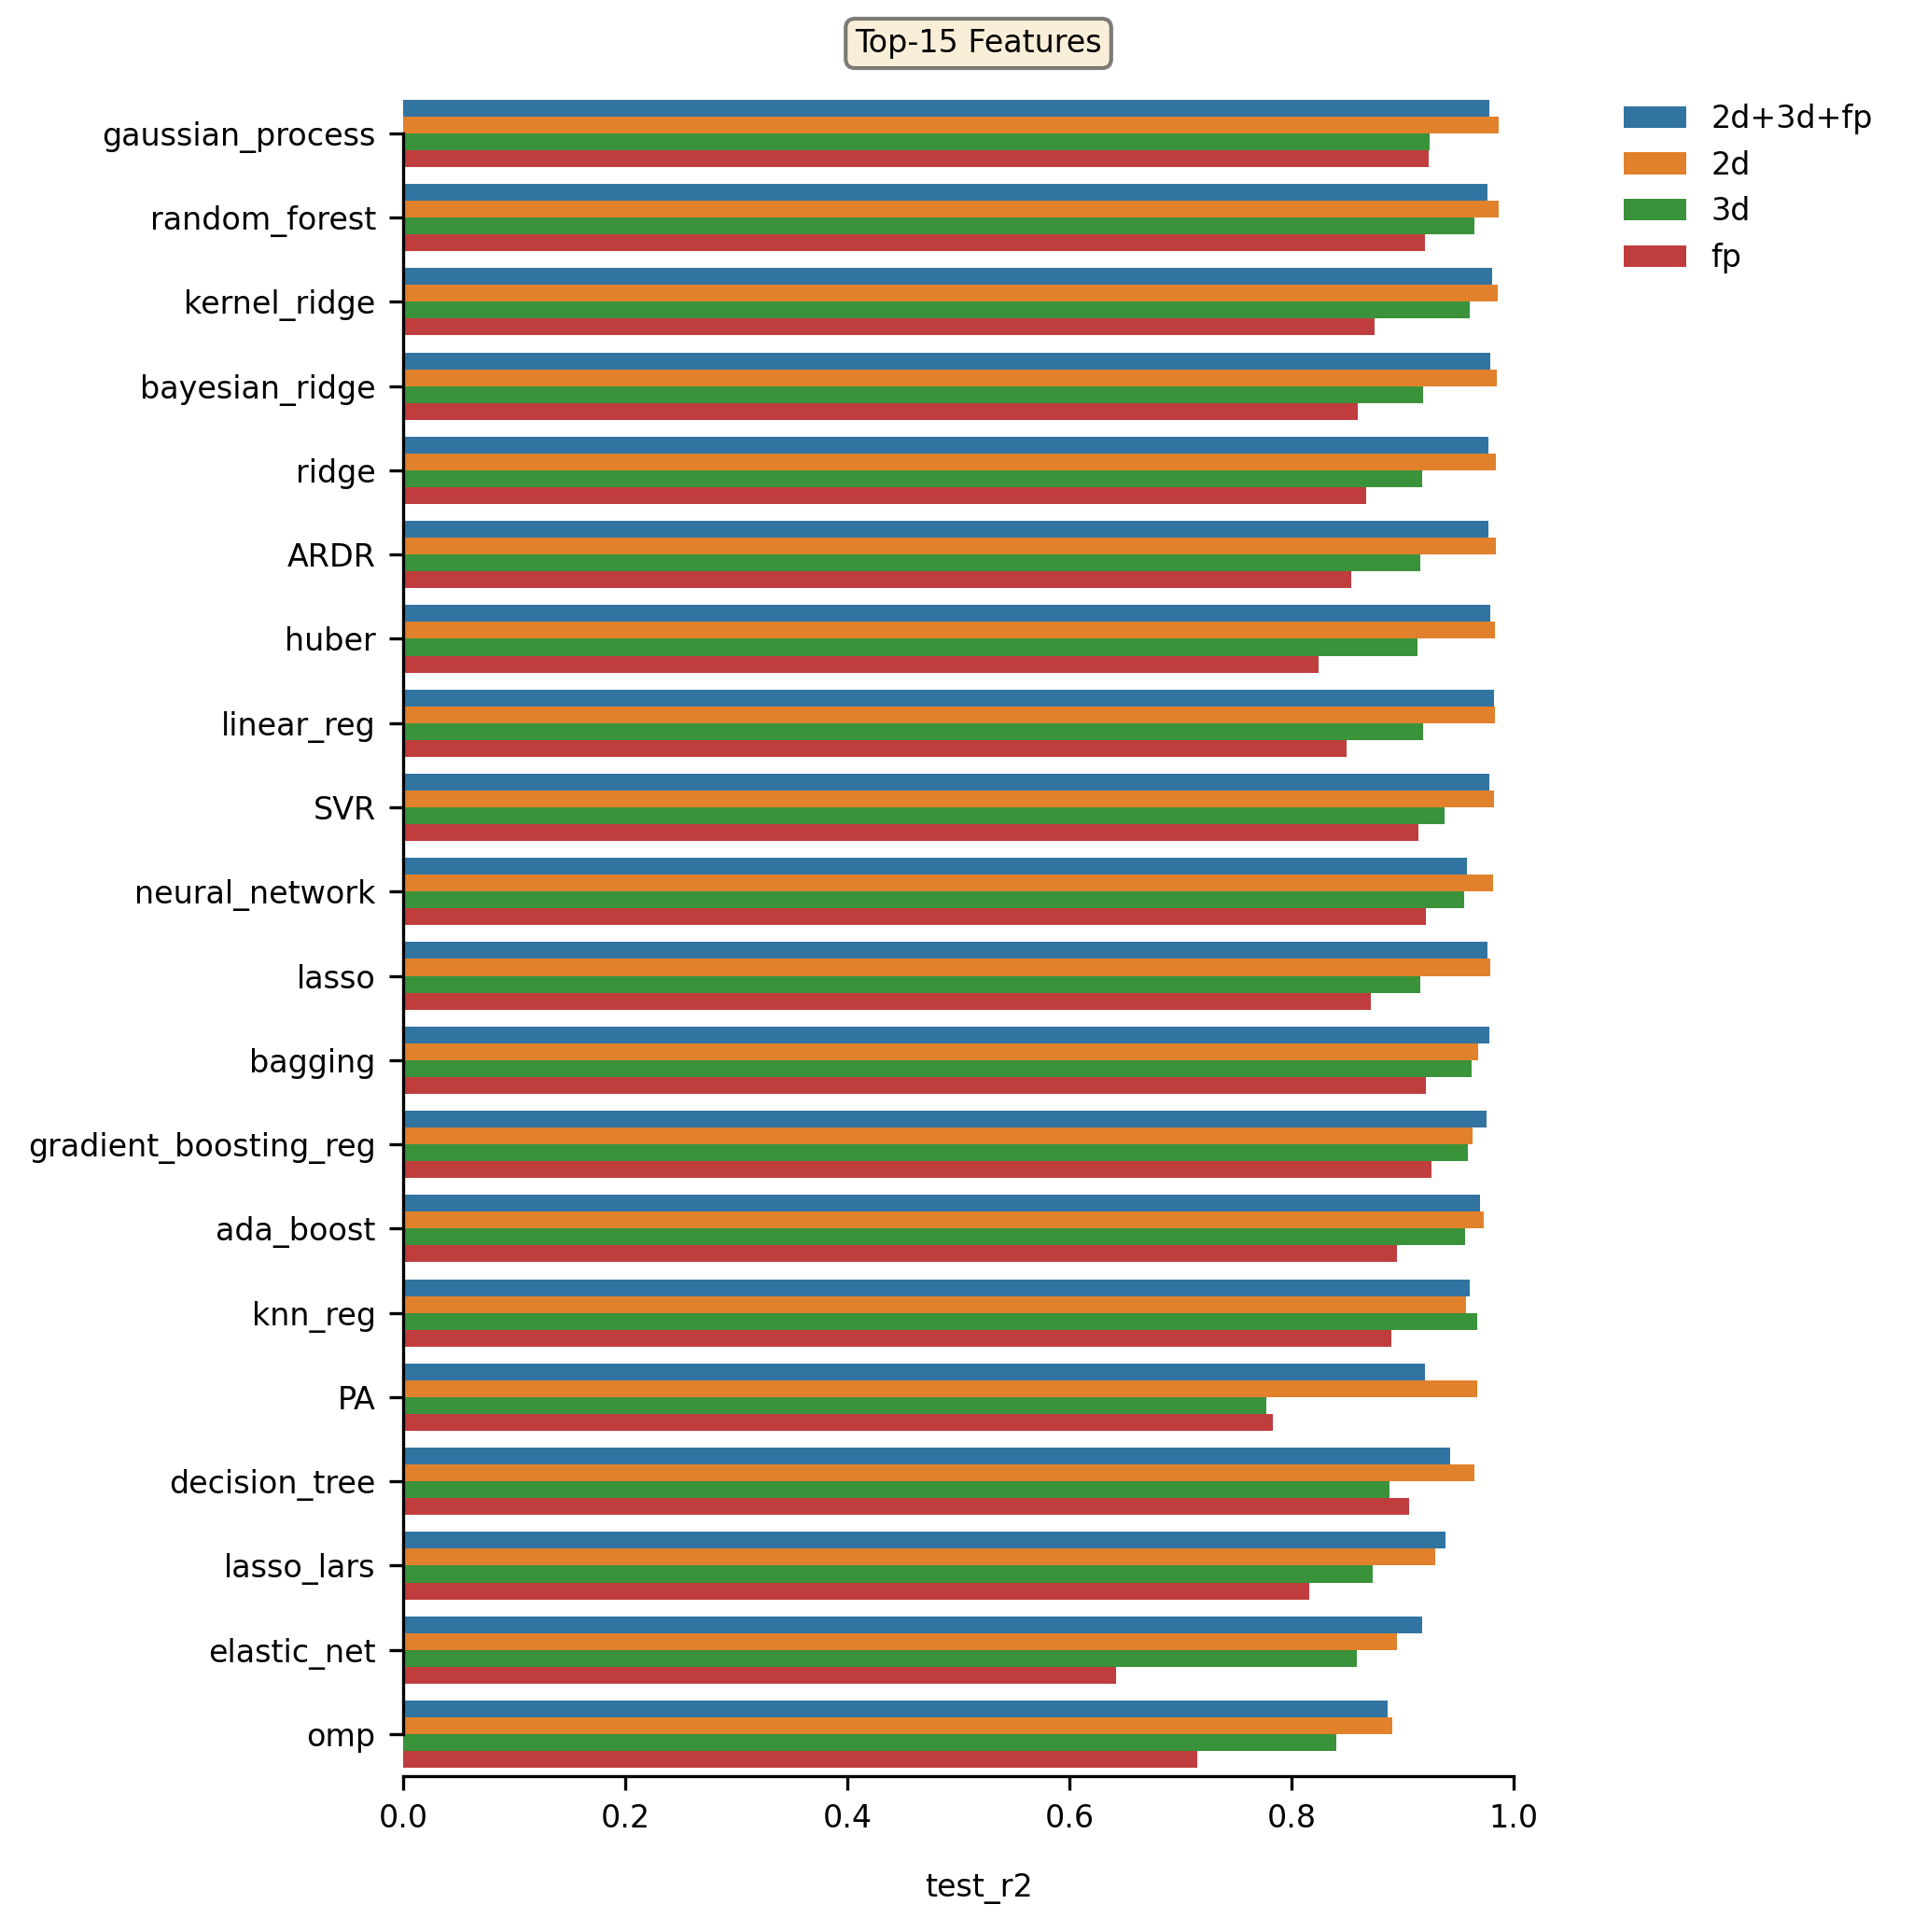

In [368]:
#SI
plt.figure(figsize=(7,7))
df=df.sort_values(by='test_r2',ascending=False)
sns.barplot(x='test_r2',y='model_name',data=df,hue='feat_set',hue_order=hue_order)
plt.title(f'Top-{num_feat} Features',pad=10,bbox=bbox,color='black')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/top_{num_feat}_features_vs_test_r2_{feat_type}.jpg')

In [369]:
# TOP_FEAT_MODEL_PERFORMANCE_DATA_DF_rdkit.pkl
num_feat=20
feat_type='2d+3d+fp'
file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df1=getDataFromFile(file_name)
feat_type='2d'
file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df2=getDataFromFile(file_name)
feat_type='3d'
file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df3=getDataFromFile(file_name)
feat_type='fp_deepchem'
file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df4=getDataFromFile(file_name)
df=pd.concat([df1,df2,df3,df4])
df['feat_set']=df['feat_set'].apply(lambda x:x.replace('_rdkit',''))
df['feat_set']=df['feat_set'].apply(lambda x:x.replace(f'top_{num_feat}_',''))
df['feat_set']=df['feat_set'].apply(lambda x:x.replace('_deepchem',''))
df

File Found
File Found
File Found
File Found


feat_set             model_name  \
0   2d+3d+fp             linear_reg   
1   2d+3d+fp                  ridge   
2   2d+3d+fp                  lasso   
3   2d+3d+fp            elastic_net   
4   2d+3d+fp             lasso_lars   
..       ...                    ...   
15        fp          random_forest   
16        fp              ada_boost   
17        fp  gradient_boosting_reg   
18        fp         neural_network   
19        fp                knn_reg   

                                               gs_obj  \
0   GridSearchCV(cv=10, estimator=LinearRegression...   
1   GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...   
2   GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...   
3   GridSearchCV(cv=10, estimator=ElasticNet(), n_...   
4   GridSearchCV(cv=10, estimator=LassoLars(), n_j...   
..                                                ...   
15  GridSearchCV(cv=10, estimator=RandomForestRegr...   
16  GridSearchCV(cv=10, estimator=AdaBoostRegresso...   
17  GridSearchCV(cv=10, estimator=GradientBoosting...   
18  GridSearchCV(cv=10,\n             estimator=ML...   
19  GridSearchCV(cv=10, estimator=KNeighborsRegres...   

                                            opt_model  \
0                                  LinearRegression()   
1        Ridge(alpha=1, max_iter=5000, solver='saga')   
2                     Lasso(alpha=0.01, max_iter=100)   
3   ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...   
4                 LassoLars(alpha=0.01, max_iter=100)   
..                                                ...   
15  (DecisionTreeRegressor(max_features='auto', ra...   
16  (DecisionTreeRegressor(max_depth=3, random_sta...   
17  ([DecisionTreeRegressor(criterion='friedman_ms...   
18  MLPRegressor(activation='logistic', hidden_lay...   
19  KNeighborsRegressor(algorithm='kd_tree', leaf_...   

                                           opt_params  \
0   {'fit_intercept': True, 'normalize': False, 'p...   
1   {'alpha': 1, 'max_iter': 5000, 'solver': 'saga...   
2   {'alpha': 0.01, 'max_iter': 100, 'positive': F...   
3   {'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...   
4   {'alpha': 0.01, 'jitter': None, 'max_iter': 10...   
..                                                ...   
15  {'bootstrap': True, 'n_estimators': 50, 'oob_s...   
16  {'learning_rate': 1, 'loss': 'linear', 'n_esti...   
17  {'max_depth': 2, 'n_estimators': 500, 'tol': 0...   
18  {'activation': 'logistic', 'early_stopping': F...   
19  {'algorithm': 'kd_tree', 'leaf_size': 40, 'n_n...   

                                         cv_score_obj  cv_mean_test_r2  \
0   {'fit_time': [0.004843711853027344, 0.00538277...         0.972630   
1   {'fit_time': [0.013641357421875, 0.02038955688...         0.971983   
2   {'fit_time': [0.00530242919921875, 0.005627155...         0.970597   
3   {'fit_time': [0.004781961441040039, 0.00425076...         0.899043   
4   {'fit_time': [0.008524894714355469, 0.00548720...         0.926946   
..                                                ...              ...   
15  {'fit_time': [0.06854462623596191, 0.106840372...         0.932993   
16  {'fit_time': [0.2433030605316162, 0.2967092990...         0.935196   
17  {'fit_time': [0.24287080764770508, 0.234565258...         0.955291   
18  {'fit_time': [0.22949600219726562, 0.215954542...         0.951677   
19  {'fit_time': [0.006735324859619141, 0.00617241...         0.941096   

    cv_mean_test_mse  cv_mean_test_mae  train_r2  train_mse  train_mae  \
0           0.009269          0.066530  0.991810   0.003838   0.047590   
1           0.011007          0.080758  0.981101   0.008856   0.073892   
2           0.011751          0.083006  0.979229   0.009733   0.075962   
3           0.037270          0.169692  0.926254   0.034556   0.163423   
4           0.027453          0.145111  0.940704   0.027785   0.147813   
..               ...               ...       ...        ...        ...   
15          0.035333          0.120800  0.983215   0.007865   0.069576   

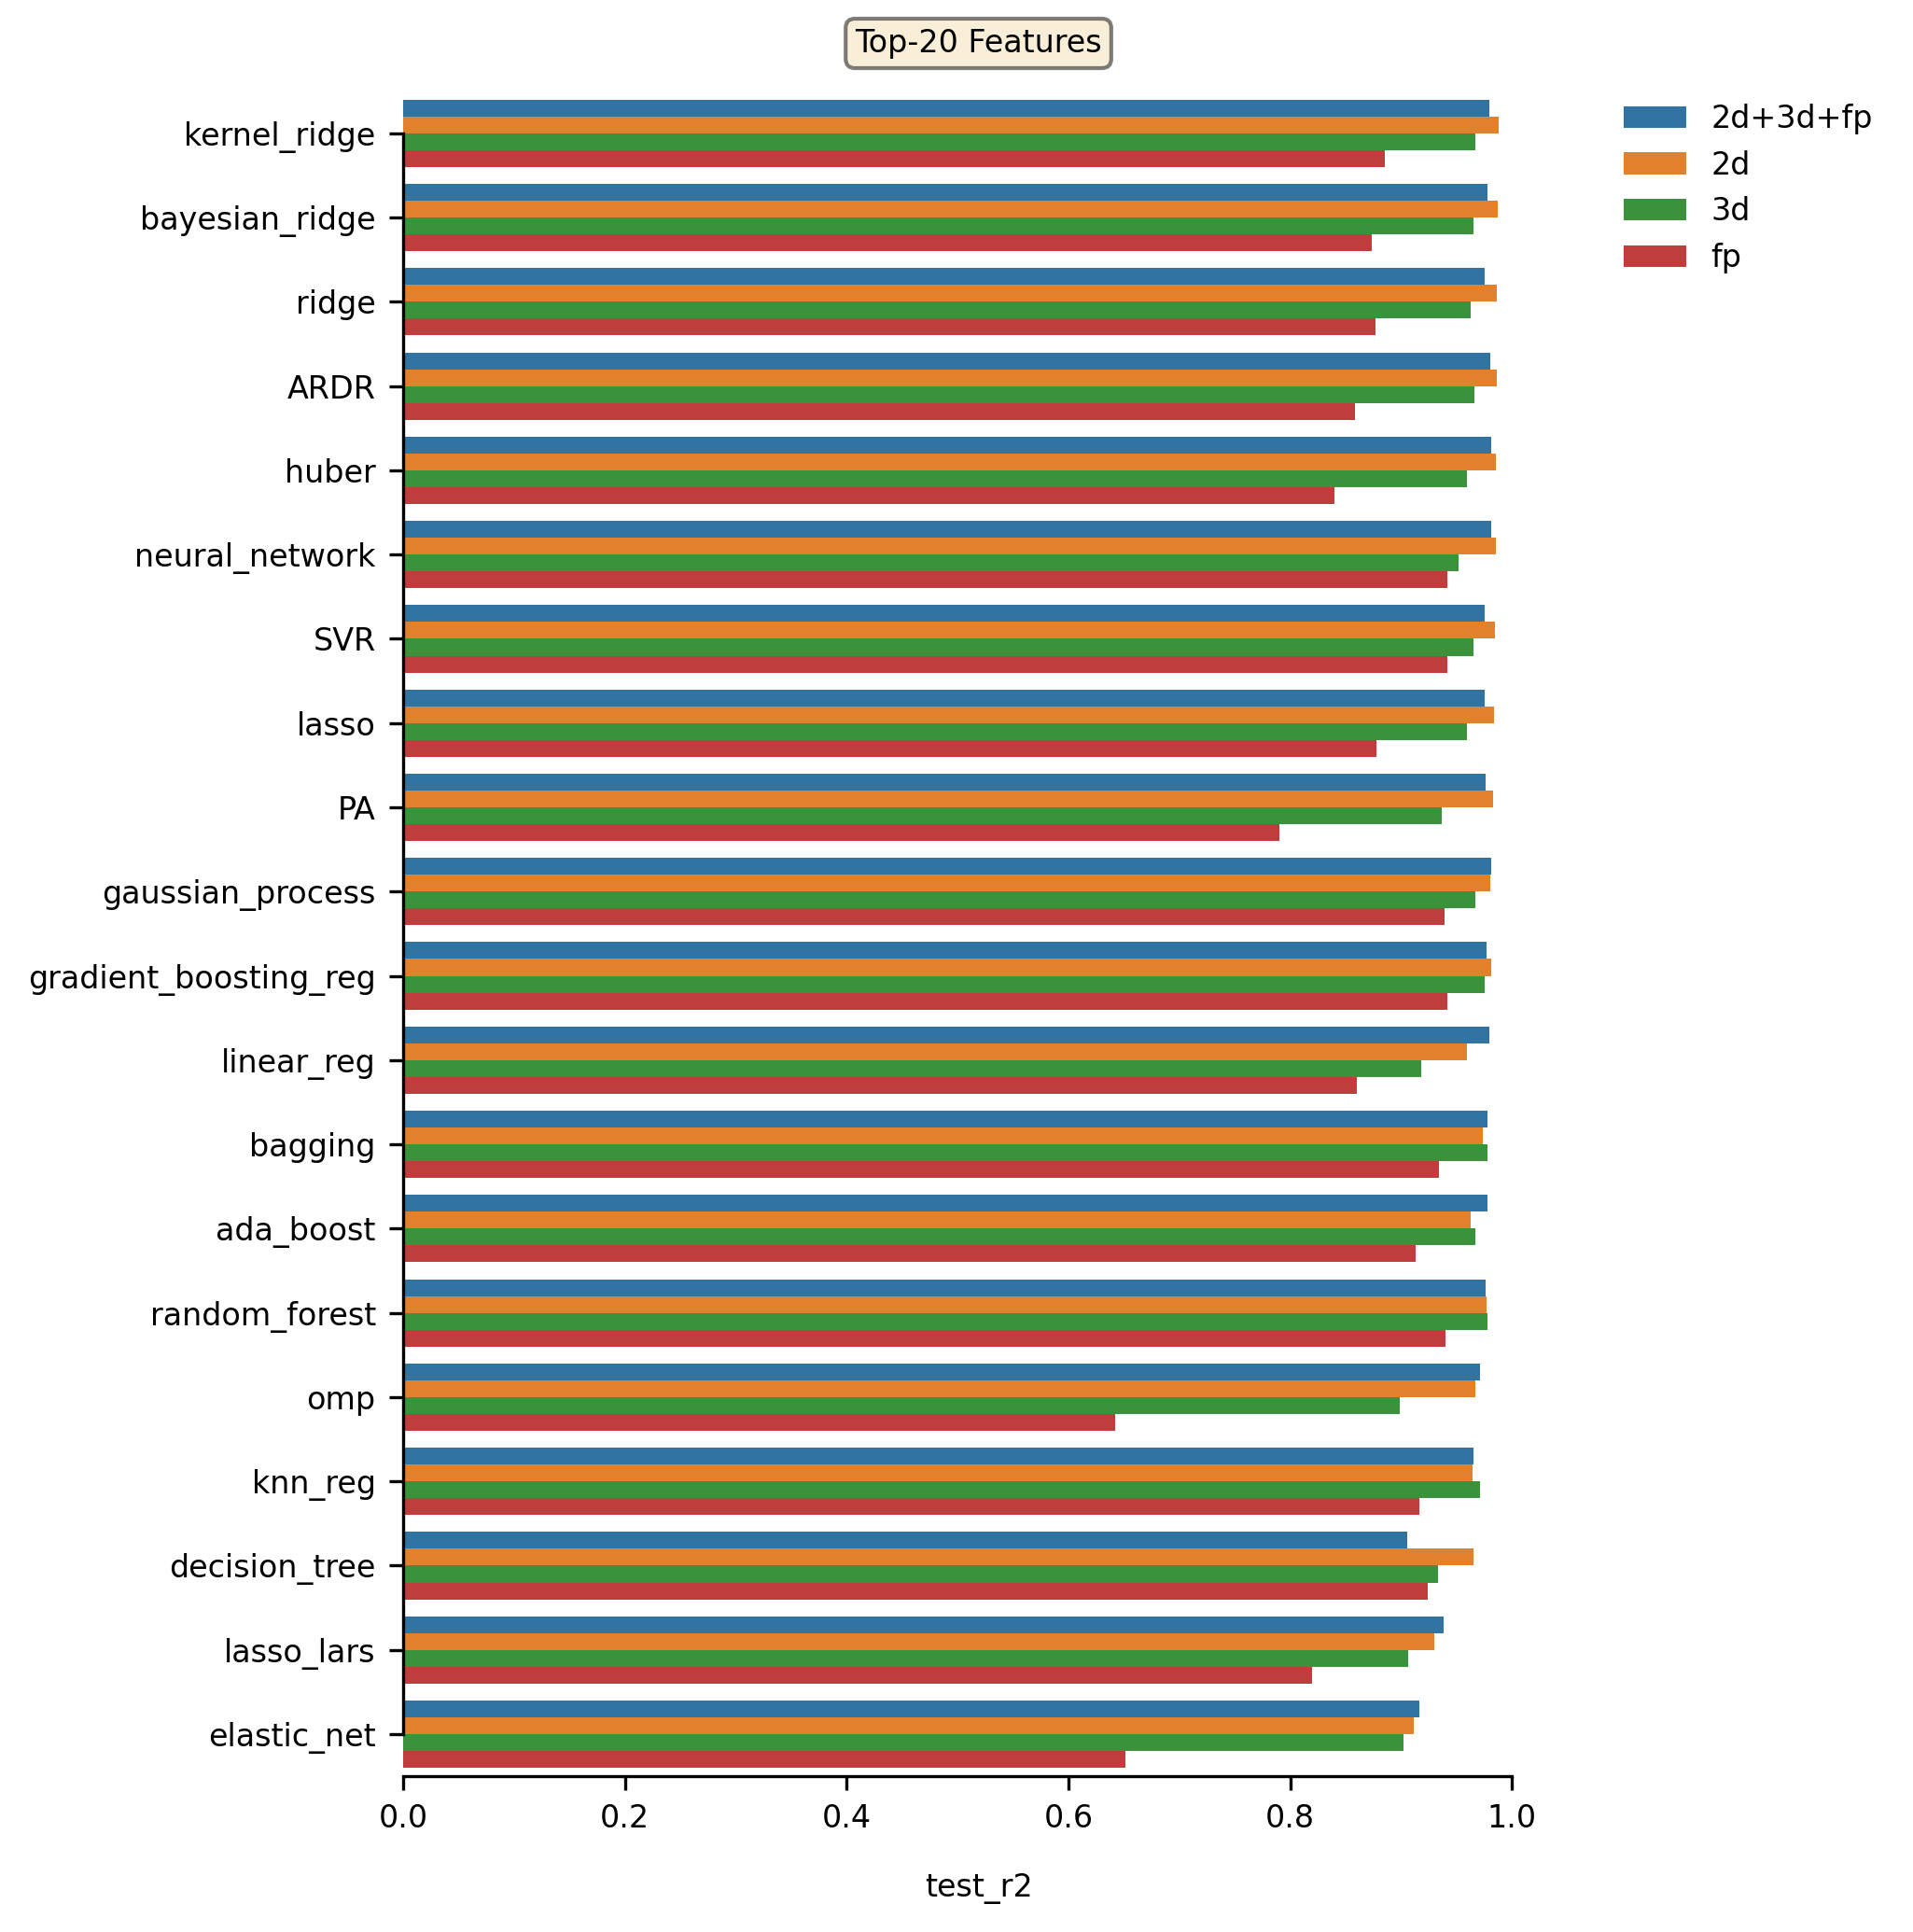

In [370]:
#SI
plt.figure(figsize=(7,7))
df=df.sort_values(by='test_r2',ascending=False)
sns.barplot(x='test_r2',y='model_name',data=df,hue='feat_set',hue_order=hue_order)
plt.title(f'Top-{num_feat} Features',pad=10,bbox=bbox,color='black')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig(f'{OUTDIR}/top_{num_feat}_features_vs_test_r2_{feat_type}.jpg')

In [371]:
df_list=[]
num_feat_list=[5,10,15,20]
feat_type_list=['2d+3d+fp','2d','3d','fp_deepchem']
for feat_type in feat_type_list:
    for num_feat in num_feat_list:
        file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
        df=getDataFromFile(file_name)
        df_list.append(df)
df=pd.concat(df_list)
df.sort_values(by='test_mse')[['feat_set','model_name','test_r2','test_mse','test_mae']].reset_index(drop=True).head(10)

File Found
File Found
File Found
File Found
File Found
File Found
File Found
File Found
File Found
File Found
File Found
File Found
File Found
File Found
File Found
File Found


feat_set             model_name   test_r2  test_mse  test_mae
0  top_20_2d_rdkit           kernel_ridge  0.988211  0.005173  0.056762
1  top_15_2d_rdkit       gaussian_process  0.987028  0.005692  0.055682
2   top_5_2d_rdkit                bagging  0.986912  0.005743  0.058108
3  top_20_2d_rdkit         bayesian_ridge  0.986904  0.005746  0.057805
4  top_15_2d_rdkit          random_forest  0.986828  0.005780  0.056934
5  top_10_2d_rdkit       gaussian_process  0.986695  0.005838  0.058048
6  top_20_2d_rdkit                  ridge  0.986279  0.006021  0.059040
7  top_15_2d_rdkit           kernel_ridge  0.986039  0.006126  0.056874
8  top_20_2d_rdkit                   ARDR  0.986028  0.006131  0.058674
9   top_5_2d_rdkit  gradient_boosting_reg  0.985693  0.006278  0.061260

In [372]:
df_list=[]
num_feat=5
feat_type_list=['2d+3d+fp','2d','3d','fp_deepchem']
for feat_type in feat_type_list:
    file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
    df=getDataFromFile(file_name)
    df_list.append(df)
df=pd.concat(df_list)
df.sort_values(by='test_mse')[['feat_set','model_name','test_r2','test_mse','test_mae']].reset_index(drop=True).head(10)

File Found
File Found
File Found
File Found


feat_set             model_name   test_r2  test_mse  test_mae
0  top_5_2d_rdkit                bagging  0.986912  0.005743  0.058108
1  top_5_2d_rdkit  gradient_boosting_reg  0.985693  0.006278  0.061260
2  top_5_2d_rdkit          random_forest  0.985123  0.006528  0.061257
3  top_5_2d_rdkit       gaussian_process  0.983034  0.007445  0.062840
4  top_5_2d_rdkit         neural_network  0.981675  0.008041  0.064541
5  top_5_2d_rdkit                   ARDR  0.979502  0.008994  0.072414
6  top_5_2d_rdkit             linear_reg  0.979166  0.009142  0.072534
7  top_5_2d_rdkit         bayesian_ridge  0.978744  0.009327  0.072640
8  top_5_2d_rdkit           kernel_ridge  0.978385  0.009485  0.072999
9  top_5_2d_rdkit                  lasso  0.977903  0.009696  0.080427

In [373]:
df_list=[]
num_feat=10
feat_type_list=['2d+3d+fp','2d','3d','fp_deepchem']
for feat_type in feat_type_list:
    file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
    df=getDataFromFile(file_name)
    df_list.append(df)
df=pd.concat(df_list)
df.sort_values(by='test_mse')[['feat_set','model_name','test_r2','test_mse','test_mae']].reset_index(drop=True).head(10)

File Found
File Found
File Found
File Found


feat_set        model_name   test_r2  test_mse  test_mae
0  top_10_2d_rdkit  gaussian_process  0.986695  0.005838  0.058048
1  top_10_2d_rdkit    neural_network  0.984202  0.006932  0.064775
2  top_10_2d_rdkit     random_forest  0.983874  0.007076  0.060696
3  top_10_2d_rdkit              ARDR  0.983685  0.007159  0.065525
4  top_10_2d_rdkit      kernel_ridge  0.983553  0.007217  0.062136
5  top_10_2d_rdkit        linear_reg  0.983485  0.007247  0.064620
6  top_10_2d_rdkit    bayesian_ridge  0.983405  0.007282  0.065520
7  top_10_2d_rdkit             huber  0.982347  0.007746  0.064187
8  top_10_2d_rdkit               SVR  0.981762  0.008003  0.070788
9  top_10_2d_rdkit             ridge  0.981602  0.008073  0.068468

In [374]:
df_list=[]
num_feat=15
feat_type_list=['2d+3d+fp','2d','3d','fp_deepchem']
for feat_type in feat_type_list:
    file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
    df=getDataFromFile(file_name)
    df_list.append(df)
df=pd.concat(df_list)
df.sort_values(by='test_mse')[['feat_set','model_name','test_r2','test_mse','test_mae']].reset_index(drop=True).head(10)

File Found
File Found
File Found
File Found


feat_set        model_name   test_r2  test_mse  test_mae
0        top_15_2d_rdkit  gaussian_process  0.987028  0.005692  0.055682
1        top_15_2d_rdkit     random_forest  0.986828  0.005780  0.056934
2        top_15_2d_rdkit      kernel_ridge  0.986039  0.006126  0.056874
3        top_15_2d_rdkit    bayesian_ridge  0.985295  0.006452  0.059103
4        top_15_2d_rdkit             ridge  0.984372  0.006857  0.060850
5        top_15_2d_rdkit              ARDR  0.983765  0.007124  0.061910
6        top_15_2d_rdkit             huber  0.983225  0.007361  0.061618
7        top_15_2d_rdkit        linear_reg  0.983022  0.007450  0.060525
8        top_15_2d_rdkit               SVR  0.982449  0.007702  0.065574
9  top_15_2d+3d+fp_rdkit        linear_reg  0.982396  0.007725  0.064062

In [375]:
df_list=[]
num_feat=20
feat_type_list=['2d+3d+fp','2d','3d','fp_deepchem']
for feat_type in feat_type_list:
    file_name=f'TOP_{num_feat}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
    df=getDataFromFile(file_name)
    df_list.append(df)
df=pd.concat(df_list)
df.sort_values(by='test_mse')[['feat_set','model_name','test_r2','test_mse','test_mae']].reset_index(drop=True).head(10)

File Found
File Found
File Found
File Found


feat_set        model_name   test_r2  test_mse  test_mae
0        top_20_2d_rdkit      kernel_ridge  0.988211  0.005173  0.056762
1        top_20_2d_rdkit    bayesian_ridge  0.986904  0.005746  0.057805
2        top_20_2d_rdkit             ridge  0.986279  0.006021  0.059040
3        top_20_2d_rdkit              ARDR  0.986028  0.006131  0.058674
4        top_20_2d_rdkit             huber  0.985687  0.006281  0.060951
5        top_20_2d_rdkit    neural_network  0.985615  0.006312  0.055812
6        top_20_2d_rdkit               SVR  0.984795  0.006672  0.062612
7        top_20_2d_rdkit             lasso  0.983987  0.007026  0.062007
8        top_20_2d_rdkit                PA  0.982884  0.007511  0.066704
9  top_20_2d+3d+fp_rdkit  gaussian_process  0.981427  0.008150  0.064396

# Model Error per Class of Compound and Every Comound (top 3 models) - 3 models in 2d+3d+fp, 2d, 3d, fp

In [54]:
df_list=[]
feat_type_list=['2d+3d+fp','2d','3d','fp_deepchem']
for feat_type in feat_type_list:
    file_name=f'MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
    df=getDataFromFile(file_name)
    df_list.append((feat_type,df))
#     print(df.head())

File Found
File Found
File Found
File Found


In [55]:
rank=0
df_train_list=[]
df_test_list=[]
gb_train_list=[]
gb_test_list=[]
for feat_type,df in df_list:
    rank=0
    best_model_row=df.sort_values(by='test_mse').iloc[rank,:]
    best_model=best_model_row['opt_model']
    best_model_name=best_model_row['model_name']
    best_model_feat_set=best_model_row['feat_set']

    df_train=pd.DataFrame()
    df_train['Sr. No.']=data_train['Sr. No.']
    df_train['FG_name']=data_train['FG_name']
    df_train['true_y']=y_train
    df_train['pred_y']=best_model_row['pred_train']
    df_train['abs_error']=np.abs(df_train['true_y']-df_train['pred_y'])
    df_train['%abs_error']=df_train['abs_error']*100/np.abs(df_train['true_y'])
    df_train['feat_set']=best_model_feat_set
    df_train['model_name']=best_model_name
    df_train_list.append(df_train)
    gb_train=df_train.groupby('FG_name').mean()
    gb_train=gb_train.rename(columns=lambda x:'mean_'+x)
    gb_train=gb_train.sort_values(by='mean_%abs_error')
    gb_train=gb_train.reset_index()
    gb_train['feat_set']=f'{feat_type}_{LIBRARY} ({best_model_name})'
    gb_train_list.append(gb_train)
    
    df_test=pd.DataFrame()
    df_test['Sr. No.']=data_test['Sr. No.']
    df_test['FG_name']=data_test['FG_name']
    df_test['true_y']=y_test
    df_test['pred_y']=best_model_row['pred_test']
    df_test['abs_error']=np.abs(df_test['true_y']-df_test['pred_y'])
    df_test['%abs_error']=df_test['abs_error']*100/np.abs(df_test['true_y'])
    df_test['feat_set']=best_model_feat_set
    df_test['model_name']=best_model_name
    df_test_list.append(df_test)
    gb_test=df_test.groupby('FG_name').mean()
    gb_test=gb_test.rename(columns=lambda x:'mean_'+x)
    gb_test=gb_test.sort_values(by='mean_%abs_error')
    gb_test=gb_test.reset_index()
    gb_test_list.append(gb_test)
    gb_test['feat_set']=f'{feat_type}_{LIBRARY} ({best_model_name})'

gb_train=pd.concat(gb_train_list)
gb_test=pd.concat(gb_test_list)
gb_train

FG_name  mean_true_y  mean_pred_y  mean_abs_error  mean_%abs_error  \
0      C6H5    -1.730000    -1.729556        0.000444         0.025690   
1     2CH3N    -1.850000    -1.850646        0.000646         0.034897   
2      OCH3    -1.805000    -1.804183        0.000817         0.045538   
3   P(CH3)2    -1.750000    -1.751054        0.001054         0.060208   
4        Cl    -1.630000    -1.631124        0.001124         0.068956   
..      ...          ...          ...             ...              ...   
15      CH3    -1.790000    -1.717044        0.072956         4.075729   
16    CONH2    -1.520000    -1.585378        0.065378         4.301170   
17  S(CH3)2    -1.755000    -1.644760        0.110240         6.276180   
18      NO2    -0.676471    -0.695127        0.073056        11.504806   
19       CN    -0.657273    -0.667919        0.044452        30.126963   

                             feat_set  
0               2d+3d+fp_rdkit (ARDR)  
1               2d+3d+fp_rdkit (ARDR)  
2               2d+3d+fp_rdkit (ARDR)  
3               2d+3d+fp_rdkit (ARDR)  
4               2d+3d+fp_rdkit (ARDR)  
..                                ...  
15  fp_deepchem_rdkit (random_forest)  
16  fp_deepchem_rdkit (random_forest)  
17  fp_deepchem_rdkit (random_forest)  
18  fp_deepchem_rdkit (random_forest)  
19  fp_deepchem_rdkit (random_forest)  

[80 rows x 6 columns]

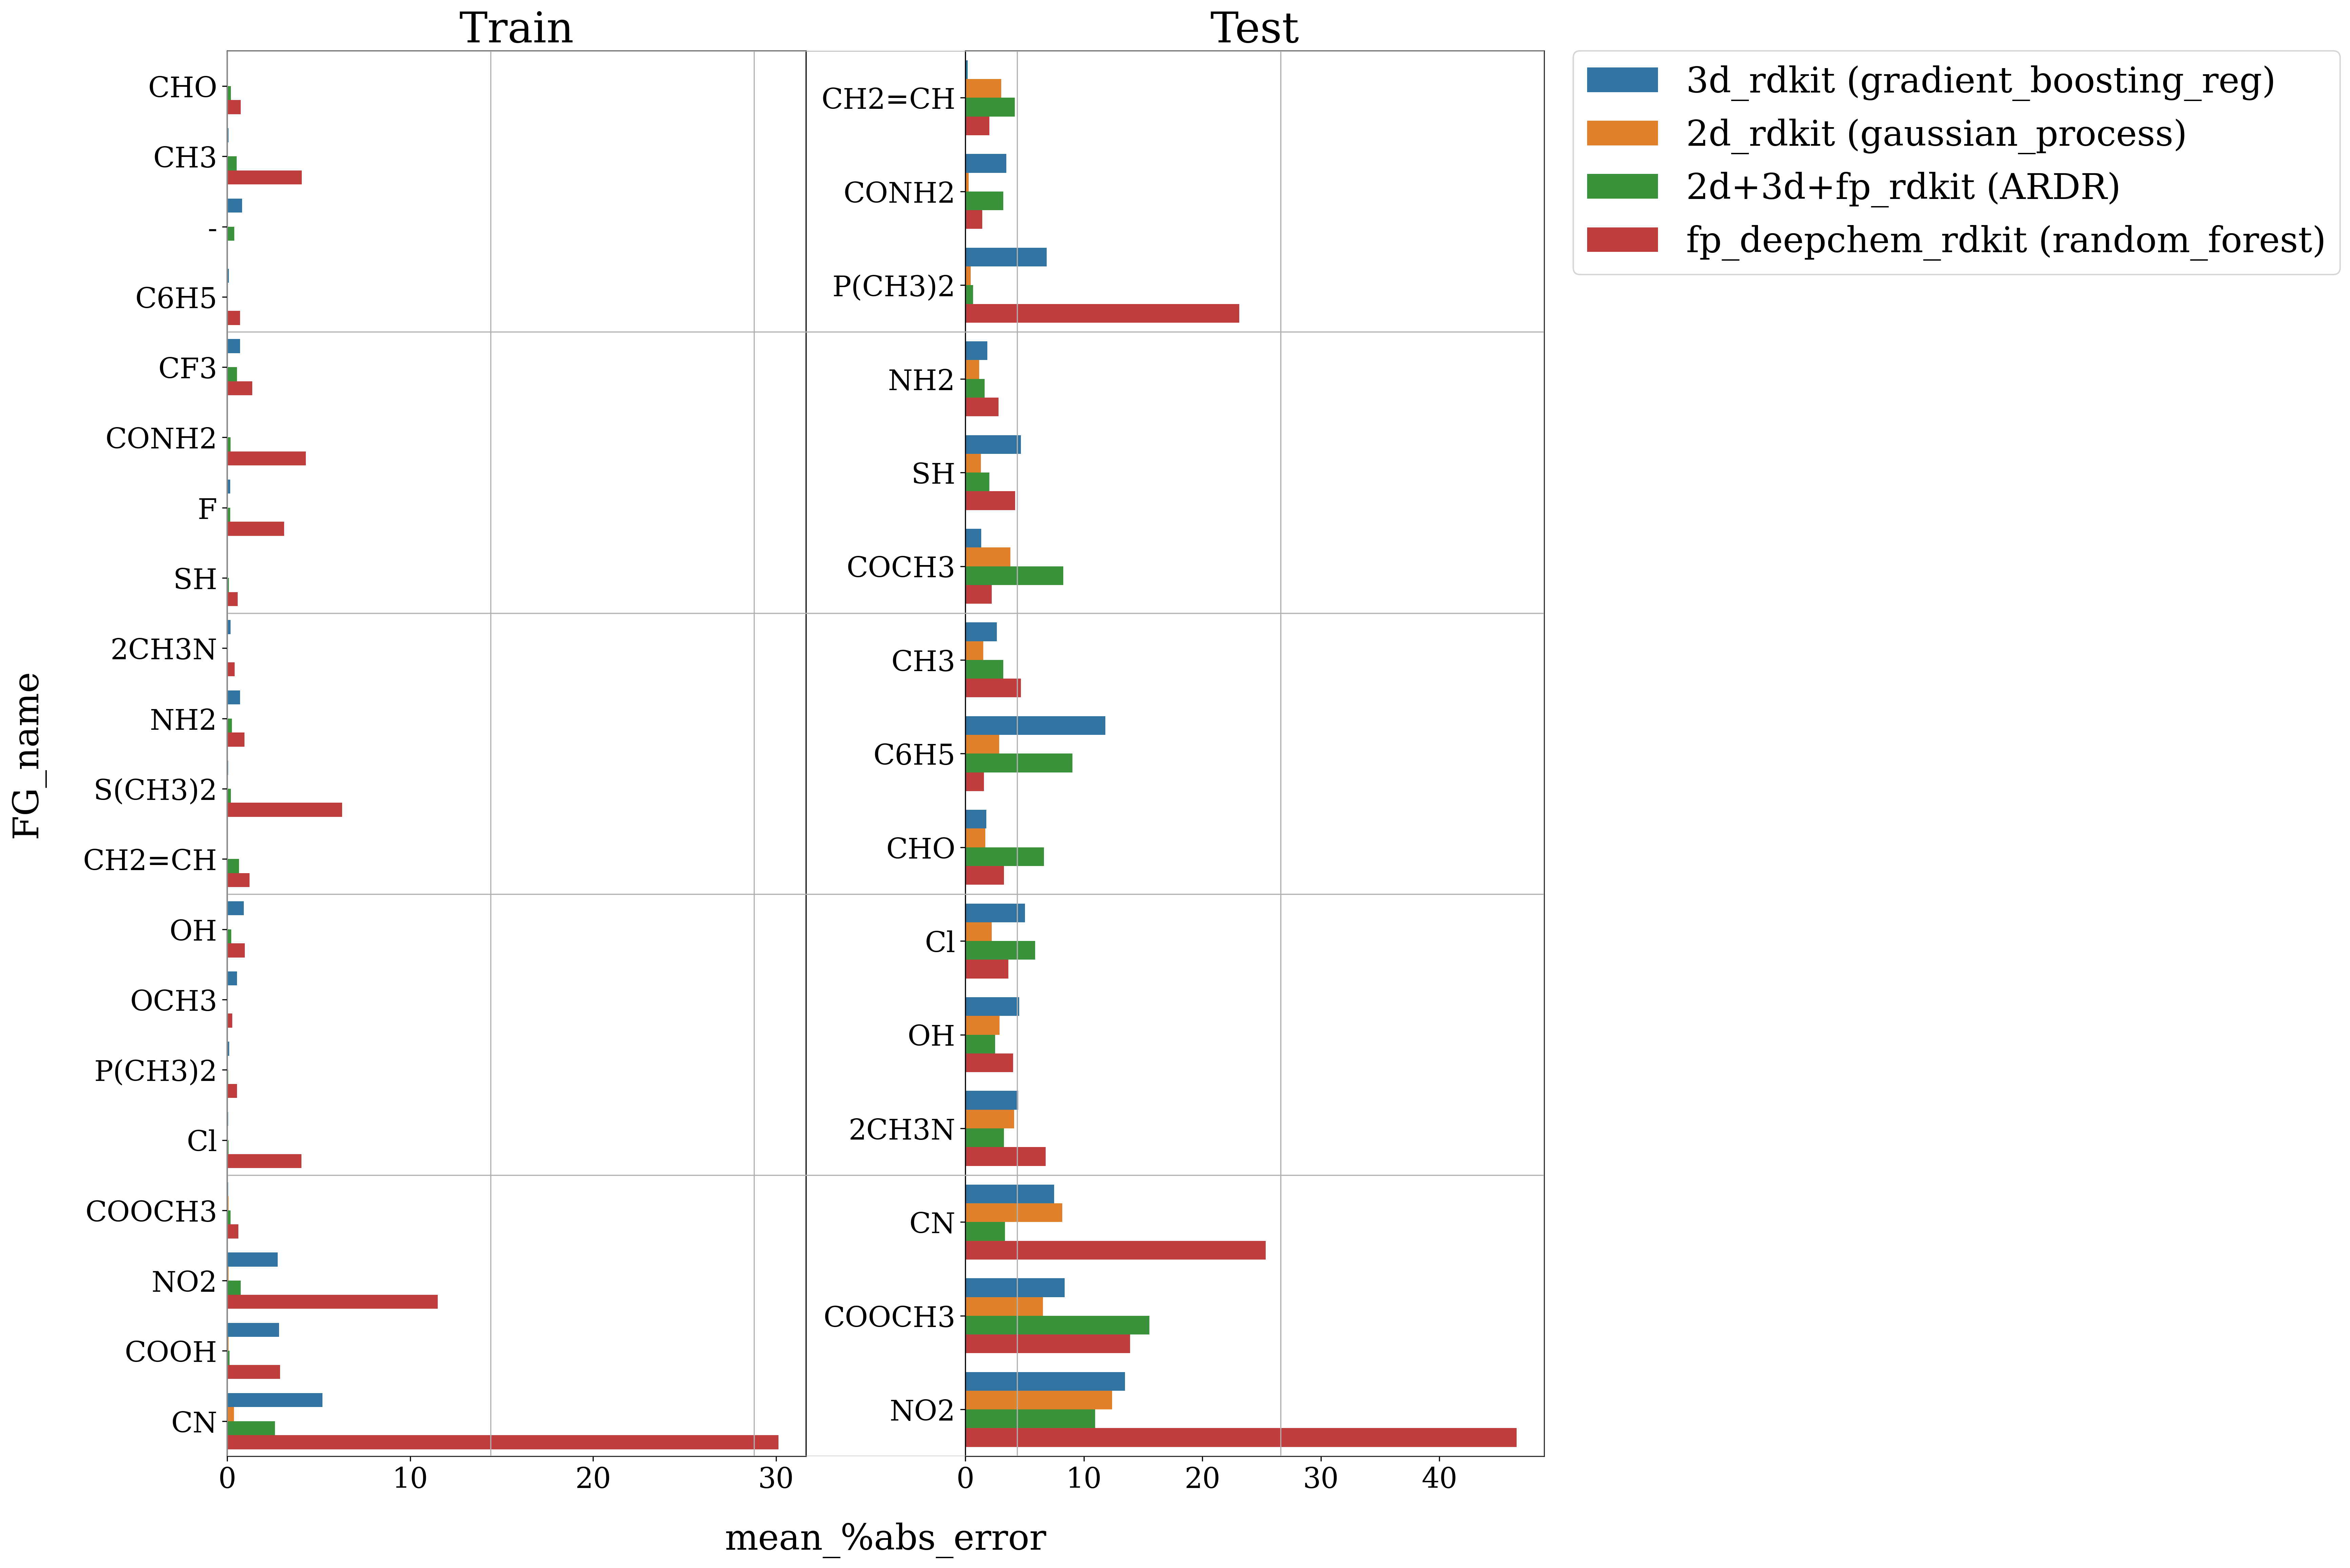

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(25, 16))
gb_train=gb_train.sort_values(by='mean_%abs_error')
gb_test=gb_test.sort_values(by='mean_%abs_error')
sns.barplot(ax=axes[0],x='mean_%abs_error',y='FG_name',data=gb_train,hue='feat_set').get_legend().remove()
sns.barplot(ax=axes[1],x='mean_%abs_error',y='FG_name',data=gb_test,hue='feat_set')
axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.xlim(0,10)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("mean_%abs_error",labelpad=20)
plt.ylabel("FG_name",labelpad=90)
plt.grid()
plt.tight_layout()

### ** Functional Groups having high error might have data points from close to zero

Text(0, 0.5, 'FG_name')

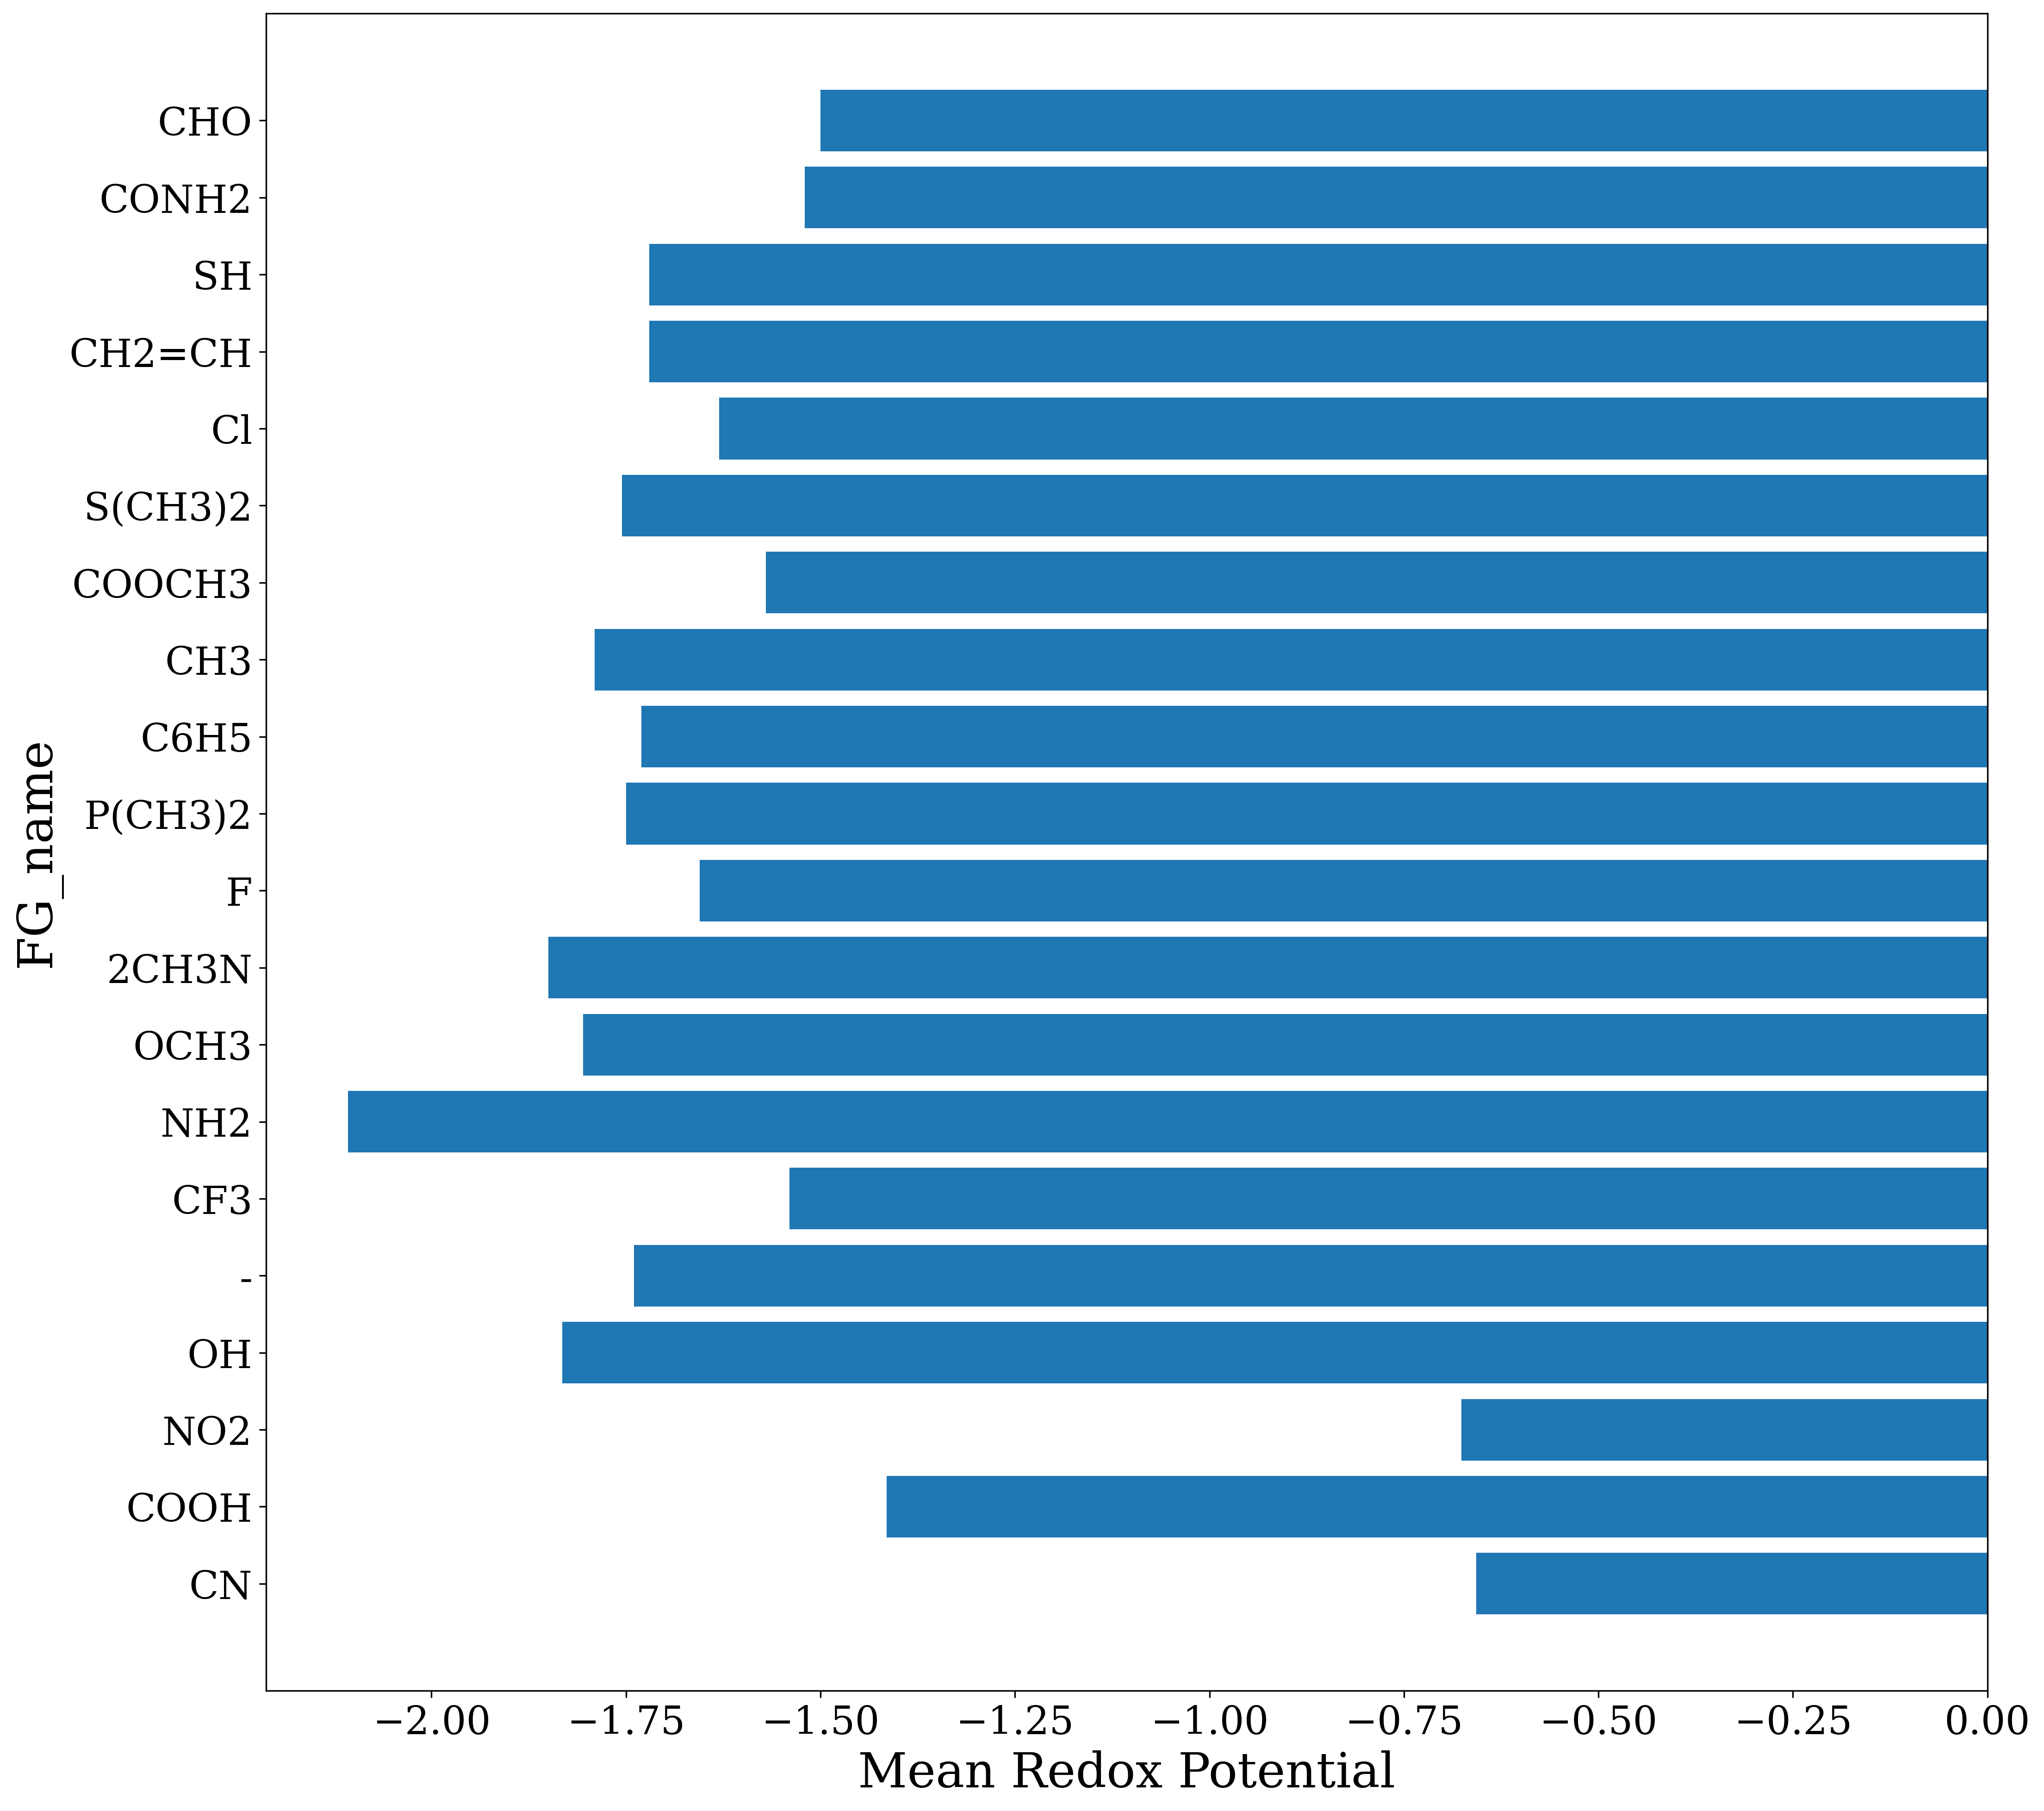

In [77]:
plt.figure(figsize=(16,16))
df=gb_train_list[1]
df=df.sort_values('mean_%abs_error',ascending=False)
# fig, ax = plt.subplots()
plt.barh(df['FG_name'], df['mean_true_y'])
plt.xlabel('Mean Redox Potential')
plt.ylabel('FG_name')

<BarContainer object of 56 artists>

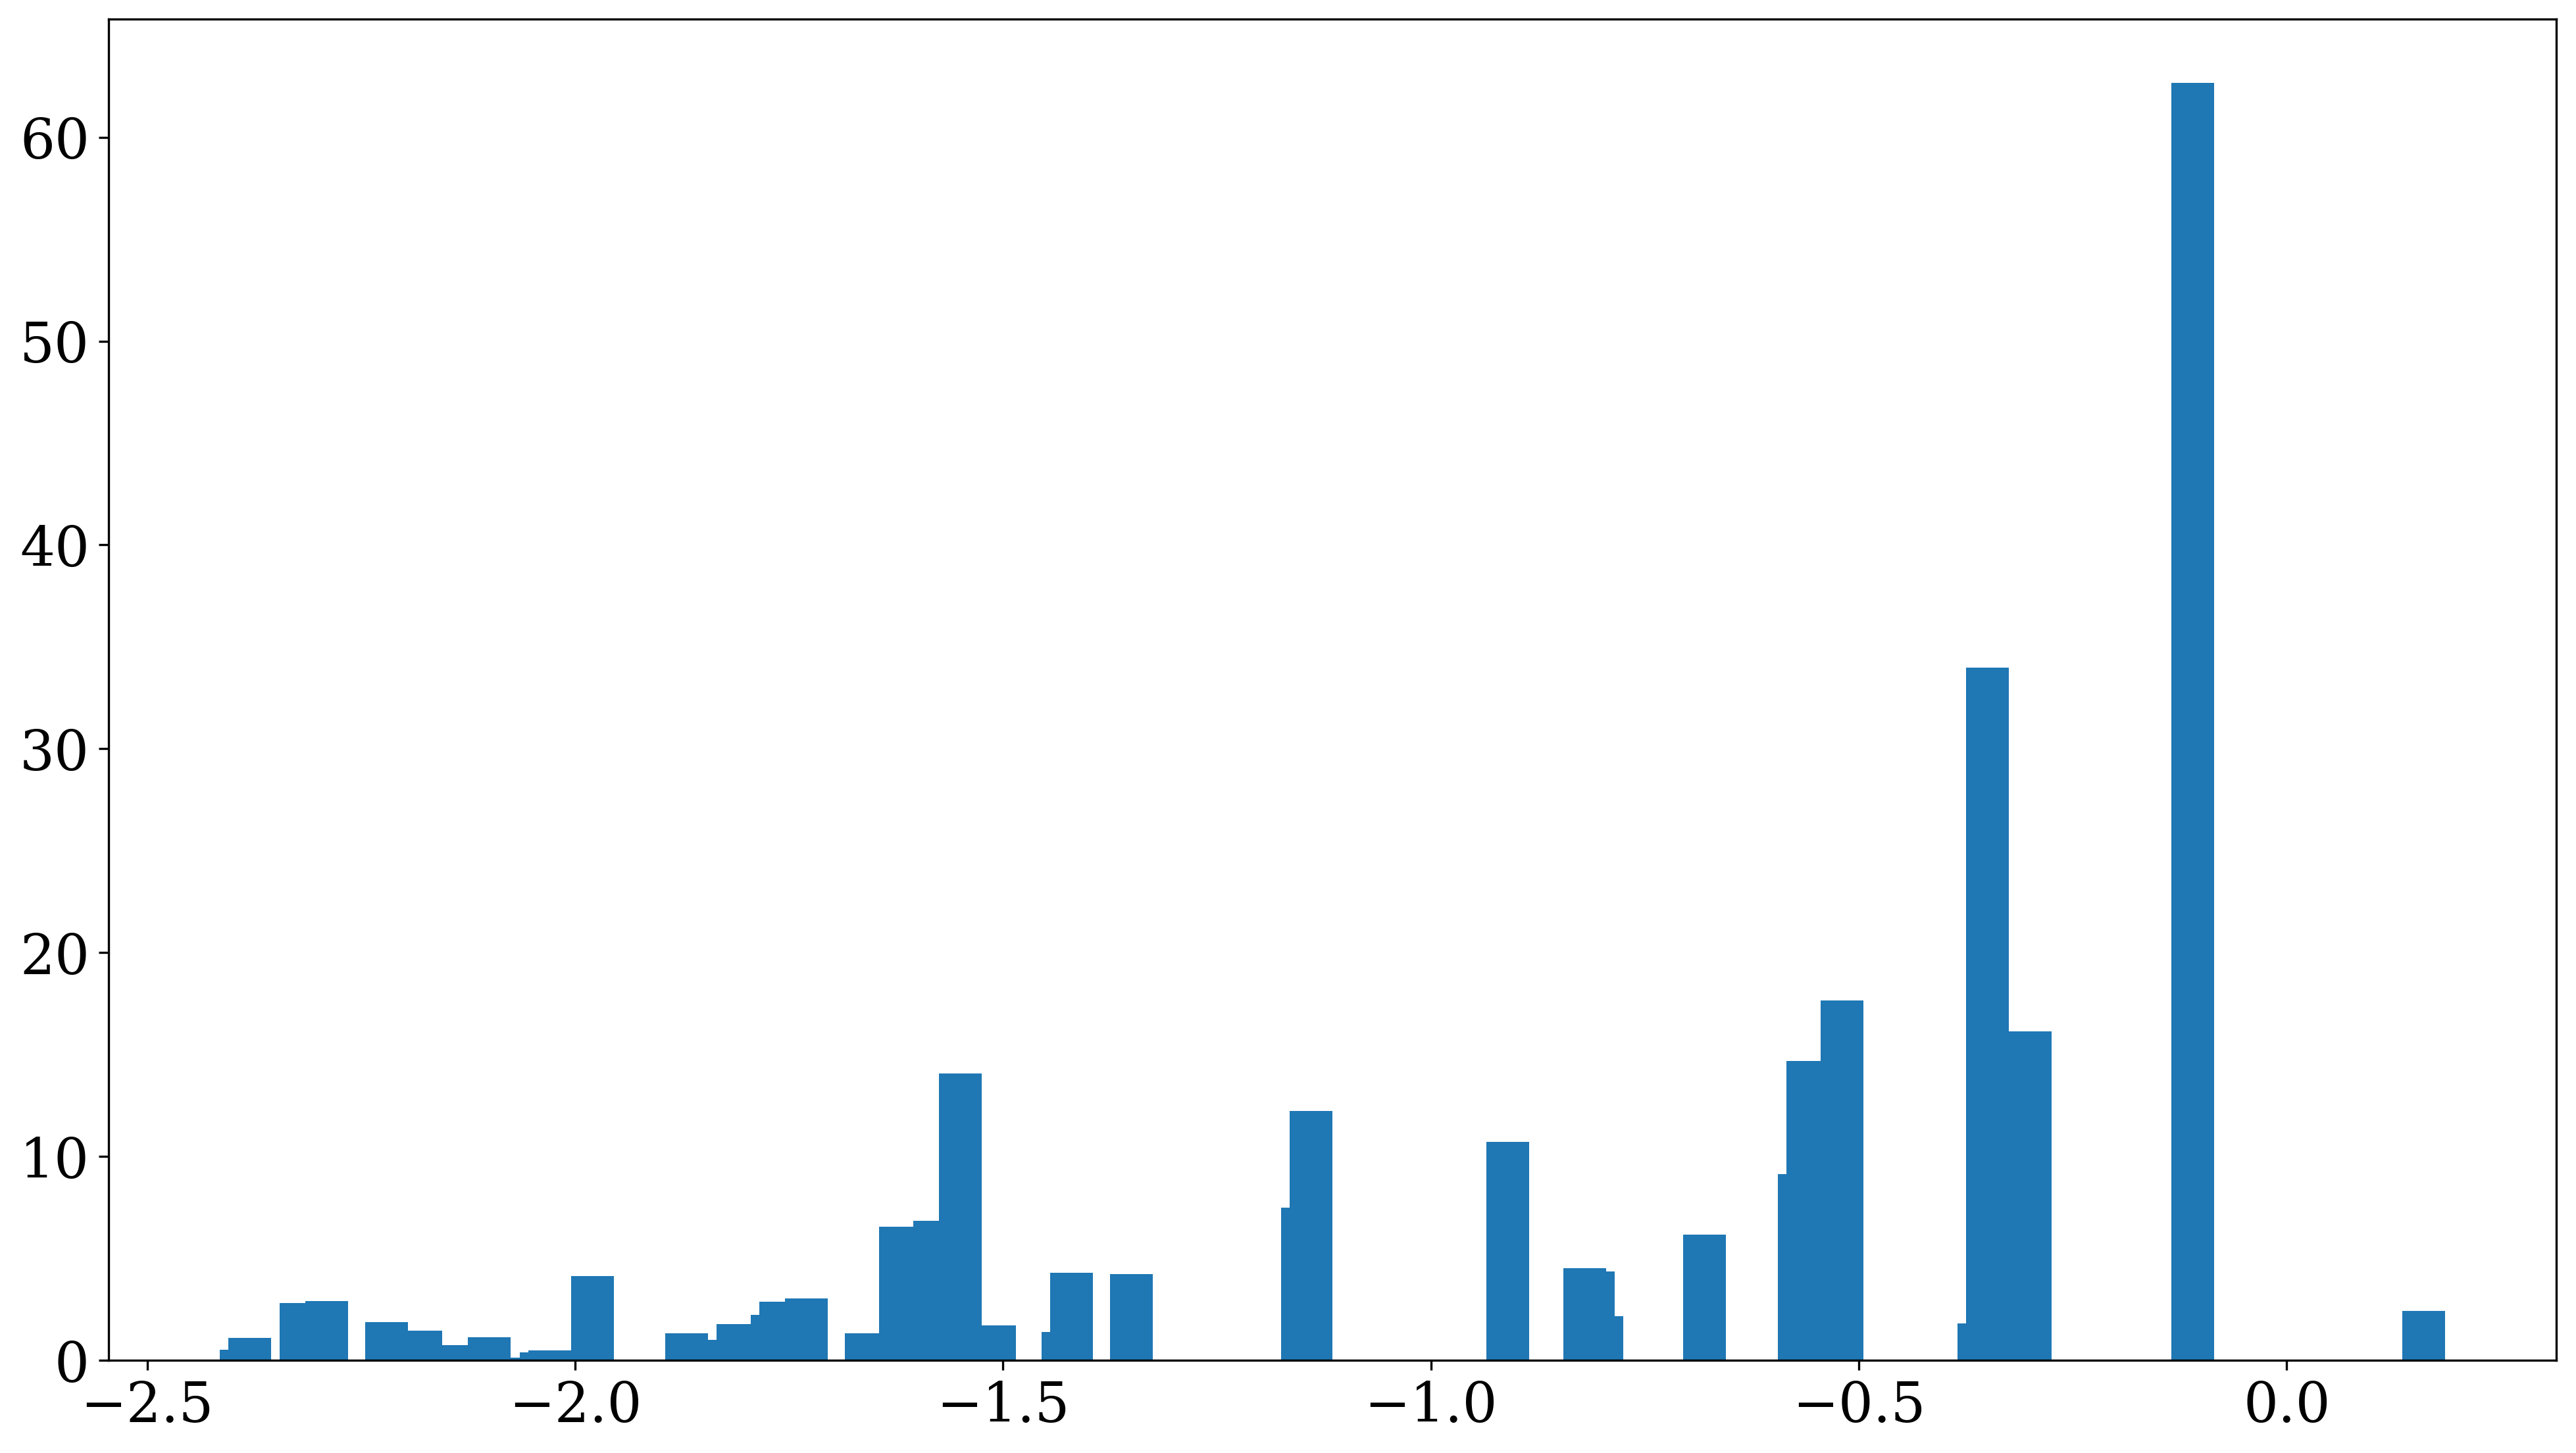

In [58]:
df=df_test_list[1]
df.sort_values('%abs_error',ascending=False)
fig, ax = plt.subplots()
ax.bar(df['true_y'], df['%abs_error'],width=0.05)

<BarContainer object of 129 artists>

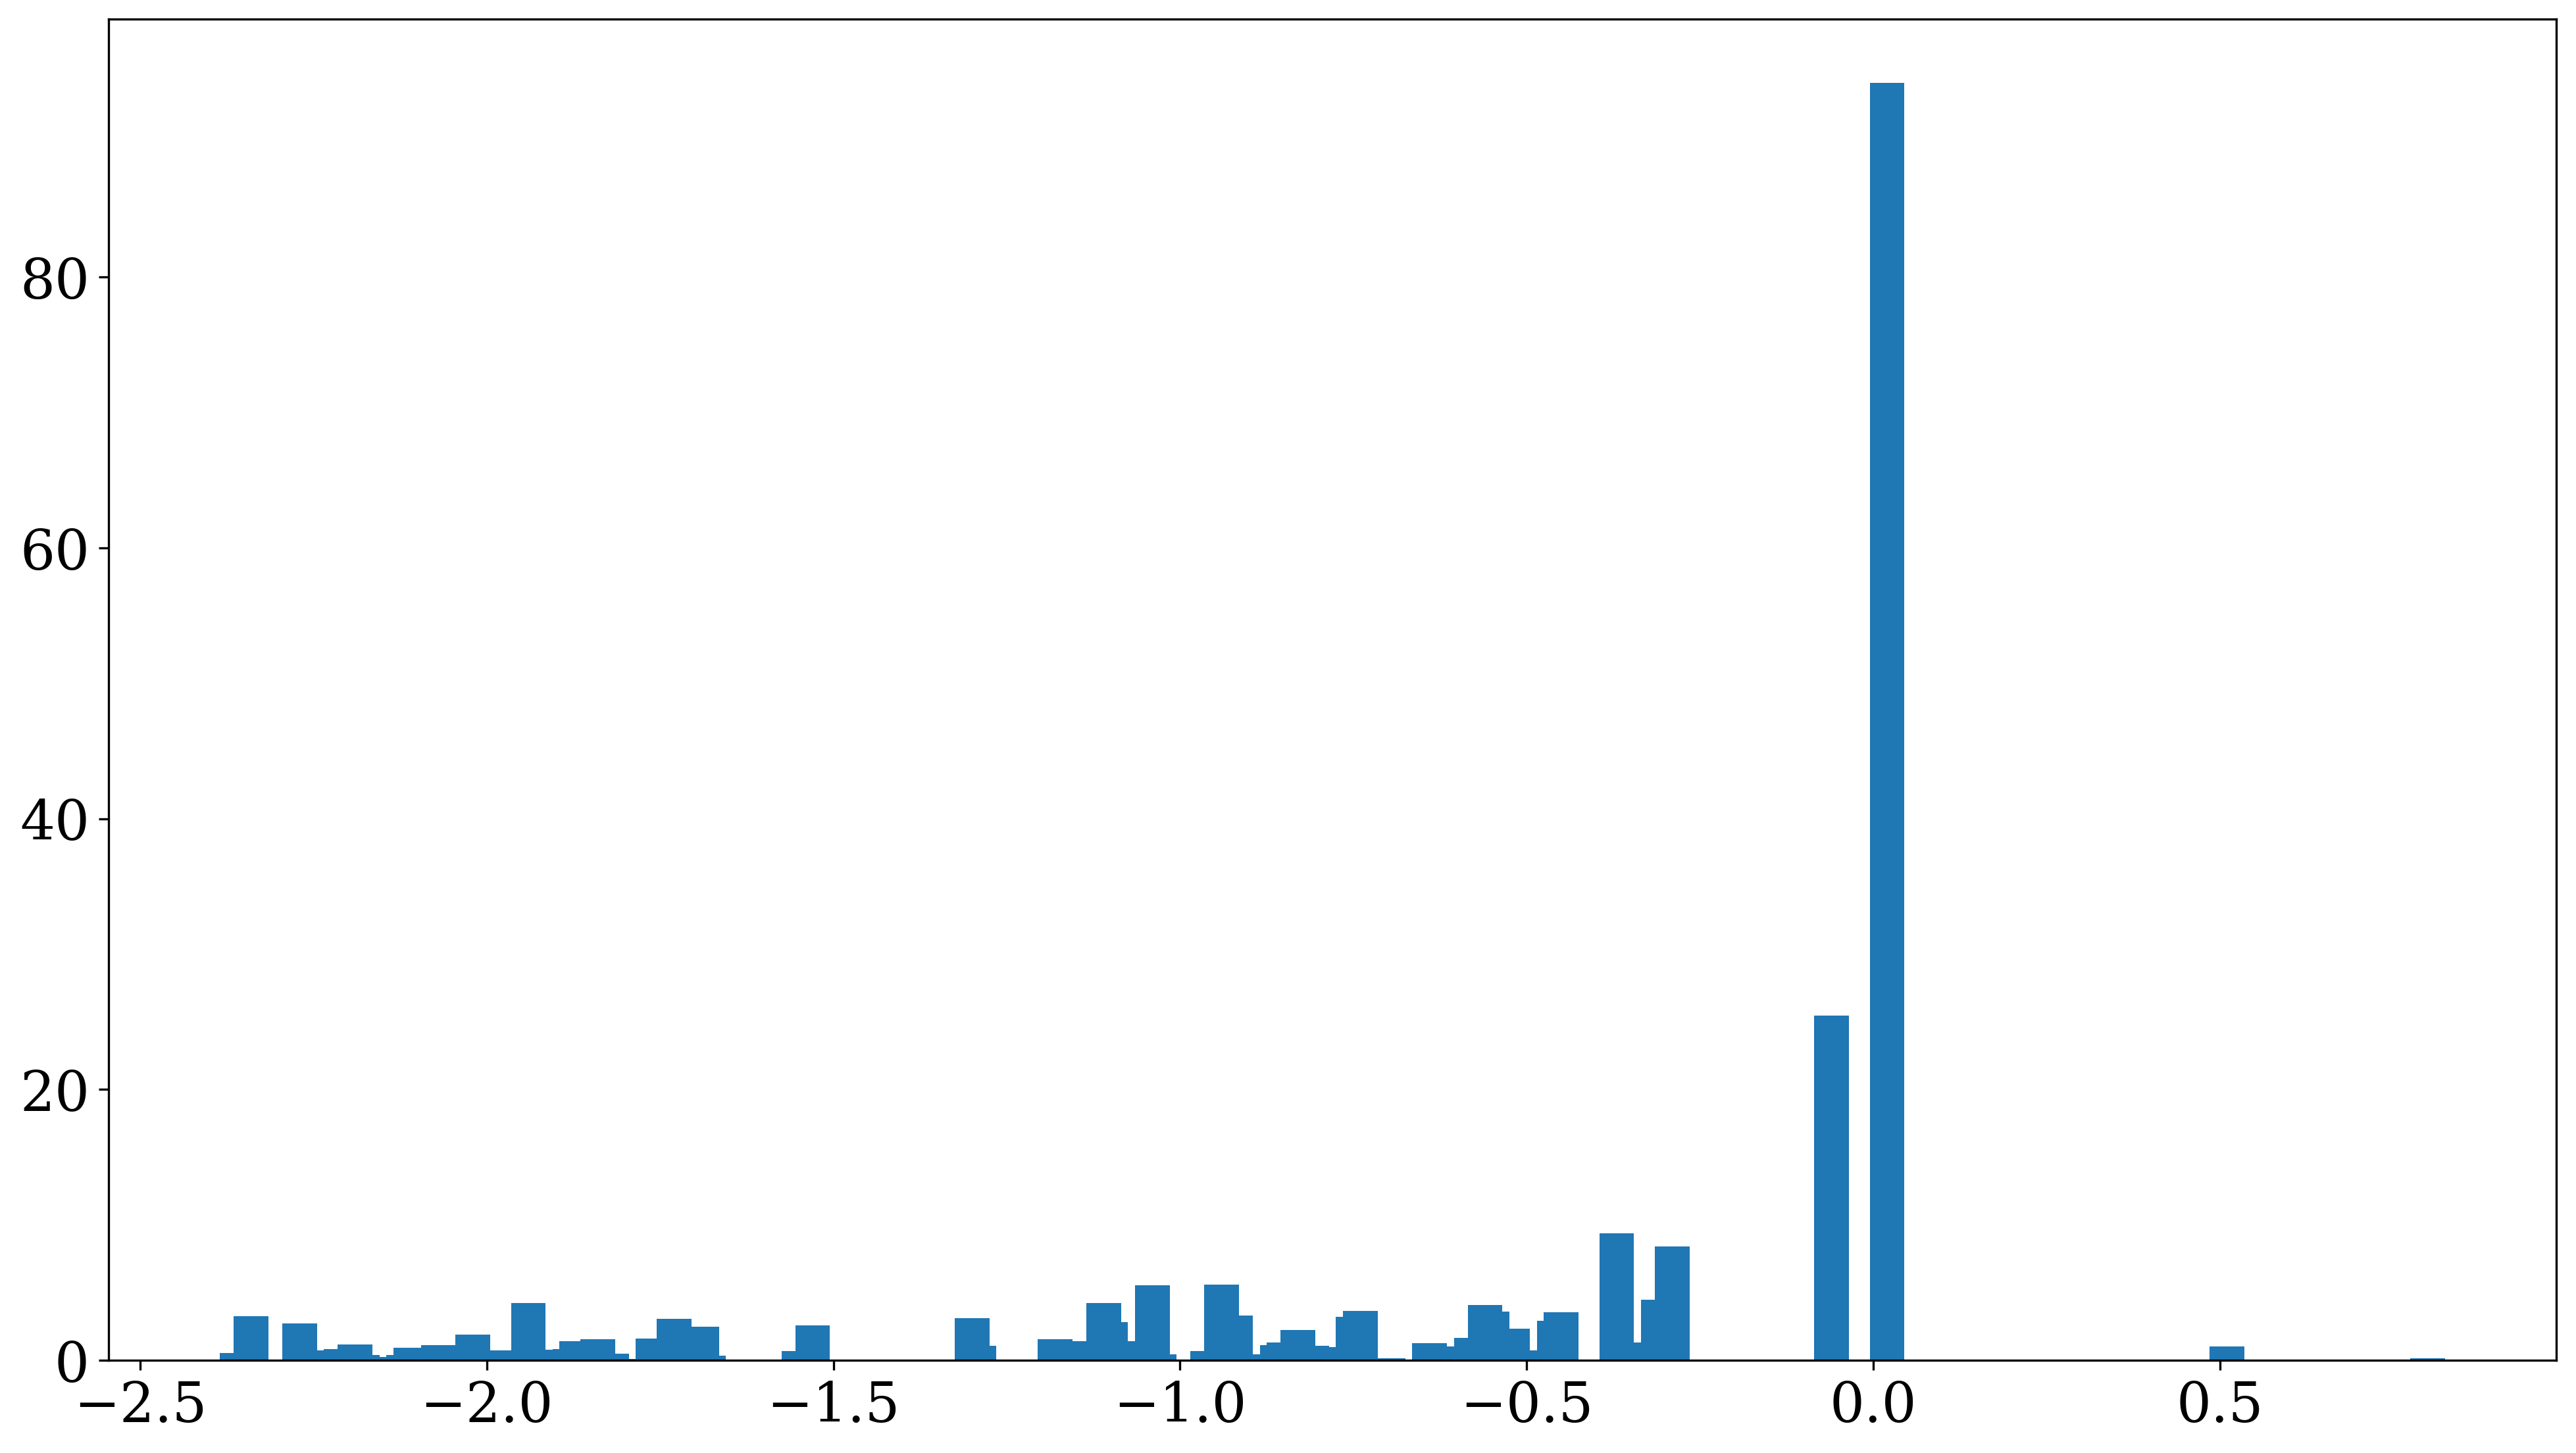

In [60]:
df=df_train_list[1]
df.sort_values('%abs_error',ascending=False)
fig, ax = plt.subplots()
ax.bar(df['true_y'], df['%abs_error'],width=0.05)

In [732]:
df=data_train
df[df['Redox Potential']>-0.5]

Sr. No. FG_name      FG Position  Redox Potential   mol_filename_neutral  \
69       71      CN          1 2 4 6            -0.48       CN_R1246_neutral   
70       72      CN          1 2 4 7            -0.45       CN_R1247_neutral   
179     184     NO2          1 2 4 9            -0.34      NO2_R1249_neutral   
83       86      CN      1 2 3 4 6 9             0.02     CN_R123469_neutral   
85       88      CN      1 2 3 7 8 9            -0.06     CN_R123789_neutral   
86       89      CN      2 3 6 7 8 9            -0.06     CN_R236789_neutral   
87       90      CN  1 2 3 4 6 7 8 9             0.51   CN_R12346789_neutral   
64       66      CN          1 2 3 4            -0.37       CN_R1234_neutral   
71       73      CN          1 2 4 8            -0.46       CN_R1248_neutral   
72       74      CN          1 2 4 9            -0.47       CN_R1249_neutral   
175     180     NO2          1 2 3 4            -0.31      NO2_R1234_neutral   
177     182     NO2          1 2 4 7            -0.29      NO2_R1247_neutral   
184     189     NO2  1 2 3 4 6 7 8 9             0.80  NO2_R12346789_neutral   

                                            rdkit_mol  FG_no_2d_basic  \
69   <rdkit.Chem.rdchem.Mol object at 0x7fc760062e68>               7   
70   <rdkit.Chem.rdchem.Mol object at 0x7fc76006e298>               7   
179  <rdkit.Chem.rdchem.Mol object at 0x7fc76006e340>              15   
83   <rdkit.Chem.rdchem.Mol object at 0x7fc76006e6f8>               7   
85   <rdkit.Chem.rdchem.Mol object at 0x7fc76033a148>               7   
86   <rdkit.Chem.rdchem.Mol object at 0x7fc76031a3b0>               7   
87   <rdkit.Chem.rdchem.Mol object at 0x7fc7604e4ae8>               7   
64   <rdkit.Chem.rdchem.Mol object at 0x7fc7603b3f80>               7   
71   <rdkit.Chem.rdchem.Mol object at 0x7fc760495420>               7   
72   <rdkit.Chem.rdchem.Mol object at 0x7fc76006e9d0>               7   
175  <rdkit.Chem.rdchem.Mol object at 0x7fc76006ec70>              15   
177  <rdkit.Chem.rdchem.Mol object at 0x7fc76006eca8>              15   
184  <rdkit.Chem.rdchem.Mol object at 0x7fc76003a308>              15   

     FG_position_1_2d_basic  FG_position_2_2d_basic  FG_position_3_2d_basic  \
69                      1.0                     1.0                     0.0   
70                      1.0                     1.0                     0.0   
179                     1.0                     1.0                     0.0   
83                      1.0                     1.0                     1.0   
85                      1.0                     1.0                     1.0   
86                      0.0                     1.0                     1.0   
87                      1.0                     1.0                     1.0   
64                      1.0                     1.0                     1.0   
71                      1.0                     1.0                     0.0   
72                      1.0                     1.0                     0.0   
175                     1.0                     1.0                     1.0   
177                     1.0                     1.0                     0.0   
184                     1.0                     1.0                     1.0   

     ...  rdkit_fp_2035  rdkit_fp_2036  rdkit_fp_2037  rdkit_fp_2038  \
69   ...              0              0              1              0   
70   ...              0              0              1              0   
179  ...              1              0              1              1   
83   ...              0              0              1              0   
85   ...              0              0              1              0   
86   ...              0              0              1              0   
87   ...              0              0              1              0   
64   ...              0              0              1              0   
71   ...              0              0              1              0   
72   ...              0          

In [514]:
set(gb_test['FG_name'])-set(gb_train['FG_name'])

{'COCH3'}

In [651]:
data_train[data_train['Redox Potential']>=0]

Sr. No. FG_name      FG Position  Redox Potential   mol_filename_neutral  \
83       86      CN      1 2 3 4 6 9             0.02     CN_R123469_neutral   
87       90      CN  1 2 3 4 6 7 8 9             0.51   CN_R12346789_neutral   
184     189     NO2  1 2 3 4 6 7 8 9             0.80  NO2_R12346789_neutral   

                                            rdkit_mol  FG_no_2d_basic  \
83   <rdkit.Chem.rdchem.Mol object at 0x7fc76006e6f8>               7   
87   <rdkit.Chem.rdchem.Mol object at 0x7fc7604e4ae8>               7   
184  <rdkit.Chem.rdchem.Mol object at 0x7fc76003a308>              15   

     FG_position_1_2d_basic  FG_position_2_2d_basic  FG_position_3_2d_basic  \
83                      1.0                     1.0                     1.0   
87                      1.0                     1.0                     1.0   
184                     1.0                     1.0                     1.0   

     ...  rdkit_fp_2035  rdkit_fp_2036  rdkit_fp_2037  rdkit_fp_2038  \
83   ...              0              0              1              0   
87   ...              0              0              1              0   
184  ...              1              0              1              1   

     rdkit_fp_2039  rdkit_fp_2042  rdkit_fp_2043  rdkit_fp_2044  \
83               0              0              0              0   
87               0              0              0              0   
184              0              1              0              1   

     rdkit_fp_2046  rdkit_fp_2047  
83               1              0  
87               1              0  
184              0              0  

[3 rows x 4725 columns]

In [652]:
data_test[data_test['Redox Potential']>=0]

Sr. No. FG_name  FG Position  Redox Potential mol_filename_neutral  \
183     188     NO2  1 2 3 4 6 9             0.16  NO2_R123469_neutral   

                                            rdkit_mol  FG_no_2d_basic  \
183  <rdkit.Chem.rdchem.Mol object at 0x7fc7d45d78f0>              15   

     FG_position_1_2d_basic  FG_position_2_2d_basic  FG_position_3_2d_basic  \
183                     1.0                     1.0                     1.0   

     ...  rdkit_fp_2035  rdkit_fp_2036  rdkit_fp_2037  rdkit_fp_2038  \
183  ...              1              0              1              1   

     rdkit_fp_2039  rdkit_fp_2042  rdkit_fp_2043  rdkit_fp_2044  \
183              0              1              0              1   

     rdkit_fp_2046  rdkit_fp_2047  
183              0              0  

[1 rows x 4725 columns]

In [515]:
df=pd.concat([data_train,data_test])
print(df['FG_name'].nunique())
df['FG_name'].value_counts().to_frame()

21


FG_name
NH2           50
CN            49
OH            28
NO2           25
2CH3N          2
COOCH3         2
Cl             2
OCH3           2
COOH           2
CF3            2
P(CH3)2        2
S(CH3)2        2
CH3            2
C6H5           2
COCH3          2
F              2
CONH2          2
CH2=CH         2
CHO            2
SH             2
-              1

In [516]:
fg_count_train=data_train['FG_name'].value_counts().to_frame().\
reset_index().rename(columns={'index':'FG_name','FG_name':'train_count'})
fg_count_train

FG_name  train_count
0       NH2           38
1        CN           33
2        OH           20
3       NO2           17
4   S(CH3)2            2
5      OCH3            2
6         F            2
7      COOH            2
8       CF3            2
9        Cl            1
10        -            1
11     C6H5            1
12  P(CH3)2            1
13    2CH3N            1
14      CHO            1
15    CONH2            1
16   COOCH3            1
17      CH3            1
18   CH2=CH            1
19       SH            1

In [517]:
fg_count_test=data_test['FG_name'].value_counts().to_frame().\
reset_index().rename(columns={'index':'FG_name','FG_name':'test_count'})
fg_count_test

FG_name  test_count
0        CN          16
1       NH2          12
2       NO2           8
3        OH           8
4     COCH3           2
5    CH2=CH           1
6       CH3           1
7     2CH3N           1
8    COOCH3           1
9       CHO           1
10    CONH2           1
11     C6H5           1
12  P(CH3)2           1
13       Cl           1
14       SH           1

In [518]:
df=pd.DataFrame()
df['FG_name']=pd.concat([data_train,data_test])['FG_name']
df=df['FG_name'].value_counts().to_frame().\
reset_index().rename(columns={'index':'FG_name','FG_name':'total_count'})
df=df.merge(fg_count_train,how='left',on='FG_name')
df=df.merge(fg_count_test,how='left',on='FG_name')
df=df.fillna(0)
df

FG_name  total_count  train_count  test_count
0       NH2           50         38.0        12.0
1        CN           49         33.0        16.0
2        OH           28         20.0         8.0
3       NO2           25         17.0         8.0
4     2CH3N            2          1.0         1.0
5    COOCH3            2          1.0         1.0
6        Cl            2          1.0         1.0
7      OCH3            2          2.0         0.0
8      COOH            2          2.0         0.0
9       CF3            2          2.0         0.0
10  P(CH3)2            2          1.0         1.0
11  S(CH3)2            2          2.0         0.0
12      CH3            2          1.0         1.0
13     C6H5            2          1.0         1.0
14    COCH3            2          0.0         2.0
15        F            2          2.0         0.0
16    CONH2            2          1.0         1.0
17   CH2=CH            2          1.0         1.0
18      CHO            2          1.0         1.0
19       SH            2          1.0         1.0
20        -            1          1.0         0.0

In [519]:
fg_count_train=data_train['FG_name'].value_counts().to_frame().\
reset_index().rename(columns={'index':'FG_name','FG_name':'count'})
fg_count_train['label']='train'
fg_count_test=data_test['FG_name'].value_counts().to_frame().\
reset_index().rename(columns={'index':'FG_name','FG_name':'count'})
fg_count=pd.concat([fg_count_train,fg_count_test])
fg_count_test['label']='test'
fg_count=pd.concat([fg_count_train,fg_count_test])
fg_count

FG_name  count  label
0       NH2     38  train
1        CN     33  train
2        OH     20  train
3       NO2     17  train
4   S(CH3)2      2  train
5      OCH3      2  train
6         F      2  train
7      COOH      2  train
8       CF3      2  train
9        Cl      1  train
10        -      1  train
11     C6H5      1  train
12  P(CH3)2      1  train
13    2CH3N      1  train
14      CHO      1  train
15    CONH2      1  train
16   COOCH3      1  train
17      CH3      1  train
18   CH2=CH      1  train
19       SH      1  train
0        CN     16   test
1       NH2     12   test
2       NO2      8   test
3        OH      8   test
4     COCH3      2   test
5    CH2=CH      1   test
6       CH3      1   test
7     2CH3N      1   test
8    COOCH3      1   test
9       CHO      1   test
10    CONH2      1   test
11     C6H5      1   test
12  P(CH3)2      1   test
13       Cl      1   test
14       SH      1   test

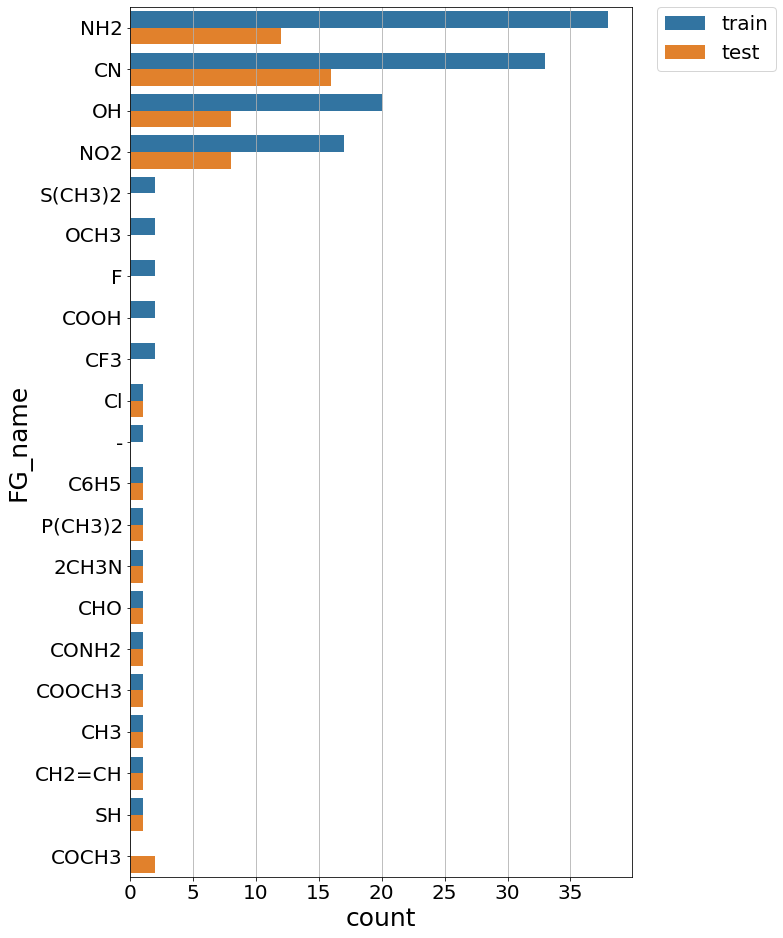

In [520]:
plt.figure(figsize=(9,16))
sns.barplot(x='count',y='FG_name',data=fg_count,hue='label')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [521]:
# # BEST_MODEL_ERROR_PER_COMPOUND_TRAIN_rdkit.pkl
# train_dist=data_train['FG_name'].value_counts()
# test_dist=data_test['FG_name'].value_counts()

# fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,9))

# ax1.barh(test_dist.index,test_dist,label='Test Data')
# ax2.barh(train_dist.index,train_dist,label='Training Data')

# ax1.tick_params(axis='x', rotation=90)
# ax2.tick_params(axis='x', rotation=90)
# ax1.legend()
# ax1.set_ylabel('Count')
# ax2.legend()
# ax2.set_ylabel('Count')
# fig.text(0.5, 0, 'Functional Groups', ha='center', rotation='horizontal')
# plt.tight_layout()

In [ ]:
# MAYBE TIME

# Has model learned the observe trends in the data? -- cannot be done due to standardization

# predict on CF3 data from original paper

In [718]:
size=100
df=data_train[data_train['FG_name']=='-']
pd.concat([df]*size,ignore_index=True)

Sr. No. FG_name FG Position  Redox Potential mol_filename_neutral  \
0  Phenazine       -           -            -1.74    PHENAZINE_neutral   
1  Phenazine       -           -            -1.74    PHENAZINE_neutral   
2  Phenazine       -           -            -1.74    PHENAZINE_neutral   
3  Phenazine       -           -            -1.74    PHENAZINE_neutral   
4  Phenazine       -           -            -1.74    PHENAZINE_neutral   
5  Phenazine       -           -            -1.74    PHENAZINE_neutral   
6  Phenazine       -           -            -1.74    PHENAZINE_neutral   
7  Phenazine       -           -            -1.74    PHENAZINE_neutral   
8  Phenazine       -           -            -1.74    PHENAZINE_neutral   
9  Phenazine       -           -            -1.74    PHENAZINE_neutral   

                                          rdkit_mol  FG_no_2d_basic  \
0  <rdkit.Chem.rdchem.Mol object at 0x7fc76006e148>               0   
1  <rdkit.Chem.rdchem.Mol object at 0x7fc76006e148>               0   
2  <rdkit.Chem.rdchem.Mol object at 0x7fc76006e148>               0   
3  <rdkit.Chem.rdchem.Mol object at 0x7fc76006e148>               0   
4  <rdkit.Chem.rdchem.Mol object at 0x7fc76006e148>               0   
5  <rdkit.Chem.rdchem.Mol object at 0x7fc76006e148>               0   
6  <rdkit.Chem.rdchem.Mol object at 0x7fc76006e148>               0   
7  <rdkit.Chem.rdchem.Mol object at 0x7fc76006e148>               0   
8  <rdkit.Chem.rdchem.Mol object at 0x7fc76006e148>               0   
9  <rdkit.Chem.rdchem.Mol object at 0x7fc76006e148>               0   

   FG_position_1_2d_basic  FG_position_2_2d_basic  FG_position_3_2d_basic  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   
5                     0.0                     0.0                     0.0   
6                     0.0                     0.0                     0.0   
7                     0.0                     0.0                     0.0   
8                     0.0                     0.0                     0.0   
9                     0.0                     0.0                     0.0   

   ...  rdkit_fp_2035  rdkit_fp_2036  rdkit_fp_2037  rdkit_fp_2038  \
0  ...              0              0              0              0   
1  ...              0              0              0              0   
2  ...              0              0              0              0   
3  ...              0              0              0              0   
4  ...              0              0              0              0   
5  ...              0              0              0              0   
6  ...              0              0              0              0   
7  ...              0              0              0              0   
8  ...              0              0              0              0   
9  ...              0              0              0              0   

   rdkit_fp_2039  rdkit_fp_2042  rdkit_fp_2043  rdkit_fp_2044  rdkit_fp_2046  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   
5              0              0              0              0              0   
6              0              0              0              0              0   
7              0              0              0              0              0   
8              0              0              0              0        

In [725]:
data_train

Sr. No. FG_name      FG Position  Redox Potential   mol_filename_neutral  \
25       26     CHO                1            -1.50         CHO_R1_neutral   
159     164      OH          2 3 7 8            -1.99       OH_R2378_neutral   
21       21       F                1            -1.63           F_R1_neutral   
163     168     NO2              1 3            -0.96        NO2_R13_neutral   
149     154      OH          1 2 3 6            -1.76       OH_R1236_neutral   
..      ...     ...              ...              ...                    ...   
150     155      OH          1 2 3 7            -1.87       OH_R1237_neutral   
56       58      CN            1 3 6            -0.85        CN_R136_neutral   
184     189     NO2  1 2 3 4 6 7 8 9             0.80  NO2_R12346789_neutral   
92       95     NH2              1 7            -2.02        NH2_R17_neutral   
126     130     NH2          1 3 6 9            -2.34      NH2_R1369_neutral   

                                            rdkit_mol  FG_no_2d_basic  \
25   <rdkit.Chem.rdchem.Mol object at 0x7fc760062bc8>               6   
159  <rdkit.Chem.rdchem.Mol object at 0x7fc760062c70>              17   
21   <rdkit.Chem.rdchem.Mol object at 0x7fc760062ca8>              13   
163  <rdkit.Chem.rdchem.Mol object at 0x7fc760062ce0>              15   
149  <rdkit.Chem.rdchem.Mol object at 0x7fc760062d18>              17   
..                                                ...             ...   
150  <rdkit.Chem.rdchem.Mol object at 0x7fc76003a298>              17   
56   <rdkit.Chem.rdchem.Mol object at 0x7fc76003a2d0>               7   
184  <rdkit.Chem.rdchem.Mol object at 0x7fc76003a308>              15   
92   <rdkit.Chem.rdchem.Mol object at 0x7fc76003a340>              14   
126  <rdkit.Chem.rdchem.Mol object at 0x7fc76003a378>              14   

     FG_position_1_2d_basic  FG_position_2_2d_basic  FG_position_3_2d_basic  \
25                      1.0                     0.0                     0.0   
159                     0.0                     1.0                     1.0   
21                      1.0                     0.0                     0.0   
163                     1.0                     0.0                     1.0   
149                     1.0                     1.0                     1.0   
..                      ...                     ...                     ...   
150                     1.0                     1.0                     1.0   
56                      1.0                     0.0                     1.0   
184                     1.0                     1.0                     1.0   
92                      1.0                     0.0                     0.0   
126                     1.0                     0.0                     1.0   

     ...  rdkit_fp_2035  rdkit_fp_2036  rdkit_fp_2037  rdkit_fp_2038  \
25   ...              0              0              0              0   
159  ...              0              0              0              0   
21   ...              0              0              0              0   
163  ...              0              0              1              0   
149  ...              0              0              0              0   
..   ...            ...            ...            ...            ...   
150  ...              0              0              0              0   
56   ...              0              0              1              0   
184  ...              1              0              1              1   
92   ...              0              0              1              0   
126  ...              0              0              1              0   

     rdkit_fp_2039  rdkit_fp_2042  rdkit_fp_2043  rdkit_fp_2044  \
25               0              0              0              0   
159              0              0              0              0   
21               0              1              0              0   
163              0              1              0              1   
149              